<a href="https://colab.research.google.com/github/nicolezk/pet-adoption-prediction/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Configuration

In [ ]:
# Mount Google Drive to obtain the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
path_to_dir = '/content/drive/MyDrive/ML - Project/data/'

In [ ]:
# Read data
pets_df = pd.read_csv('/content/drive/MyDrive/ML - Project/data/pets.csv')

## Univariate Analysis
Overview of this task:

We want to know our data, check statistics about each column individually and understand their distributions.

In [ ]:
# Let's take a quick peek on our dataset 
pets_df.head(3)

Type         Name  Age  Breed1  Breed1Type            Breed1Name  Breed2  \
0     2       Nibble    3     299           2                 Tabby       0   
1     2  No Name Yet    1     265           2  Domestic Medium Hair       0   
2     1       Brisco    1     307           1           Mixed Breed       0   

   Breed2Type Breed2Name  Gender  ...  Quantity  Fee  State     StateName  \
0         NaN        NaN       1  ...         1  100  41326      Selangor   
1         NaN        NaN       1  ...         1    0  41401  Kuala Lumpur   
2         NaN        NaN       1  ...         1    0  41326      Selangor   

                          RescuerID VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379        0   
1  3082c7125d8fb66f7dd4bff4192c8b14        0   
2  fa90fa5b1ee11c86938398b60abc32cb        0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  

[3 rows x 32 columns]

In [ ]:
# Let's review all columns' types and the number of non-null values
pets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed1Type     14993 non-null  int64  
 5   Breed1Name     14993 non-null  object 
 6   Breed2         14993 non-null  int64  
 7   Breed2Type     4231 non-null   float64
 8   Breed2Name     4231 non-null   object 
 9   Gender         14993 non-null  int64  
 10  Color1         14993 non-null  int64  
 11  Color1Name     14993 non-null  object 
 12  Color2         14993 non-null  int64  
 13  Color2Name     10522 non-null  object 
 14  Color3         14993 non-null  int64  
 15  Color3Name     4389 non-null   object 
 16  MaturitySize   14993 non-null  int64  
 17  FurLength      14993 non-null  int64  
 18  Vaccin

In [ ]:
# Let's see some statistics about each column
pets_df.describe(include="all")

Type   Name           Age        Breed1    Breed1Type  \
count   14993.000000  13736  14993.000000  14993.000000  14993.000000   
unique           NaN   9060           NaN           NaN           NaN   
top              NaN   Baby           NaN           NaN           NaN   
freq             NaN     66           NaN           NaN           NaN   
mean        1.457614    NaN     10.452078    265.272594      1.456813   
std         0.498217    NaN     18.155790     60.056818      0.498148   
min         1.000000    NaN      0.000000      0.000000      1.000000   
25%         1.000000    NaN      2.000000    265.000000      1.000000   
50%         1.000000    NaN      3.000000    266.000000      1.000000   
75%         2.000000    NaN     12.000000    307.000000      2.000000   
max         2.000000    NaN    255.000000    307.000000      2.000000   

         Breed1Name        Breed2   Breed2Type   Breed2Name        Gender  \
count         14993  14993.000000  4231.000000         4231  14993.000000   
unique          175           NaN          NaN          134           NaN   
top     Mixed Breed           NaN          NaN  Mixed Breed           NaN   
freq           5929           NaN          NaN         1727           NaN   
mean            NaN     74.009738     1.407232          NaN      1.776162   
std             NaN    123.011575     0.491377          NaN      0.681592   
min             NaN      0.000000     1.000000          NaN      1.000000   
25%             NaN      0.000000     1.000000          NaN      1.000000   
50%             NaN      0.000000     1.000000          NaN      2.000000   
75%             NaN    179.000000     2.000000          NaN      2.000000   
max             NaN    307.000000     2.000000          NaN      3.000000   

        ...      Quantity           Fee         State StateName  \
count   ...  14993.000000  14993.000000  14993.000000     14993   
unique  ...           NaN           NaN           NaN        14   
top     ...           NaN           NaN           NaN  Selangor   
freq    ...           NaN           NaN           NaN      8714   
mean    ...      1.576069     21.259988  41346.028347       NaN   
std     ...      1.472477     78.414548     32.444153       NaN   
min     ...      1.000000      0.000000  41324.000000       NaN   
25%     ...      1.000000      0.000000  41326.000000       NaN   
50%     ...      1.000000      0.000000  41326.000000       NaN   
75%     ...      1.000000      0.000000  41401.000000       NaN   
max     ...     20.000000   3000.000000  41415.000000       NaN   

                               RescuerID      VideoAmt   Description  \
count                              14993  14993.000000         14981   
unique                              5595           NaN         14032   
top     fa90fa5b1ee11c86938398b60abc32cb           NaN  For Adoption   
freq                                 459           NaN           164   
mean                                 NaN      0.056760           NaN   
std                                  NaN      0.346185           NaN   
min                                  NaN      0.000000           NaN   
25%                                  NaN      0.000000           NaN   
50%                                  NaN      0.000000           NaN   
75%                                  NaN      0.000000           NaN   
max                                  NaN      8.000000           NaN   

            PetID      PhotoAmt  AdoptionSpeed  
count       14993  14993.000000   14993.000000  
unique      14993           NaN            NaN  
top     86e1089a3           NaN            NaN  
freq            1           NaN            NaN  
mean          NaN      3.889215       2.516441  
std           NaN      3.487810       1.177265  
min           NaN      0.000000       0.000000  
25%           NaN      2.000000       2.000000  
50%           NaN      3.000000       2.000000  
75%           NaN      5.000000       4.000000  
max  

In [ ]:
# First, Let's define the categorical and numerical variables. 
# Even though some columns are of type integer, they are categorical variables. 
# For example "type" is a column of integers but it's 1 for dogs and 2 for cat.

numerical_variables = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
categorical_variables = ['Type', 'Name', 'Breed1Type', 'Breed1Name', 'Breed2Type',
                         'Breed2Name', 'Gender', 'Color1Name', 'Color2Name', 
                         'Color3Name', 'MaturitySize', 'FurLength', 'Vaccinated',
                         'Dewormed', 'Sterilized', 'Health', 'StateName', 
                         'RescuerID', 'Description', 'AdoptionSpeed']

# We are not considering the id variables = ['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State', 'PetID']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

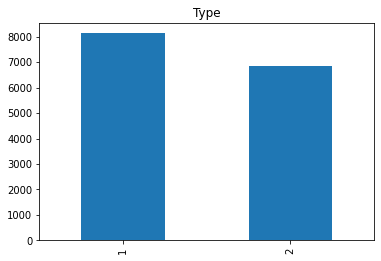

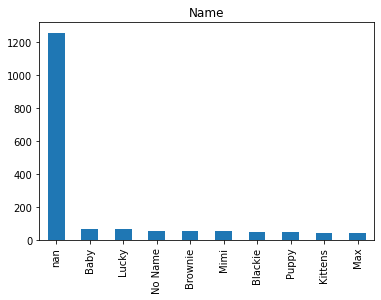

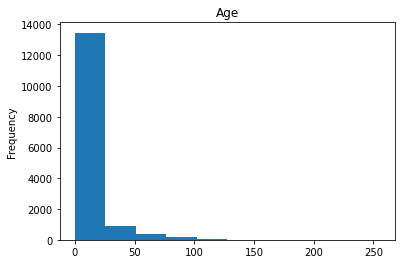

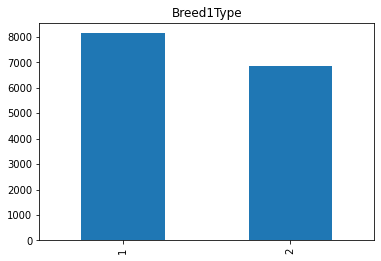

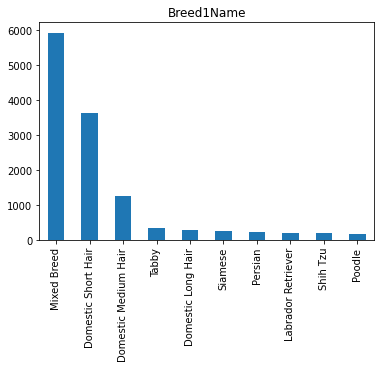

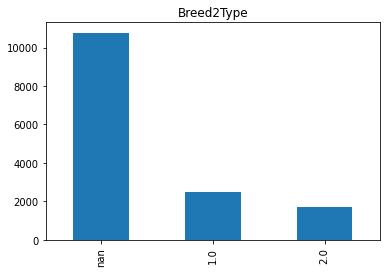

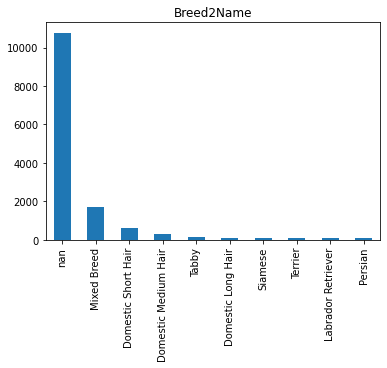

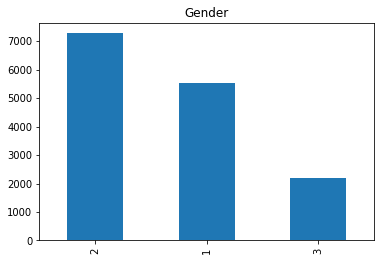

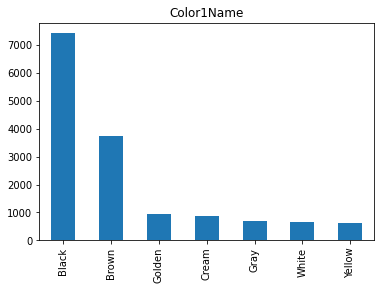

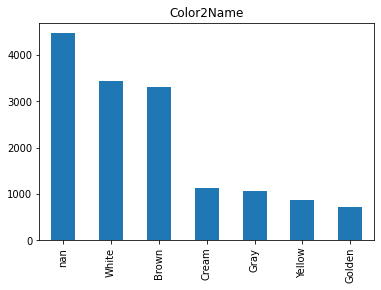

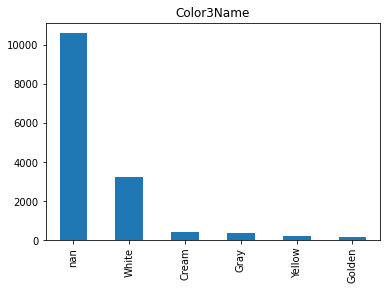

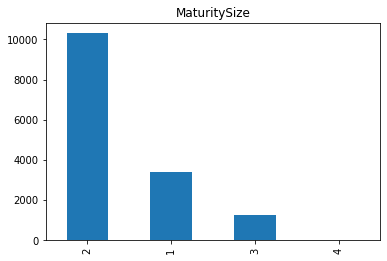

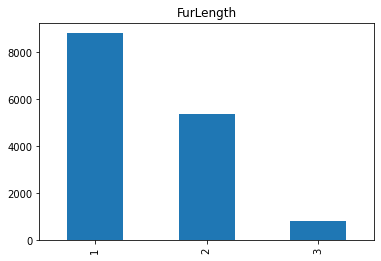

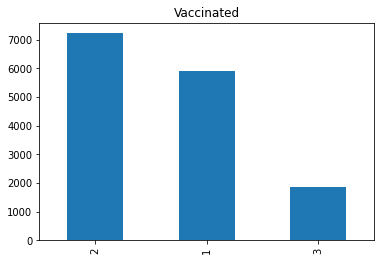

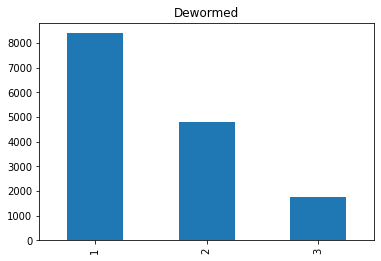

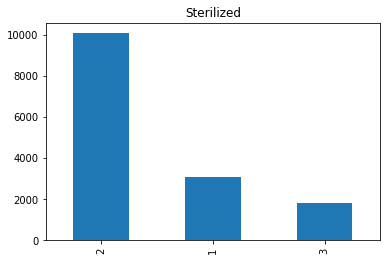

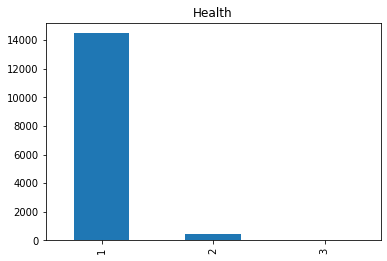

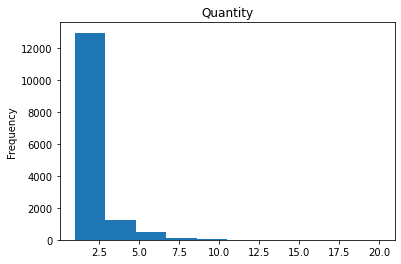

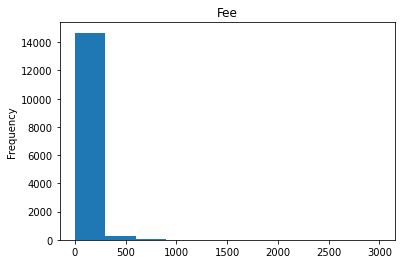

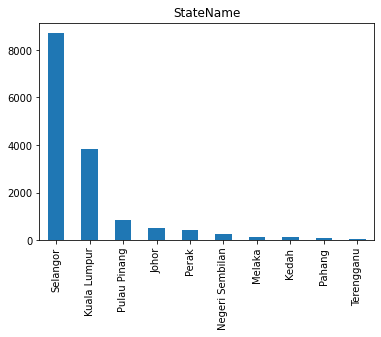

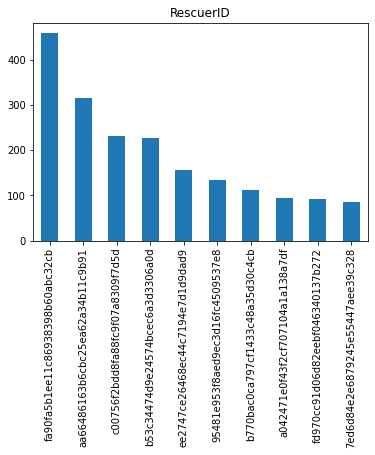

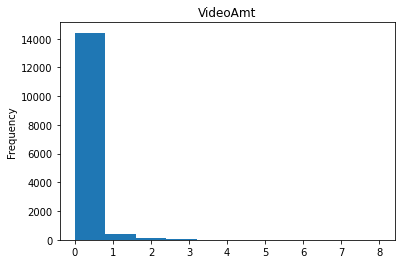

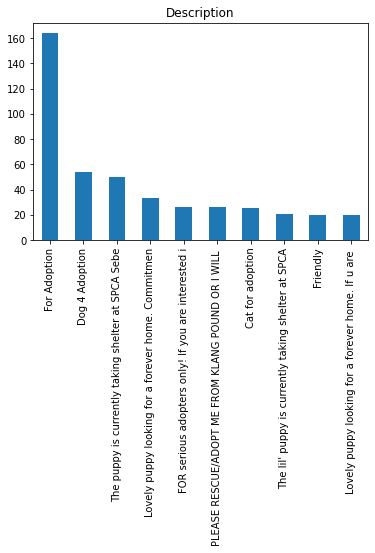

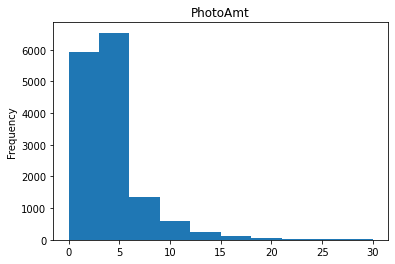

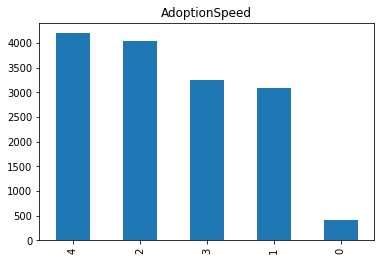

In [ ]:
# Remove ID columns that don't add value to the analysis
plots_df = pets_df.drop(['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State', 'PetID'], axis = 1)

for column in plots_df:
  plt.figure(column)
  plt.title(column)
  if column in numerical_variables:
    plots_df[column].plot(kind = 'hist')
  elif column in categorical_variables:
    plots_df[column].astype(str).str[:50].value_counts()[:10].plot(kind = 'bar')

### Insights and Conclusions

- **Type** We can see that there’s a little bit more of dogs (type=1) than cats (type=2).

- **name** The top 10 common names are “Baby”, “lucky”, “no name”, “Brownie”, “Mimi”, “Blackie”, “Puppy”, “kittens”, “Kitty”, “Max’. All of them appear at least 40 times in the data and the most common appears over 60 times.

- **Age** From the statistics we can see that at least 75% of the animals are 1-year-old or less. 

- **BreedType** We can see that the columns Breed1Type and Breed2Type carry the same data as the column “Type”, which just specifies the type of the animal (Dog or cat). We can remove these columns from the data to avoid redundancy.

- **StateName** More than half of the profiles are from the Selangor state. The second most recurrent state is Kuala Lumpur with almost 4000 profiles.

- **RescuerID** We can see than 1 rescuer was responsible for more than 400 profiles. The second most recurrent is around 300 profiles.


## Multivariate Analysis
Overview of this task:

We want to check any relation between variables. We divided this step into three different types of analysis:

*   Numerical vs. Numerical → heat map or pairplot
*   Categorical vs. Categorical → countplot with hue
*   Categorical vs. Numerical → boxplot or pairplot with hue




In [ ]:
pets_df[numerical_variables].head()

Age  Quantity  Fee  VideoAmt  PhotoAmt
0    3         1  100         0       1.0
1    1         1    0         0       2.0
2    1         1    0         0       7.0
3    4         1  150         0       8.0
4    1         1    0         0       3.0

### Numerical vs. Numerical

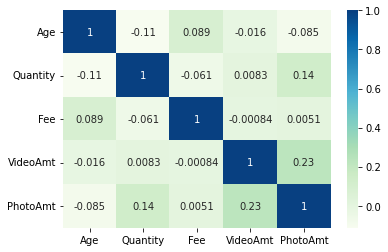

In [ ]:
# Correlation Matrix and heatmap
correlation = pets_df[numerical_variables].corr()
sns.heatmap(correlation, cmap = 'GnBu', annot = True)

From the correlation matrix we can see that all the correlations between numerical variables are not very significant. There's a little stronger correlation between VideoAmt and PhotoAMt, but still is a weak correlation (0.23). Since we don't see any significant correlation in the matrix above, we already know that a Pair-plot wouldn't show us any type of relationship between the variables, but let's check it anyway just to support our previous conclusion.

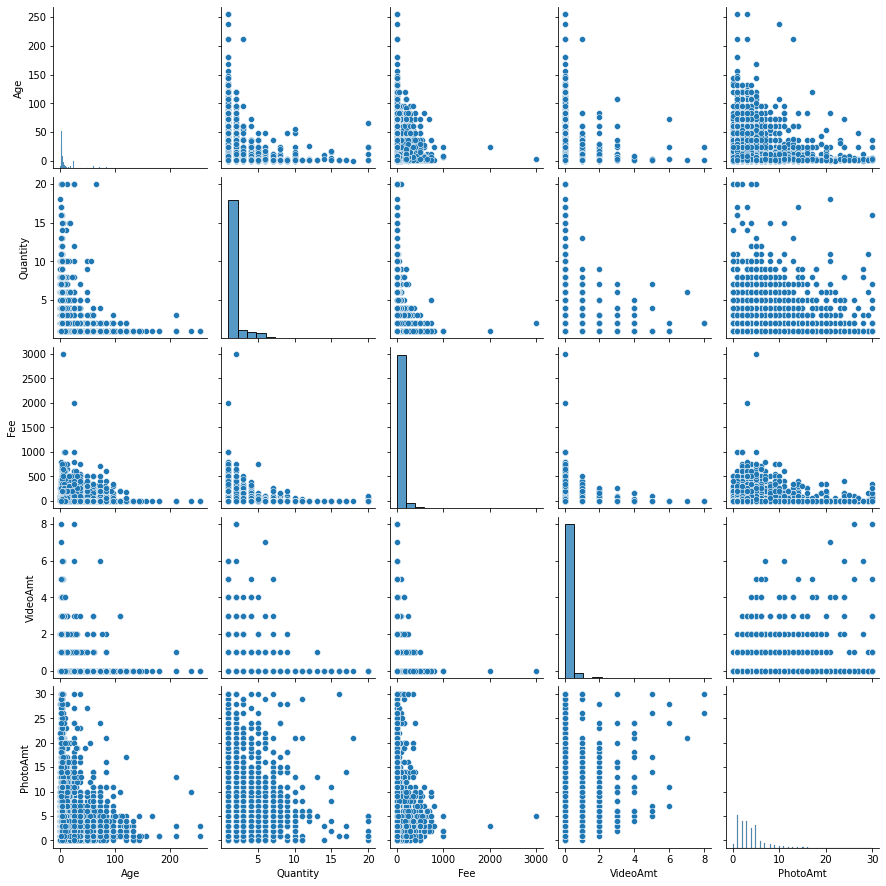

In [ ]:
# Pair-plot
sns.pairplot(pets_df[numerical_variables], height=2.5)

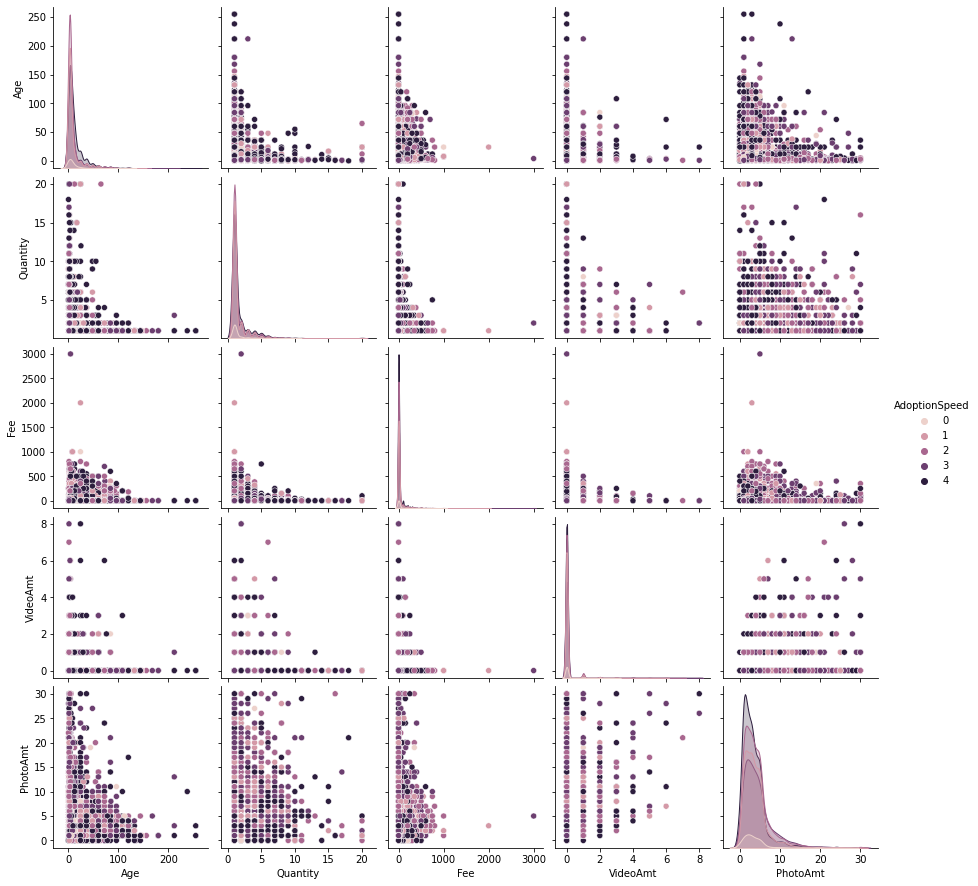

In [ ]:
hue_variable = 'AdoptionSpeed'
sns.pairplot(pets_df[numerical_variables + [hue_variable]], hue=hue_variable)

As expected, the plots don't suggest any relation between any pair of numerical variables. We cannot identify any pattern visually like an ascending/descennding line or another non-linear shape.

### Categorical vs. Categorical

In [ ]:
# This second list has less variables because the other one caused an error of
# not enough memory. So, we removed variables that were not important to the analysis
categorical_variables = ['Type', 'Breed1Type', 'Breed1Name', 'Gender', 'Color1Name',
                         'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
                         'Sterilized', 'Health', 'StateName', 'AdoptionSpeed']

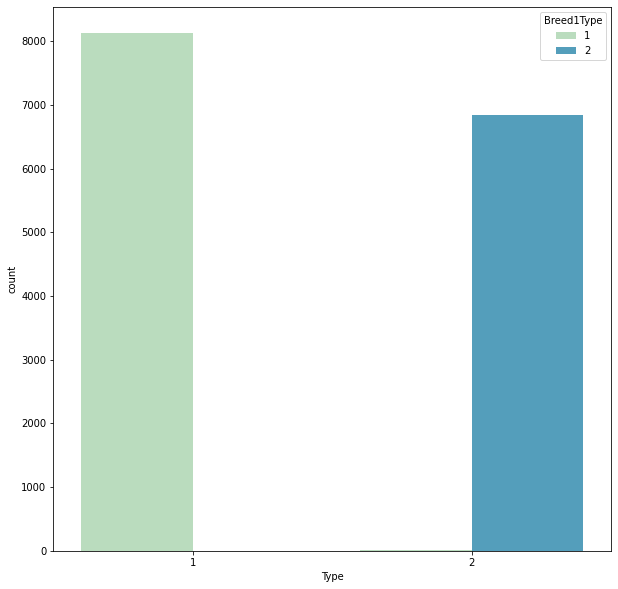

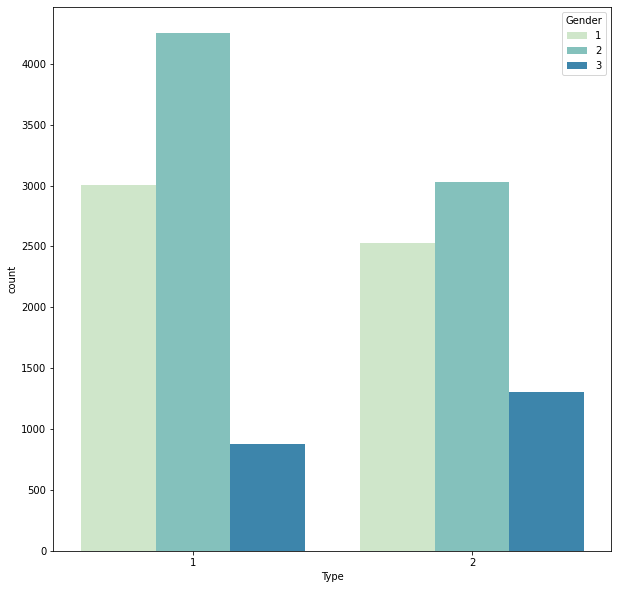

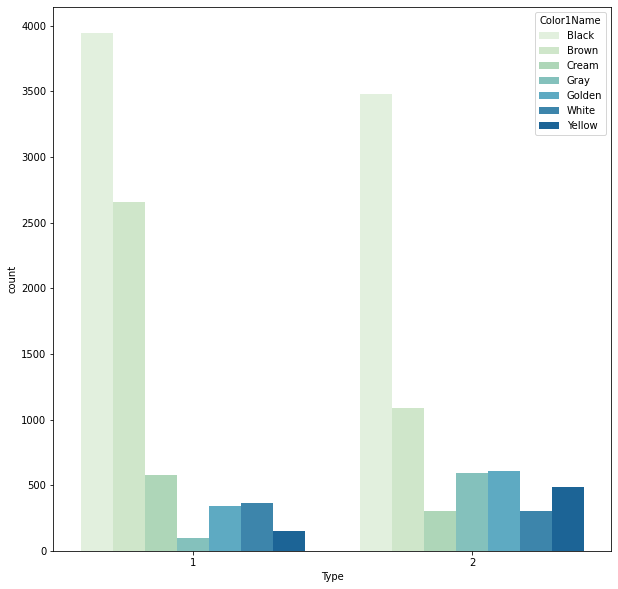

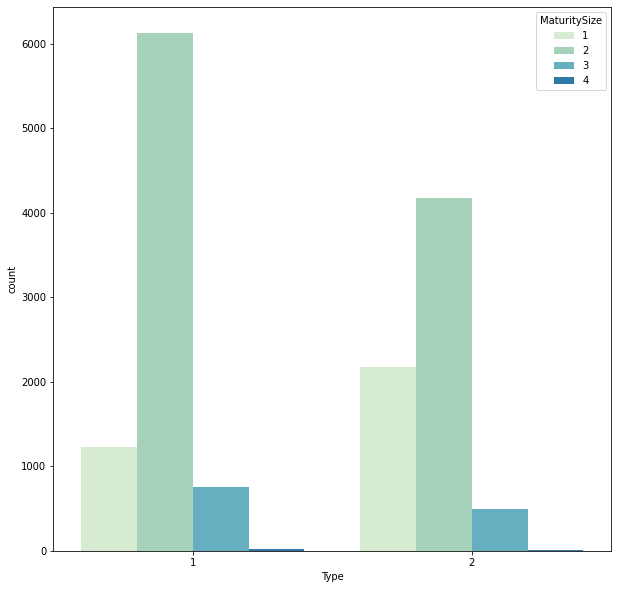

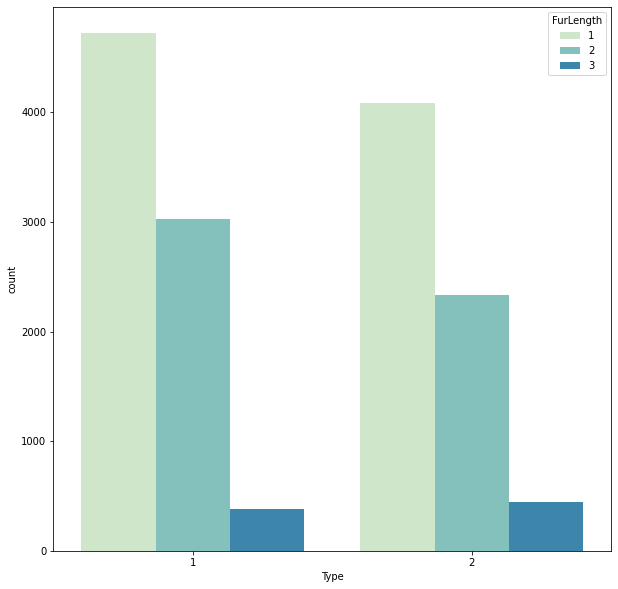

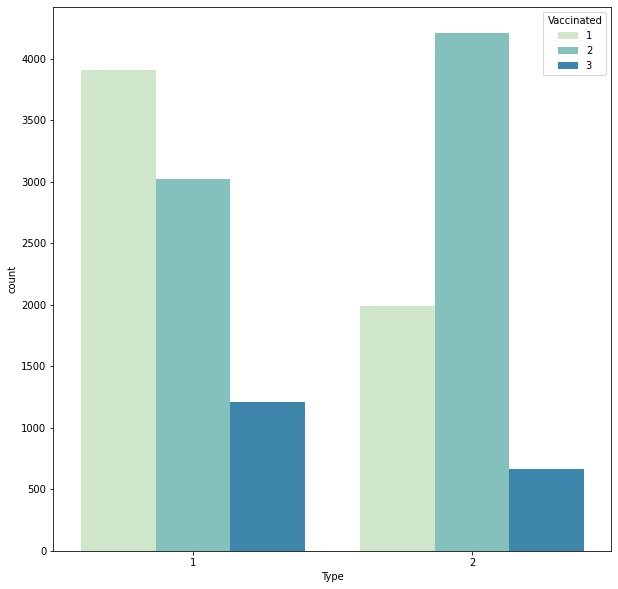

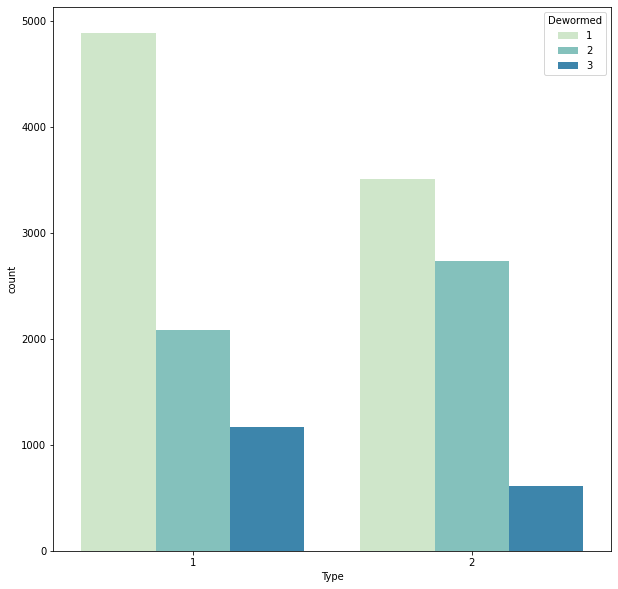

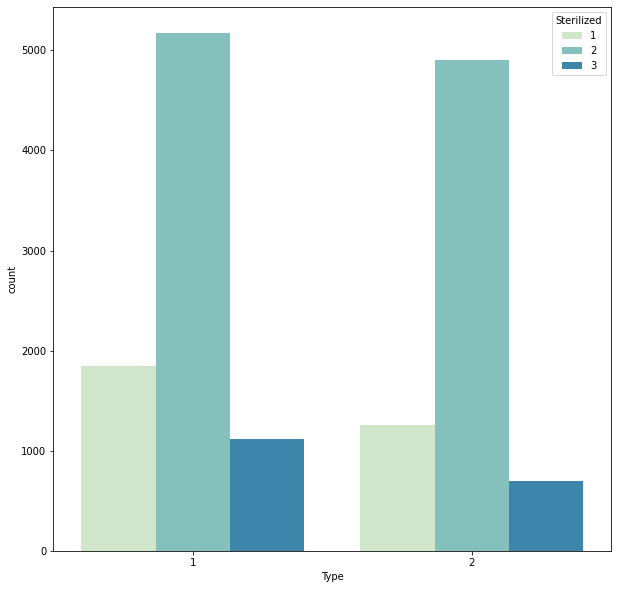

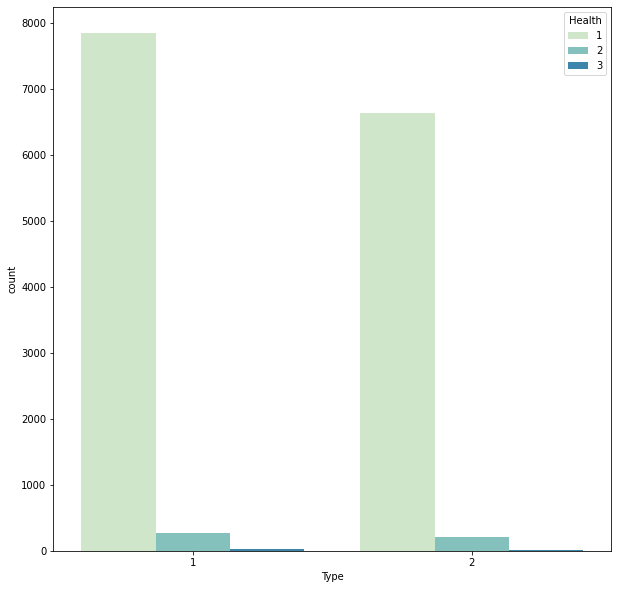

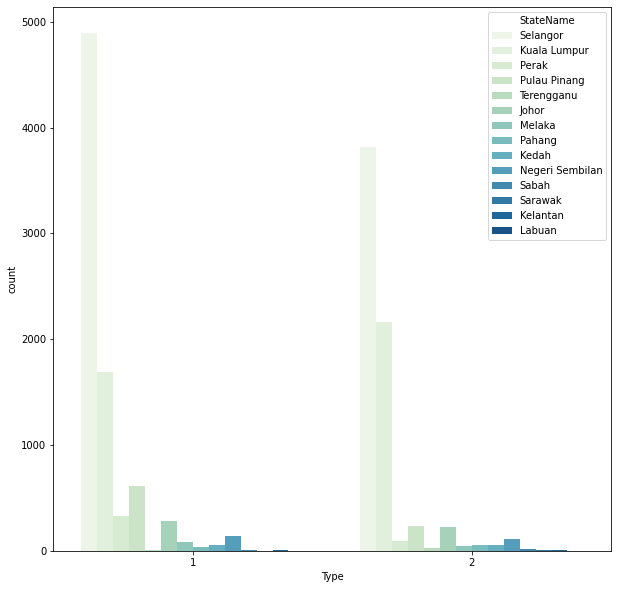

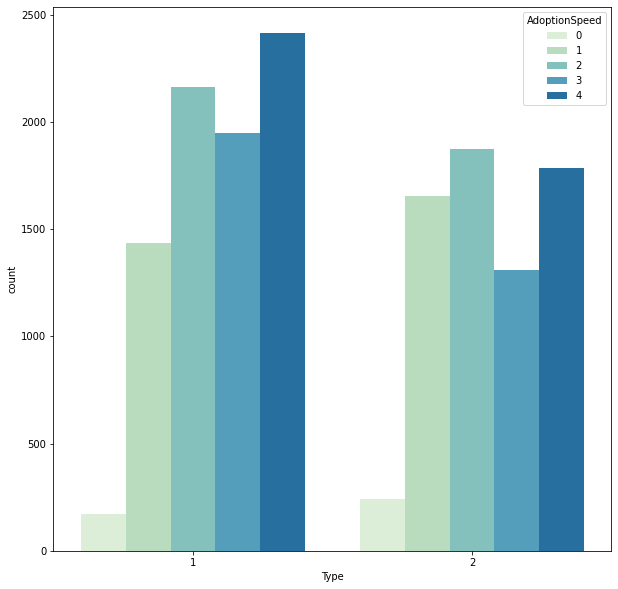

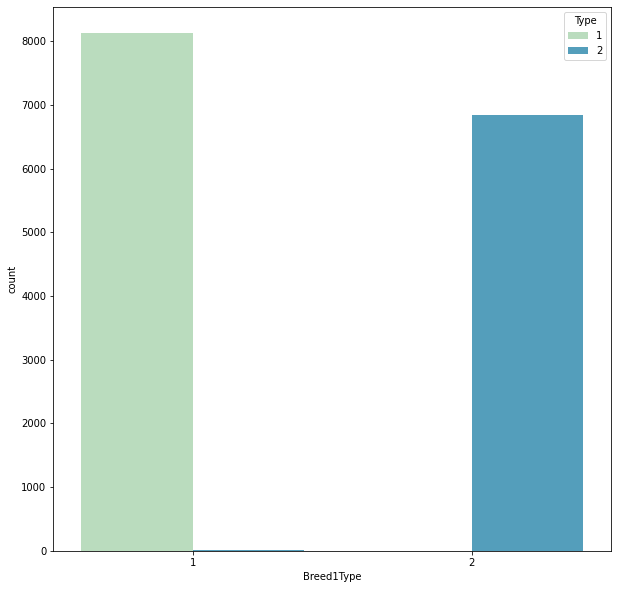

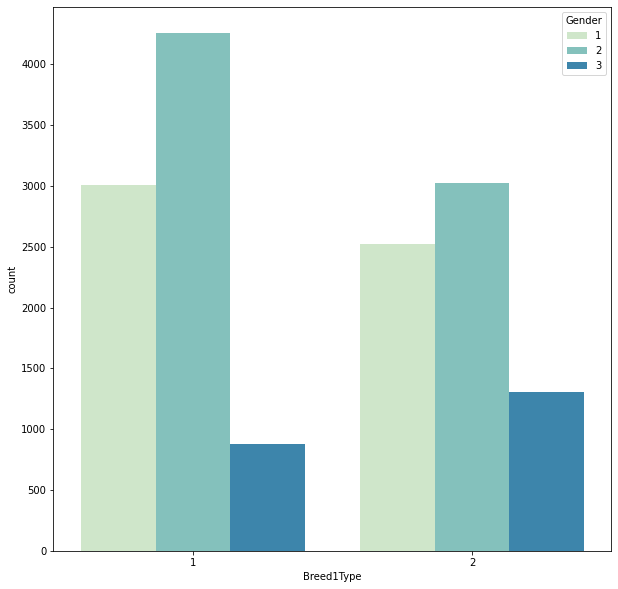

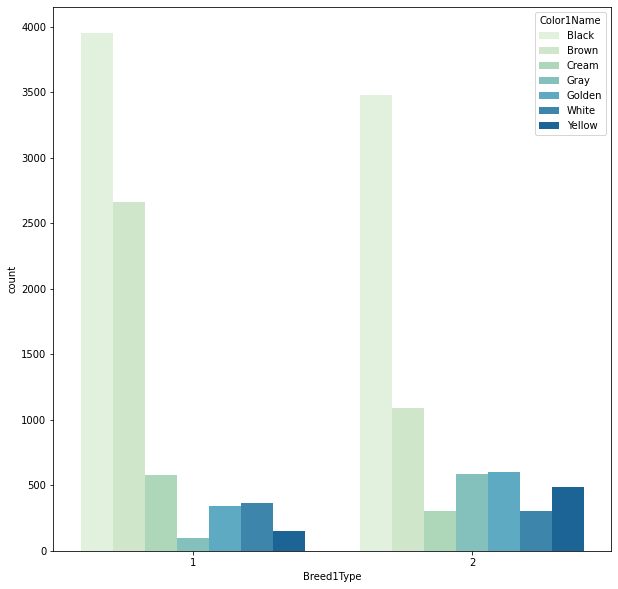

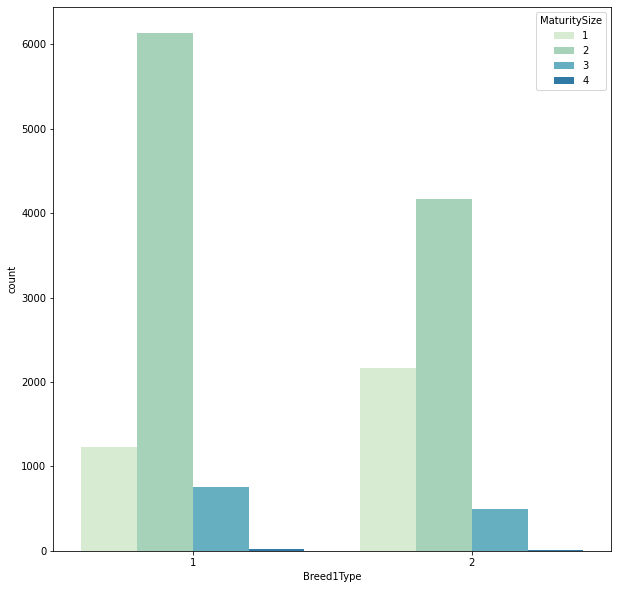

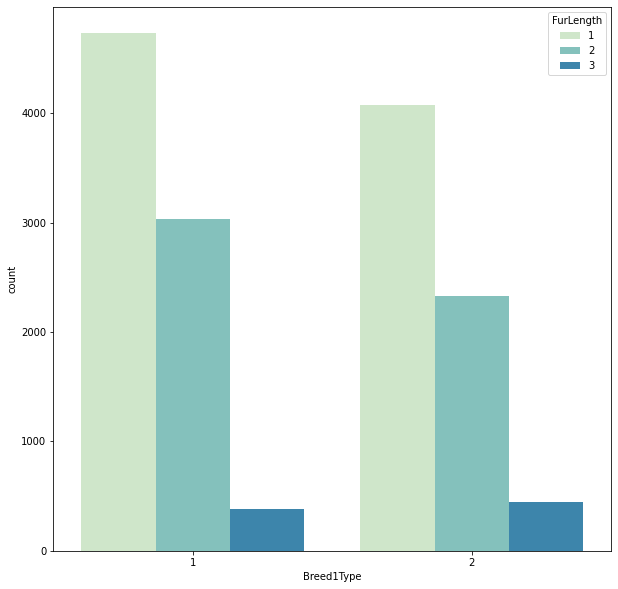

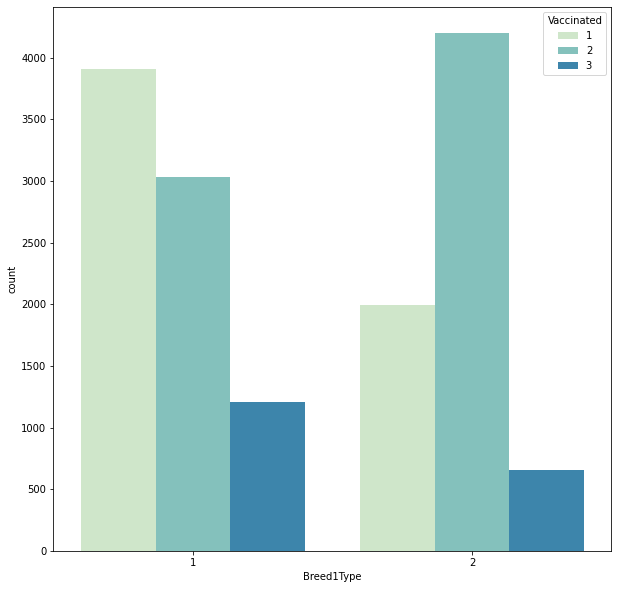

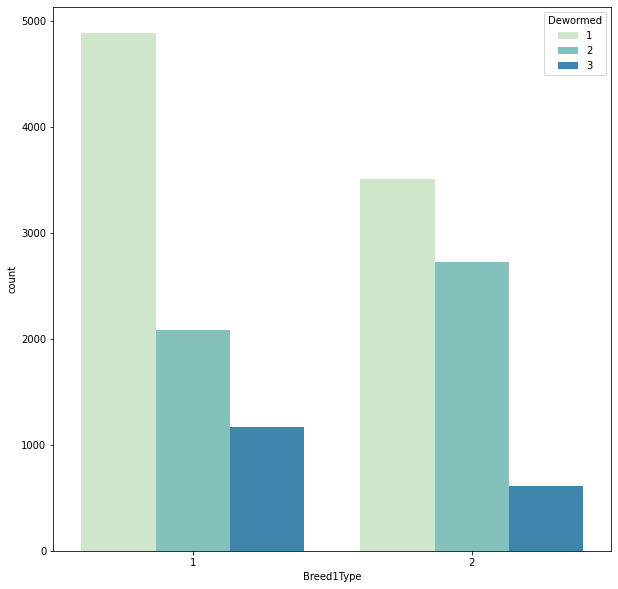

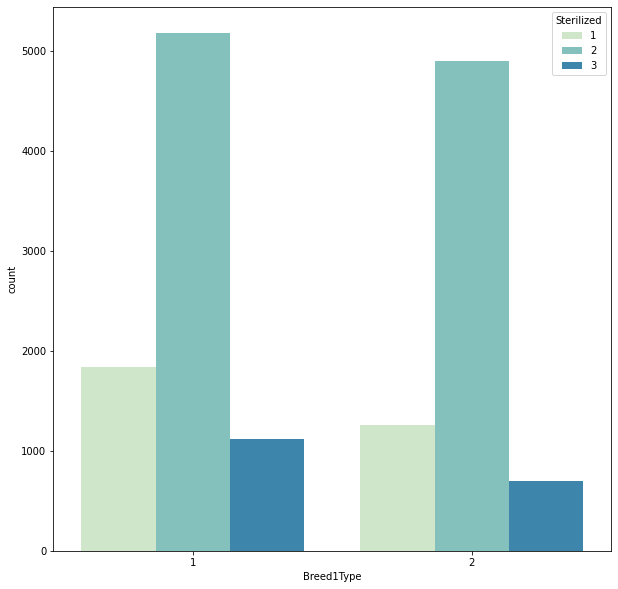

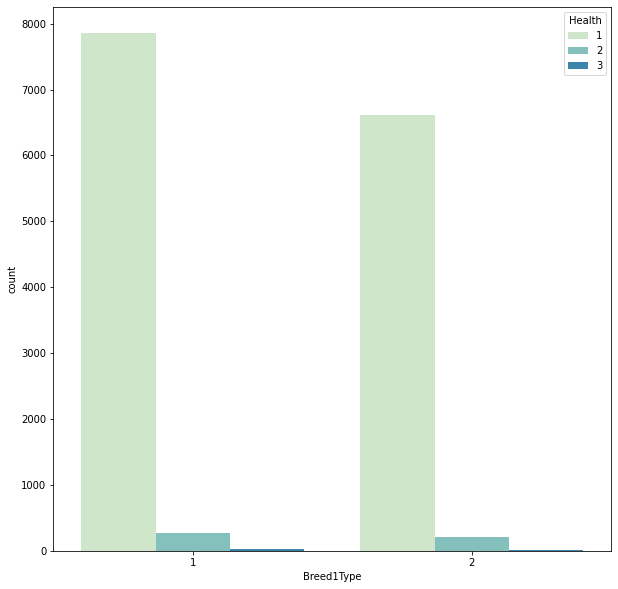

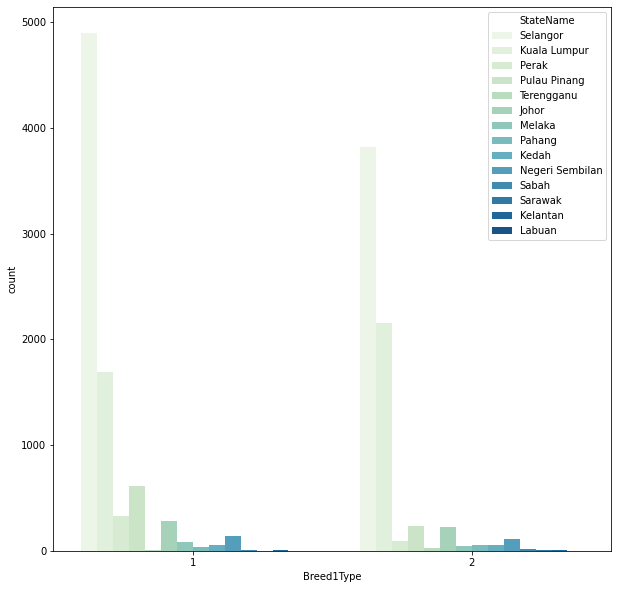

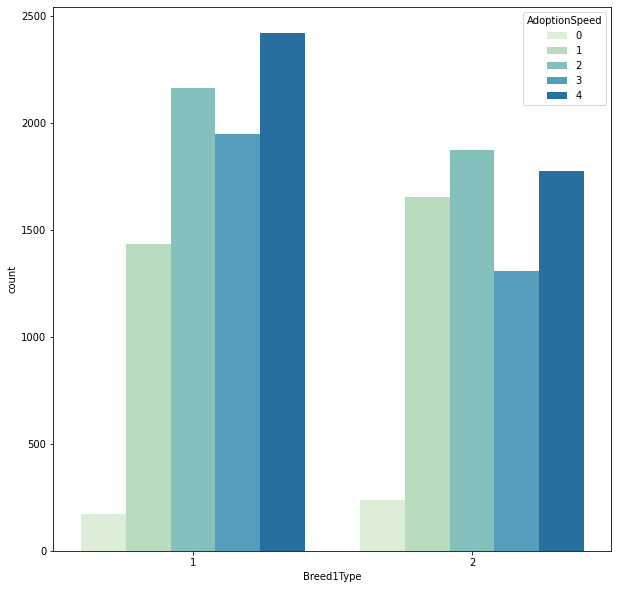

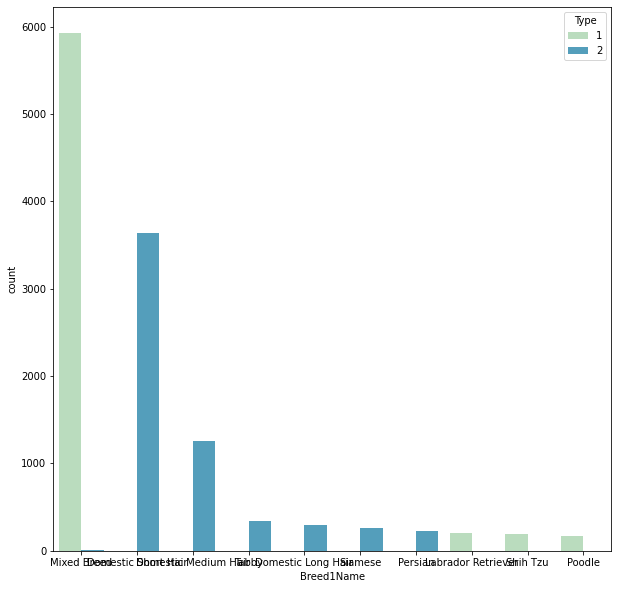

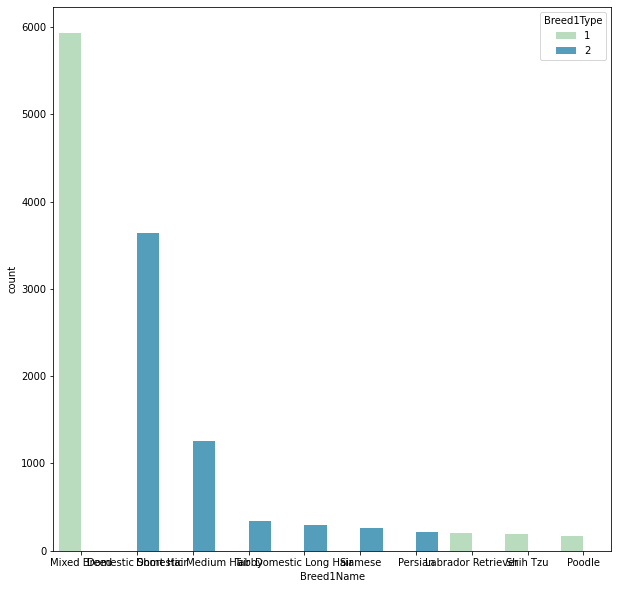

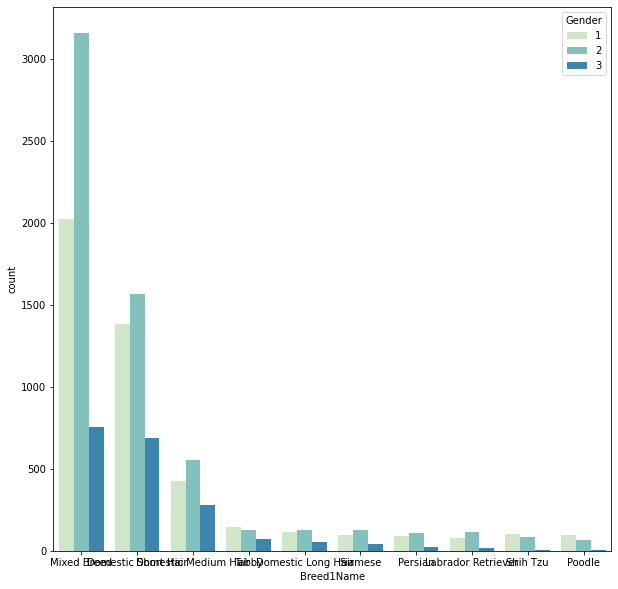

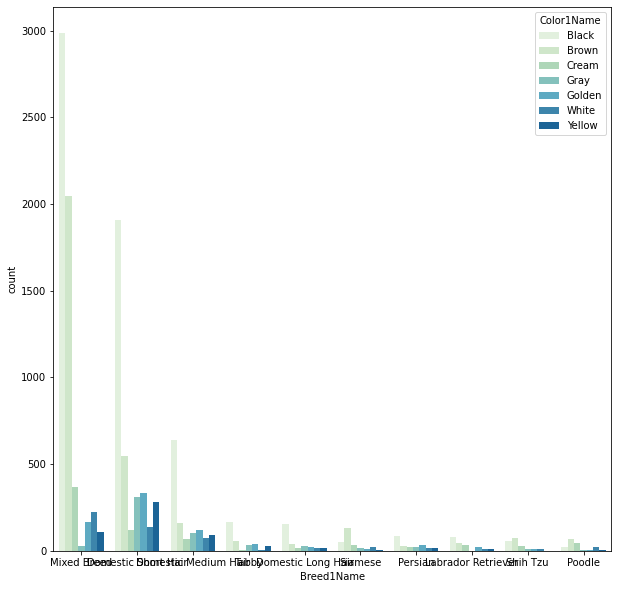

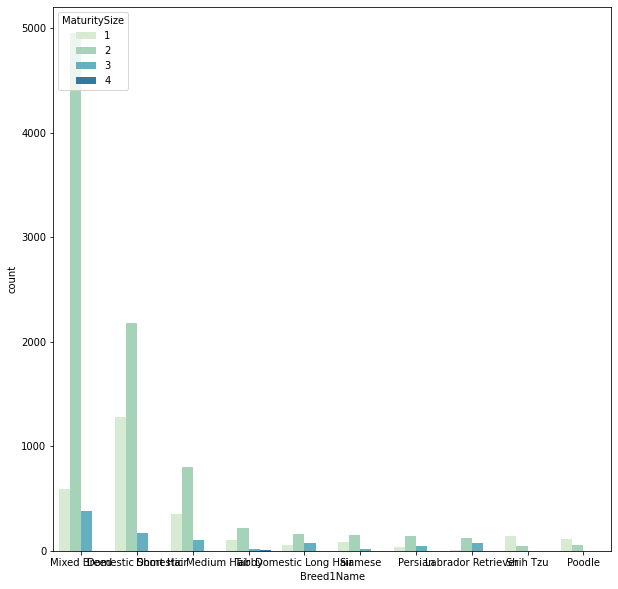

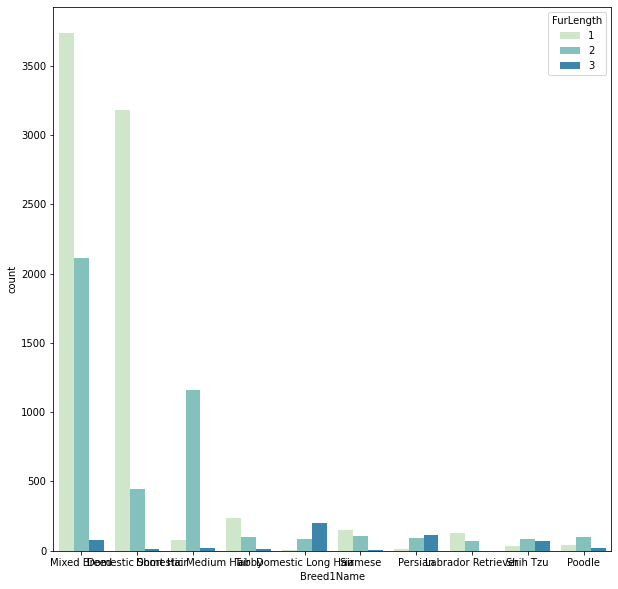

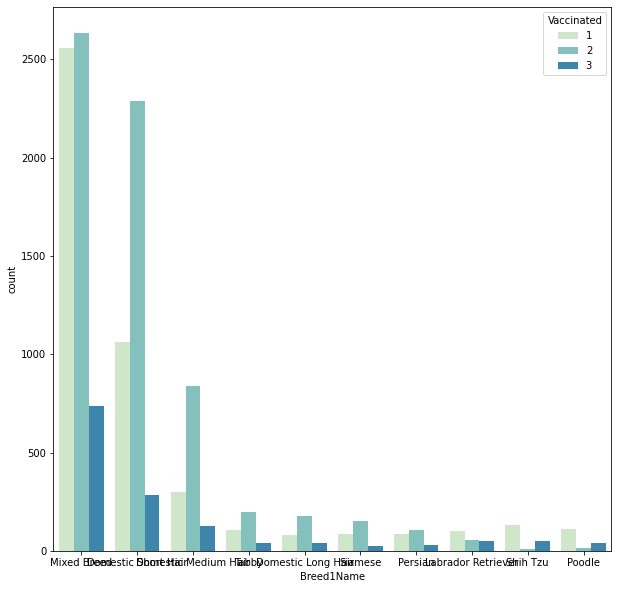

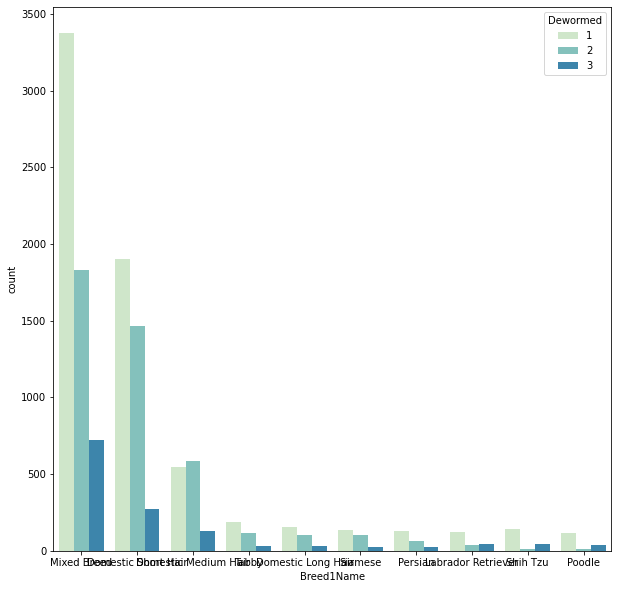

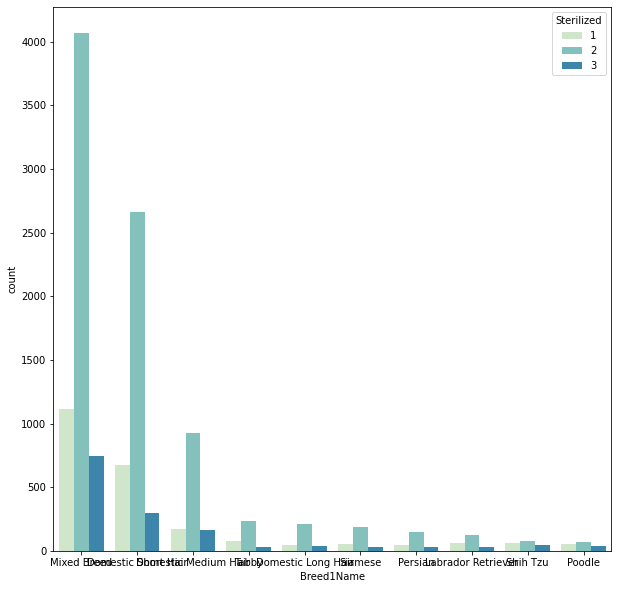

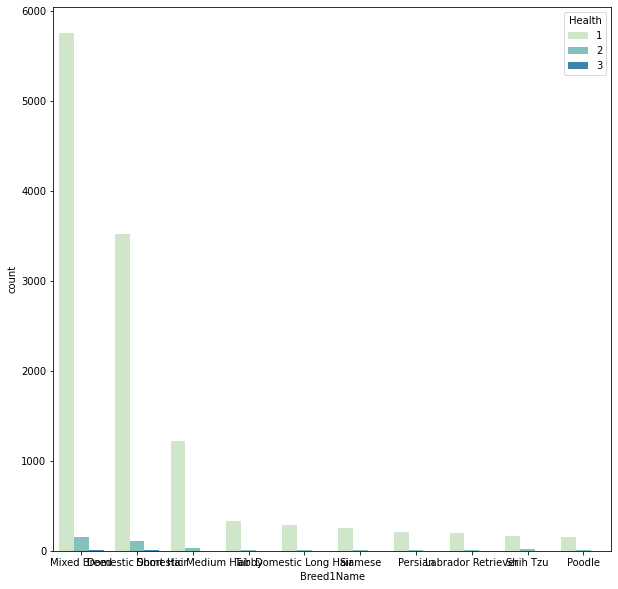

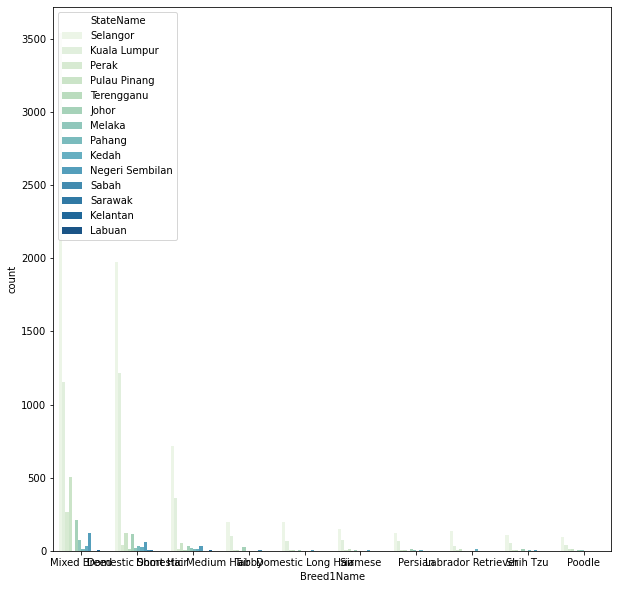

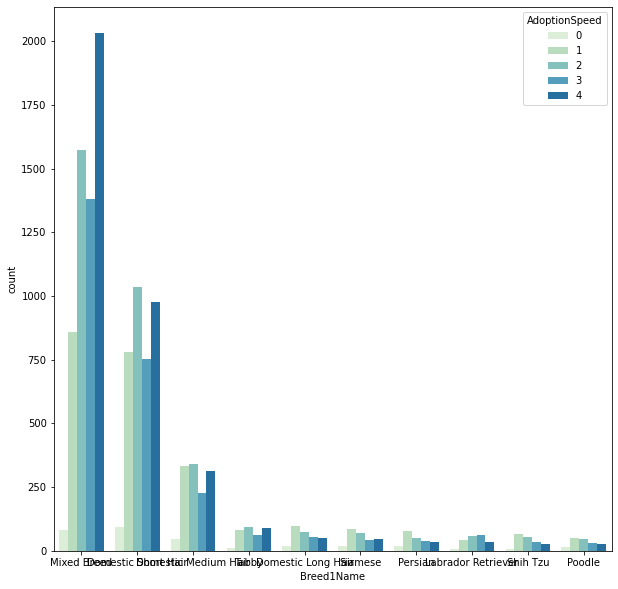

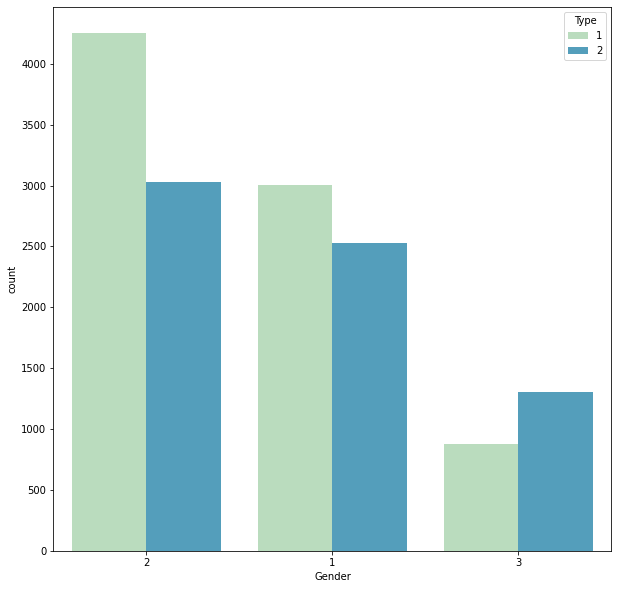

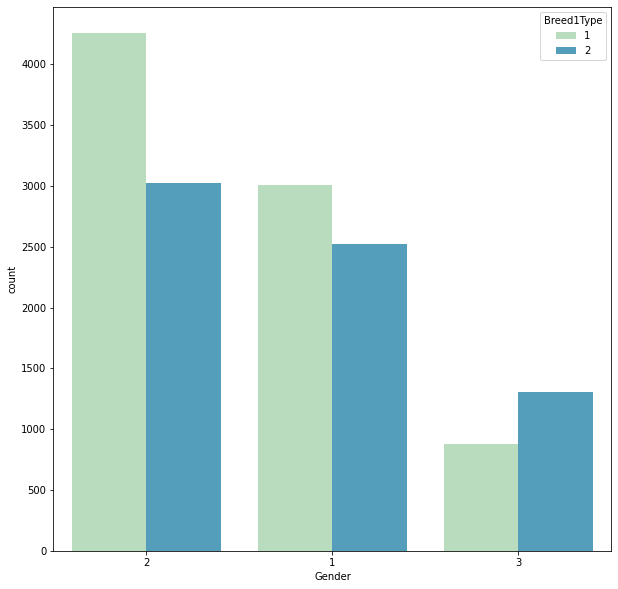

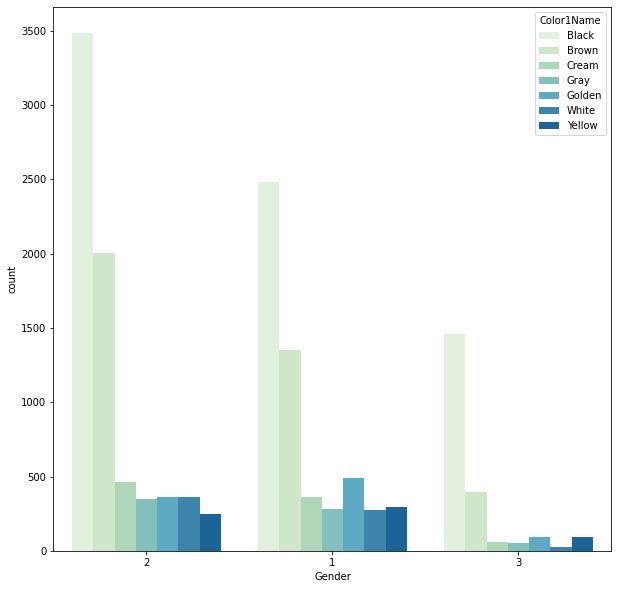

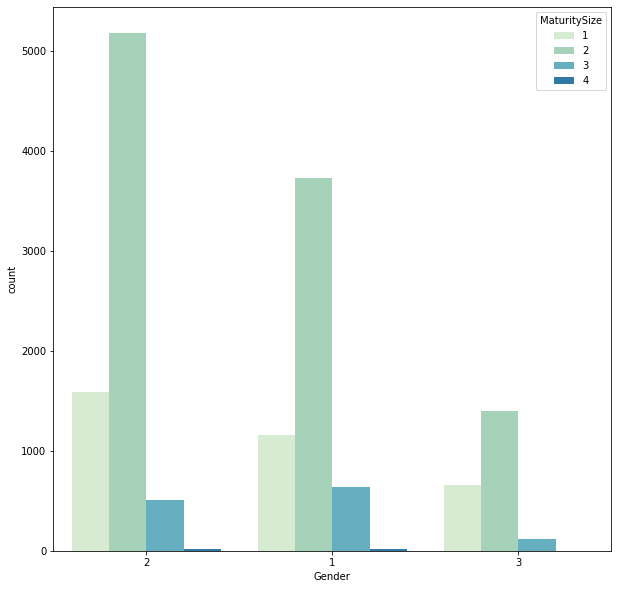

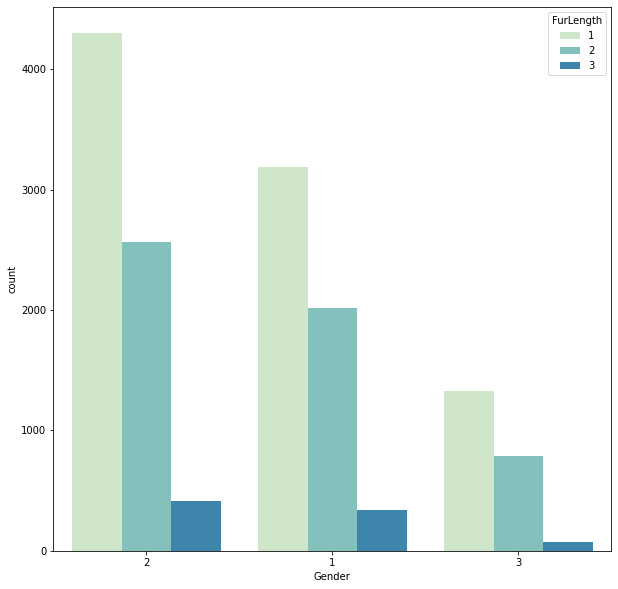

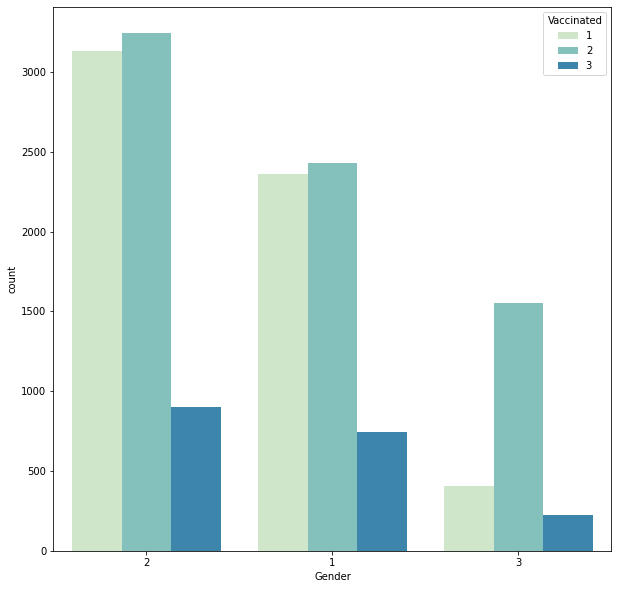

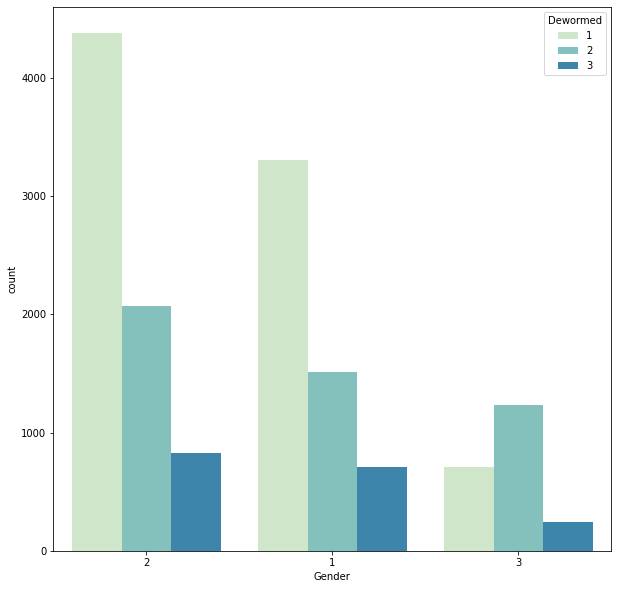

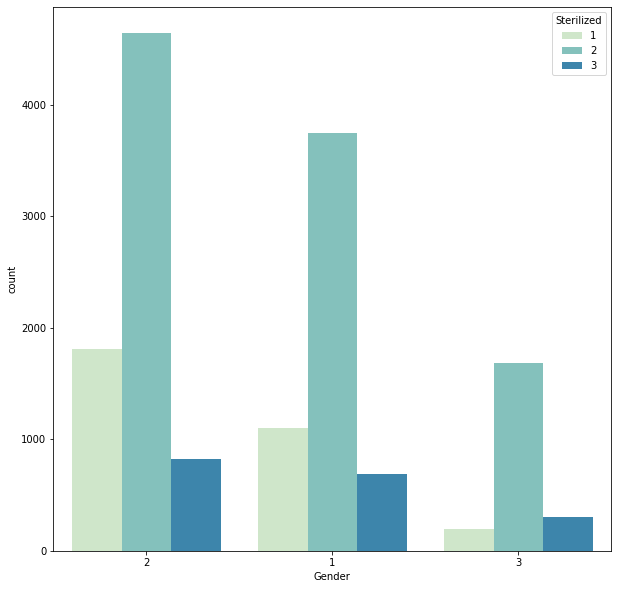

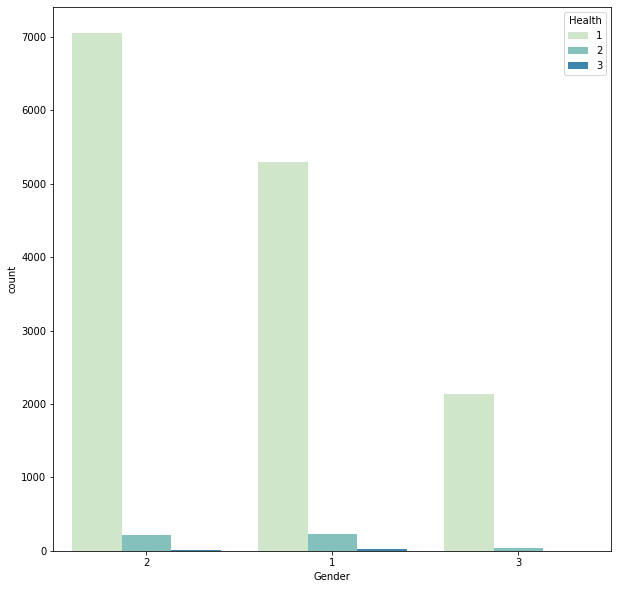

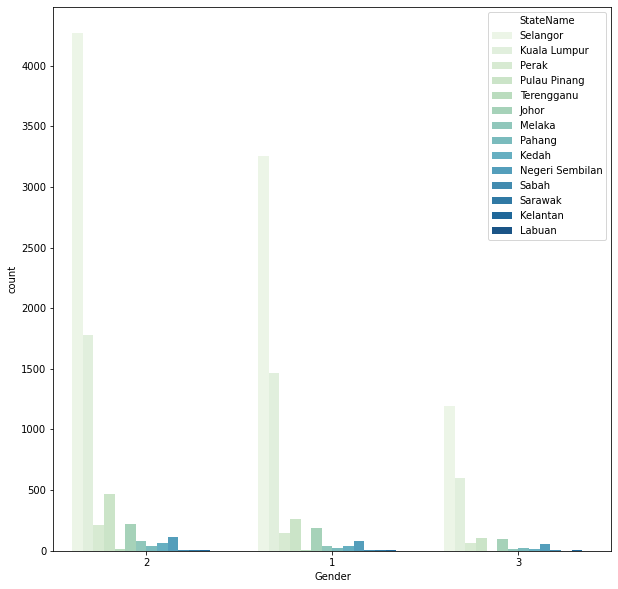

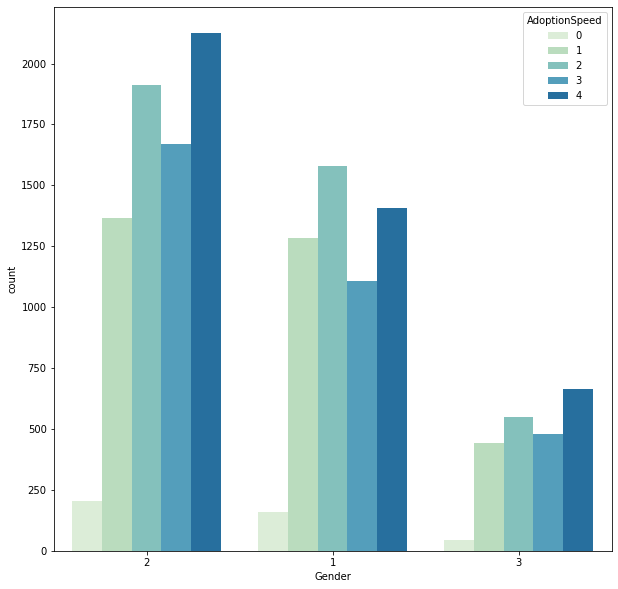

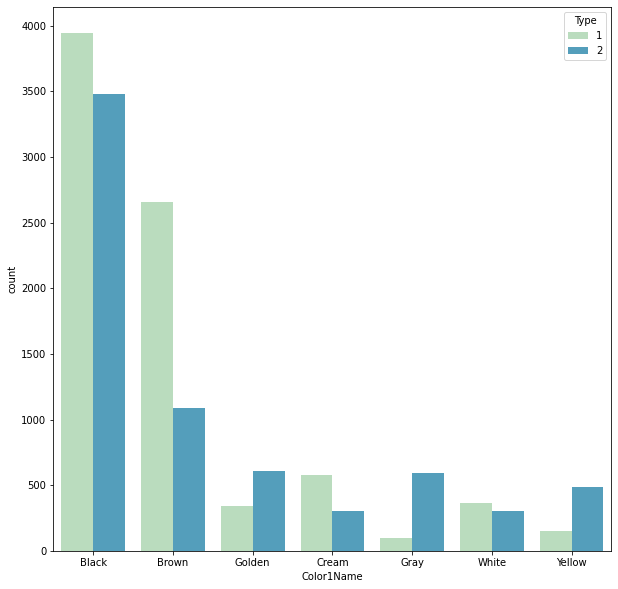

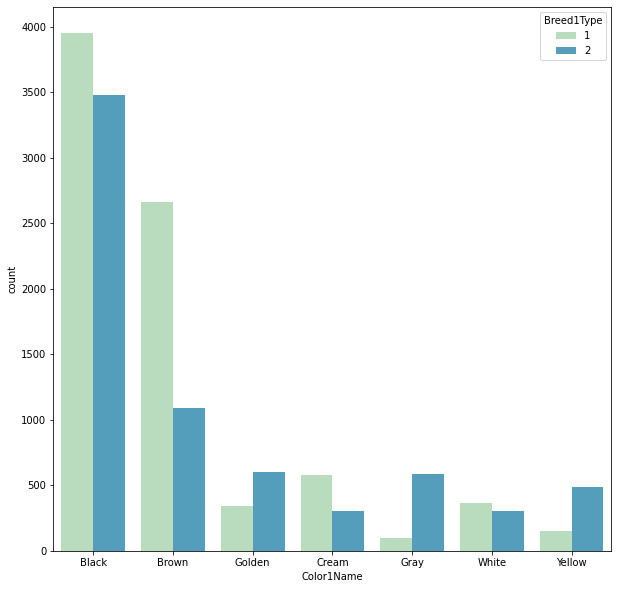

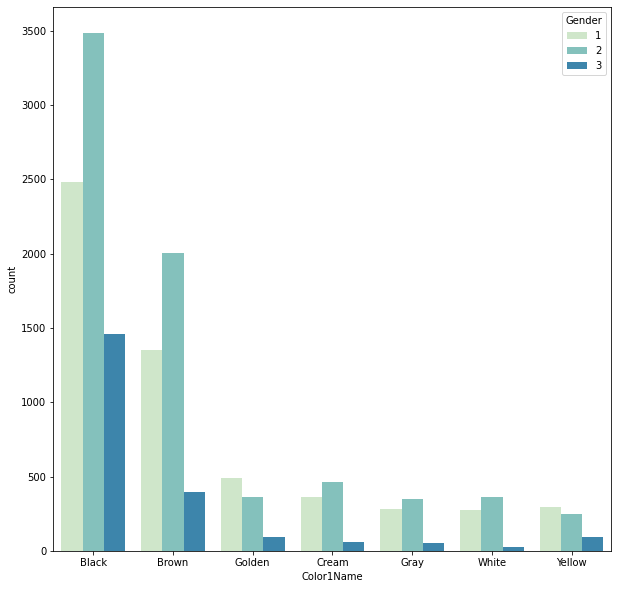

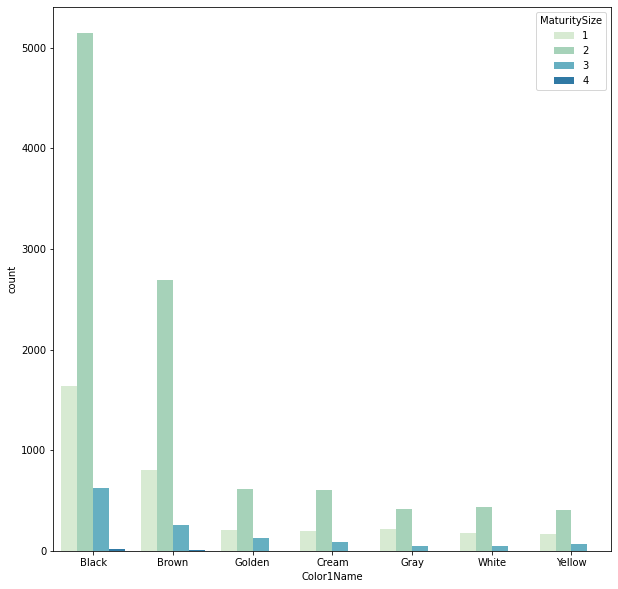

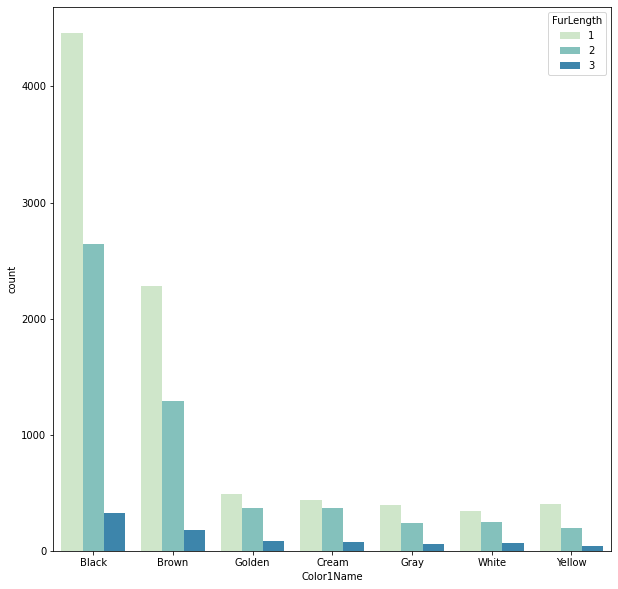

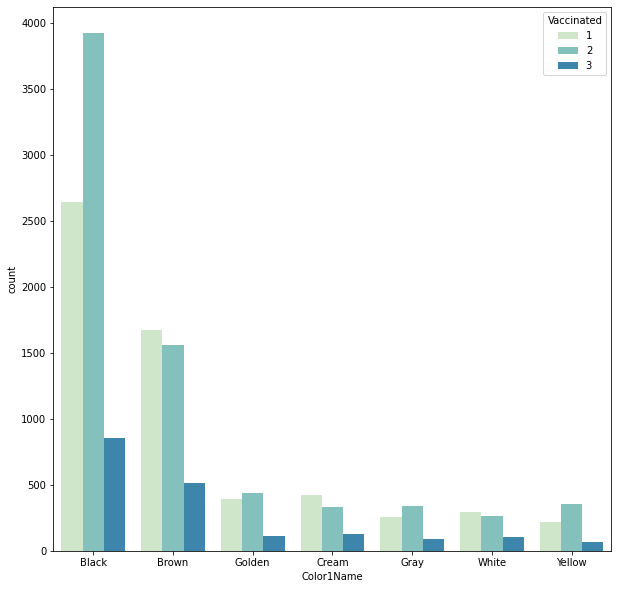

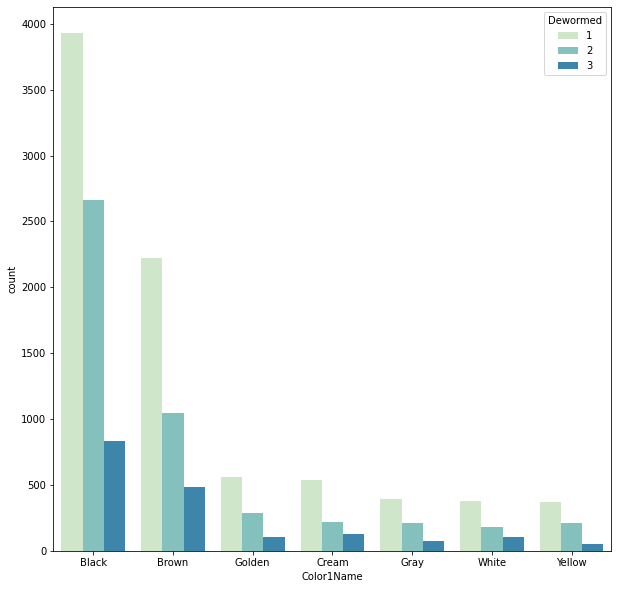

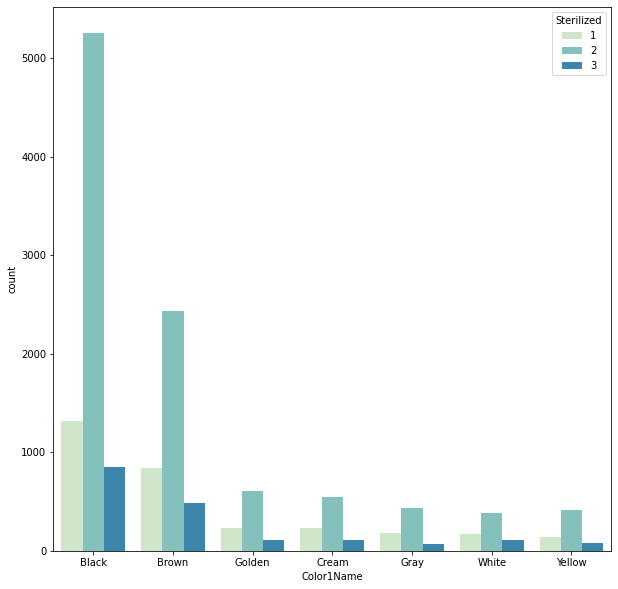

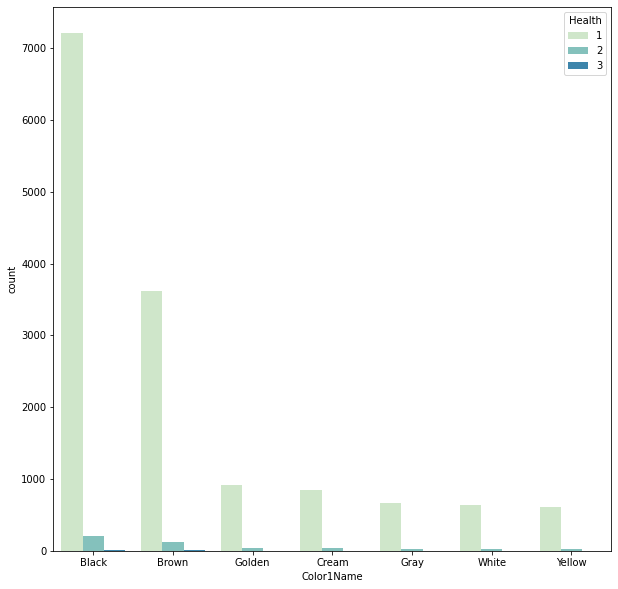

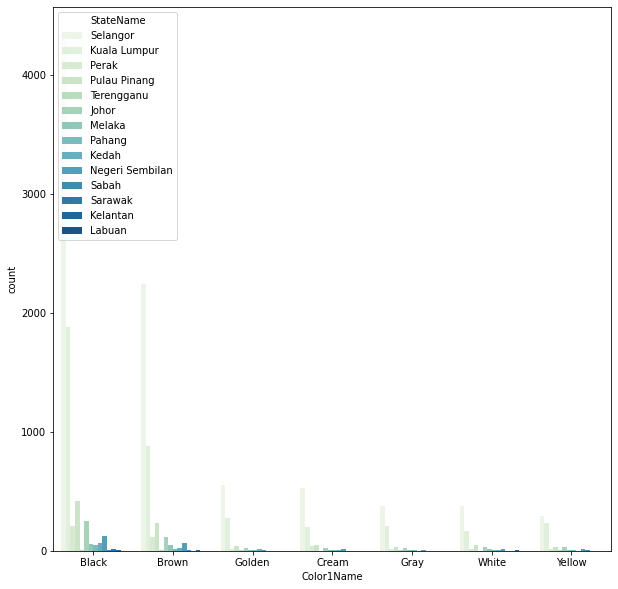

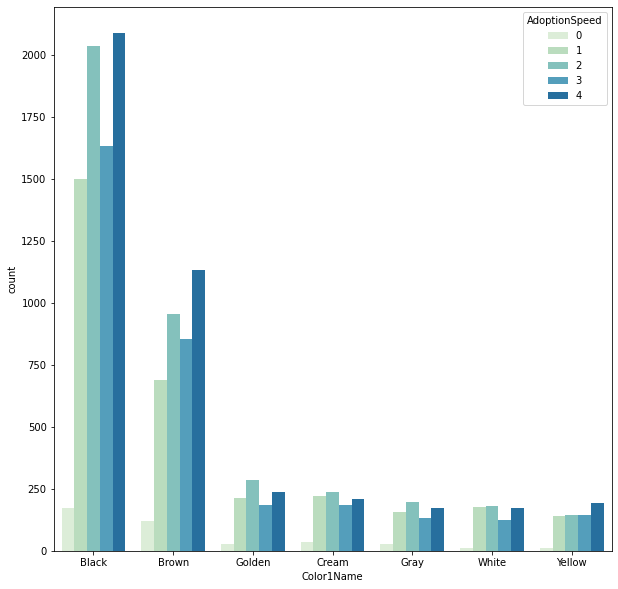

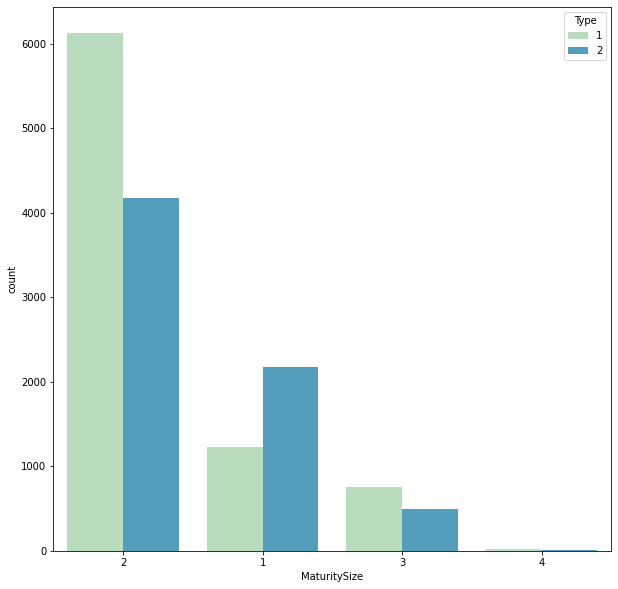

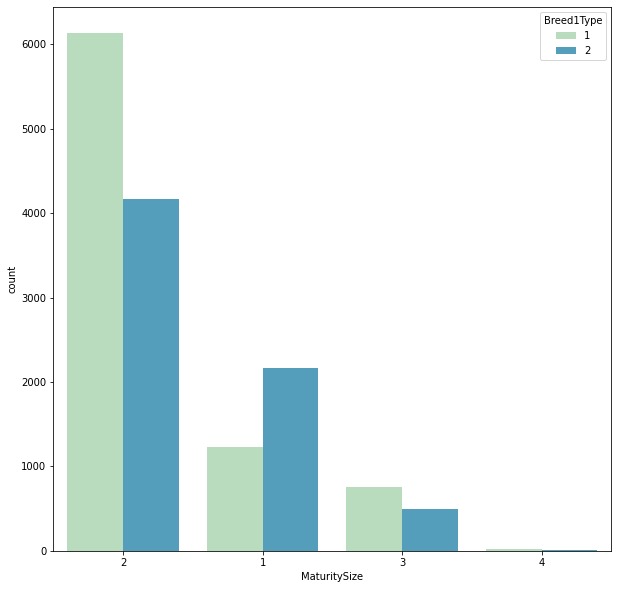

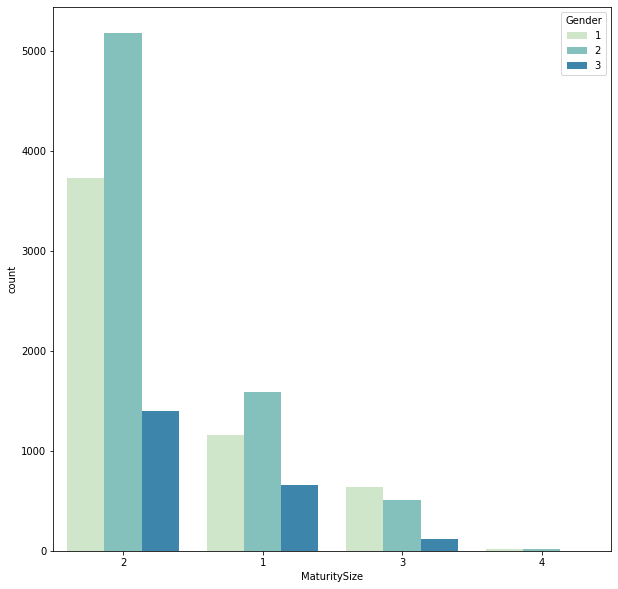

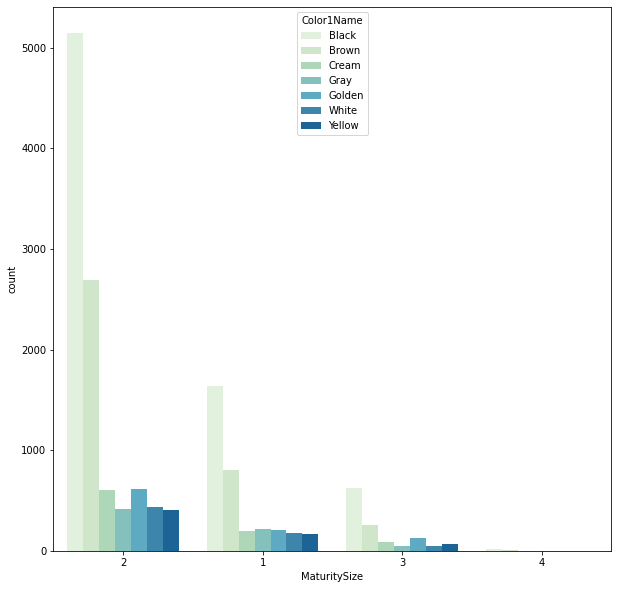

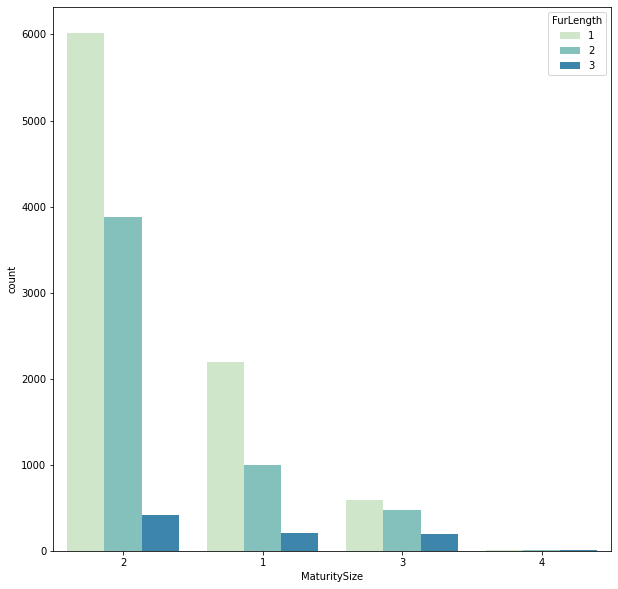

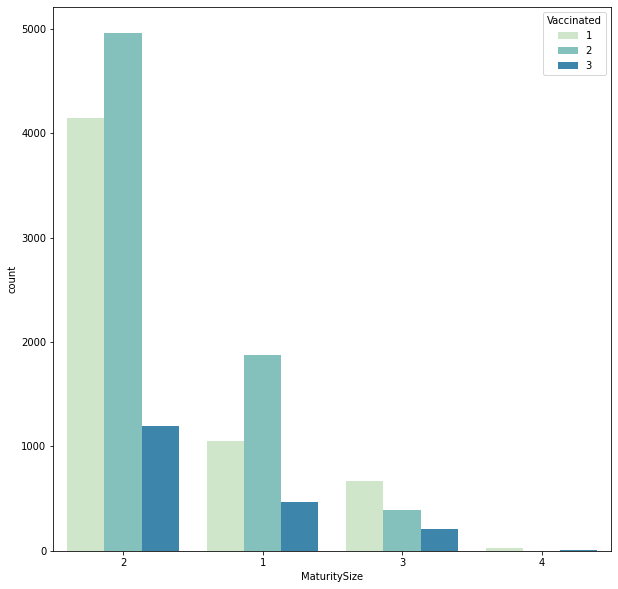

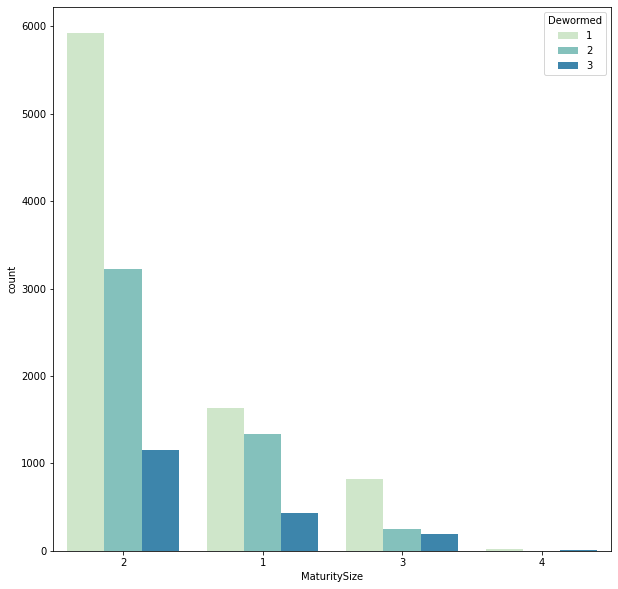

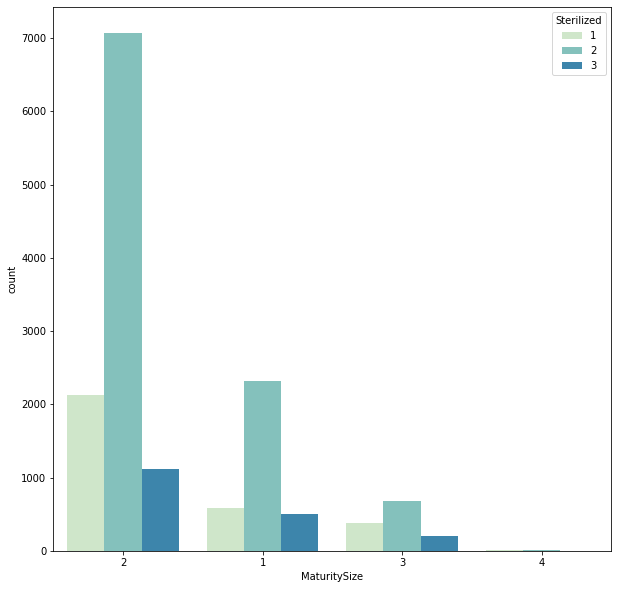

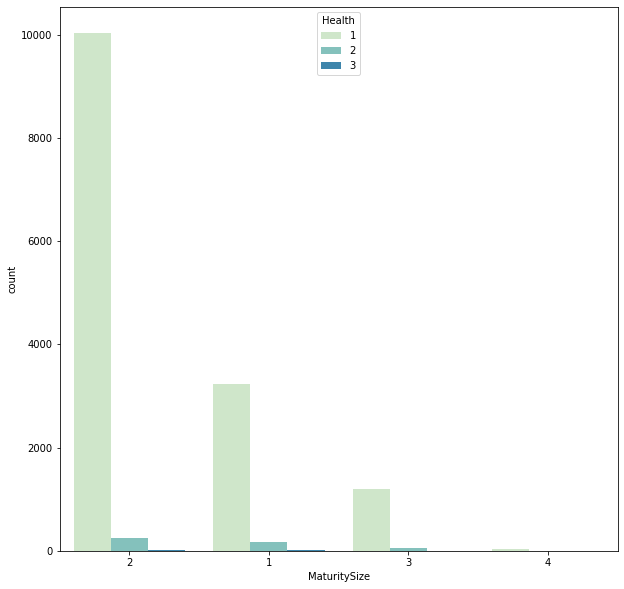

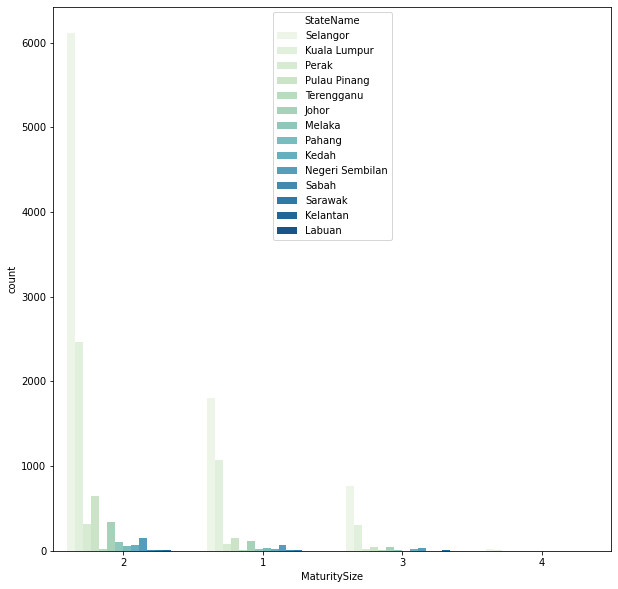

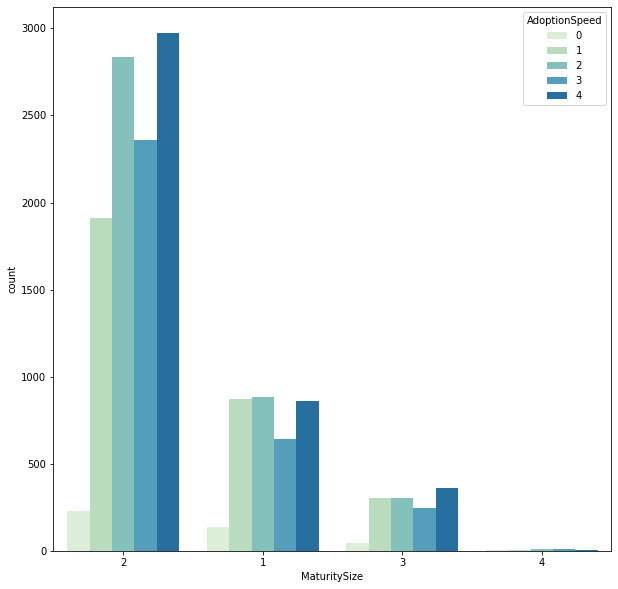

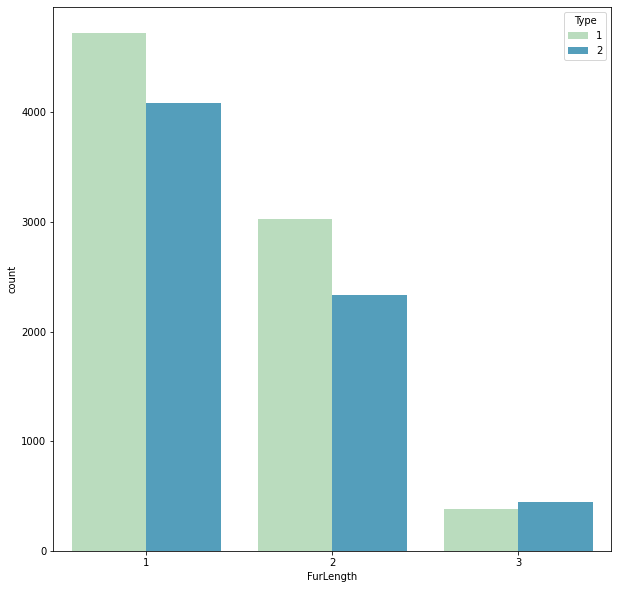

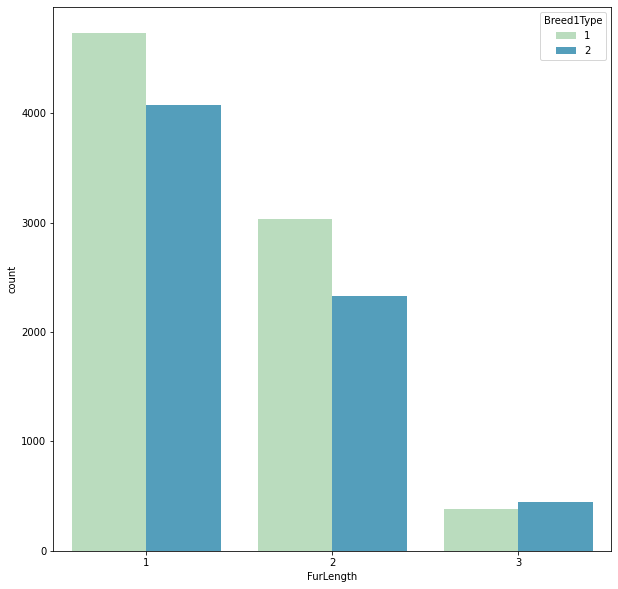

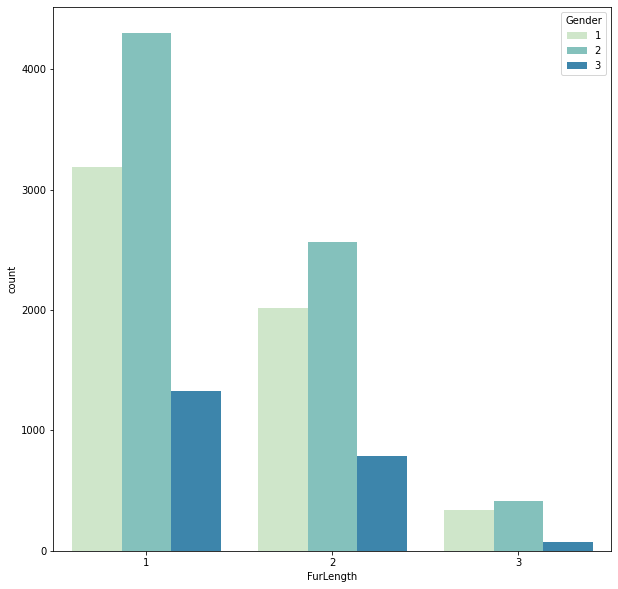

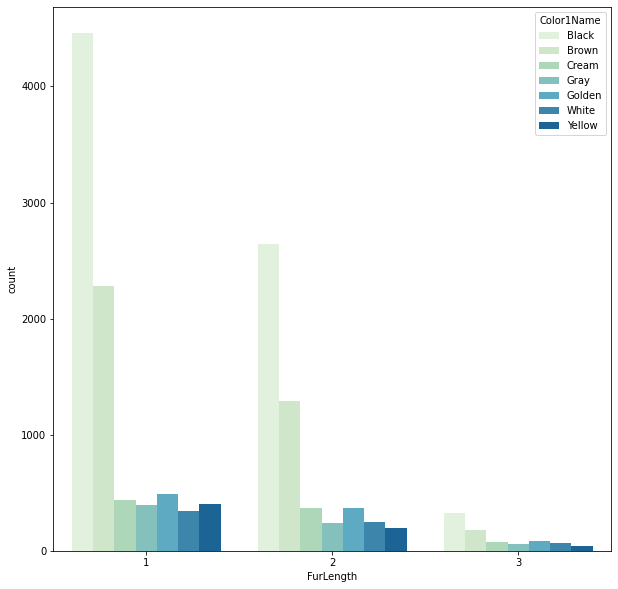

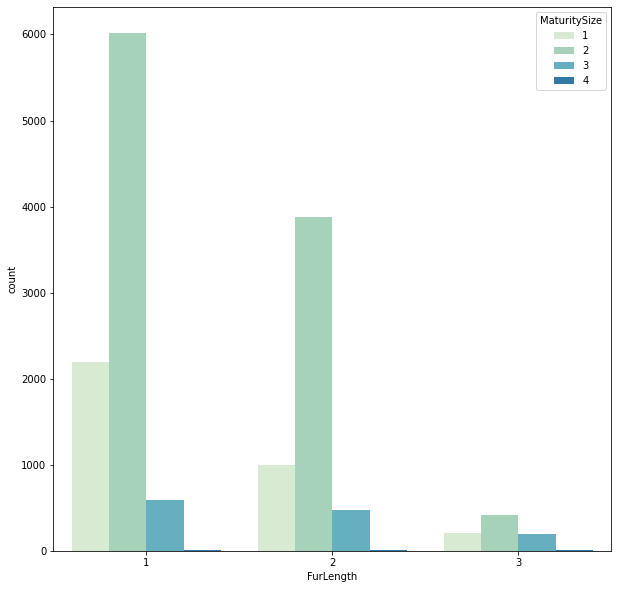

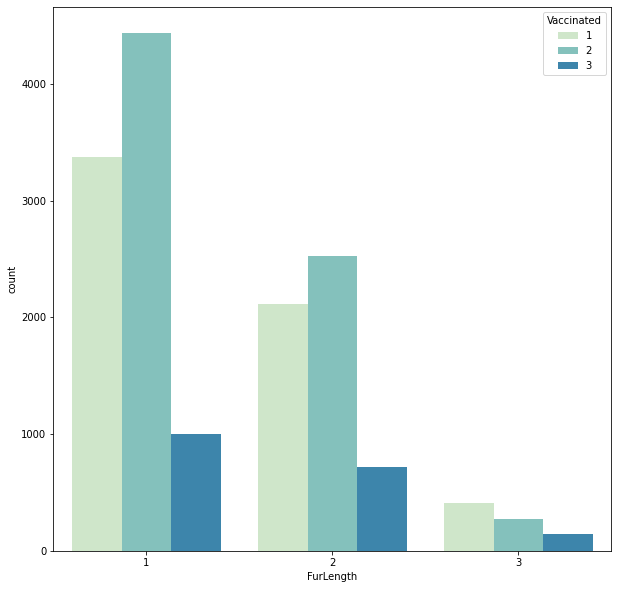

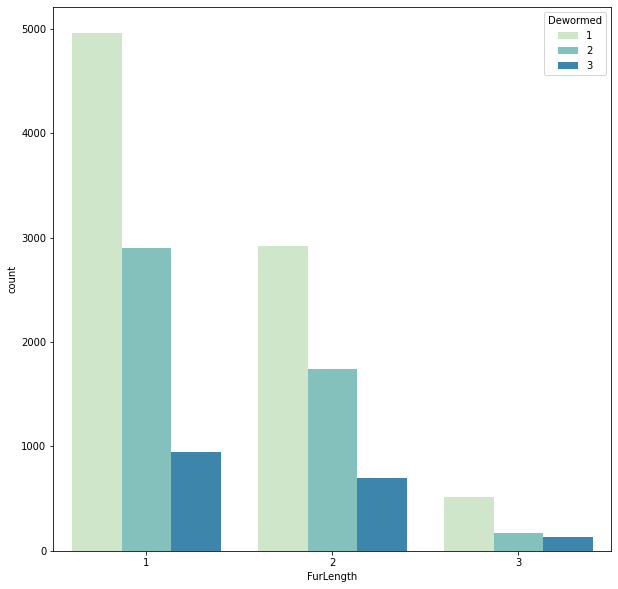

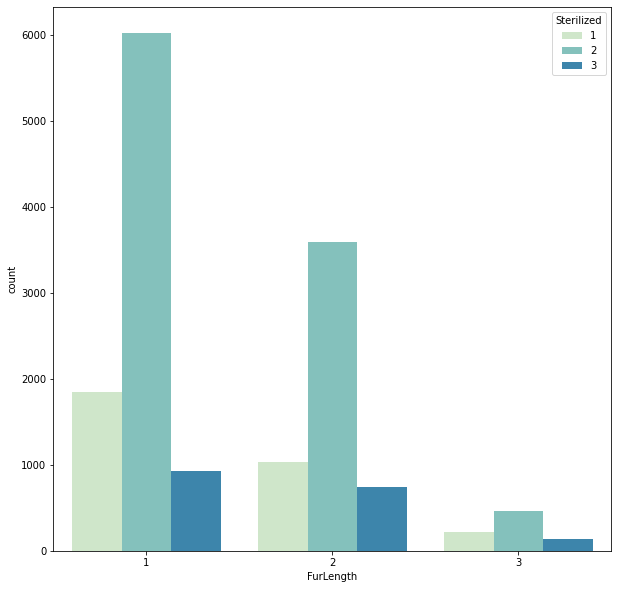

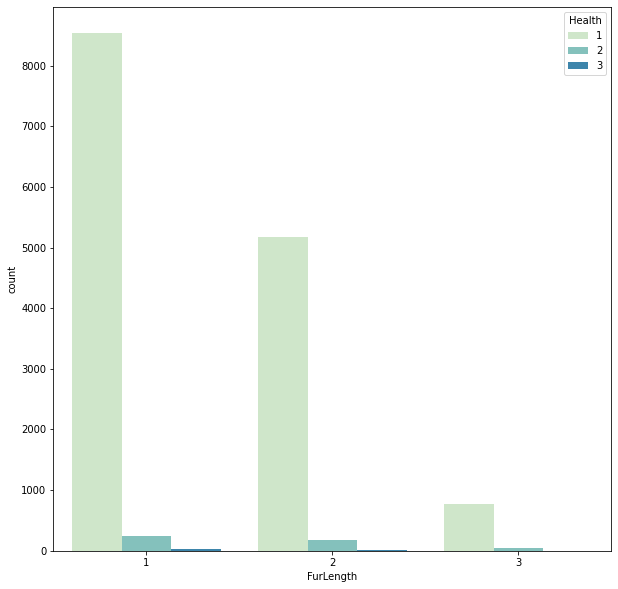

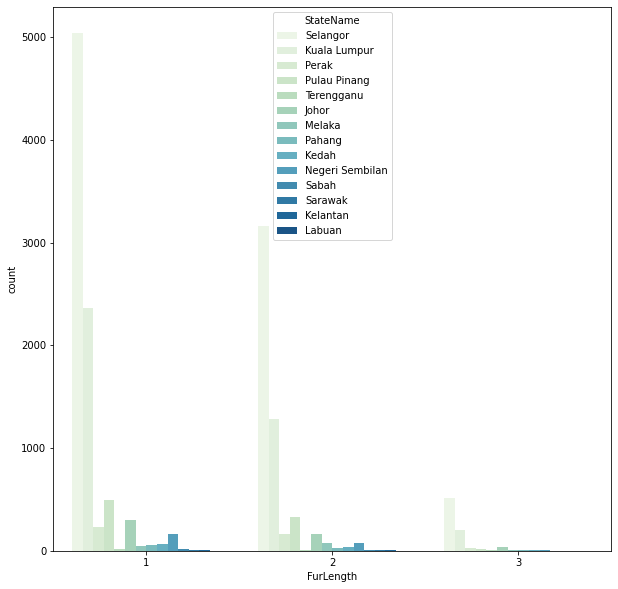

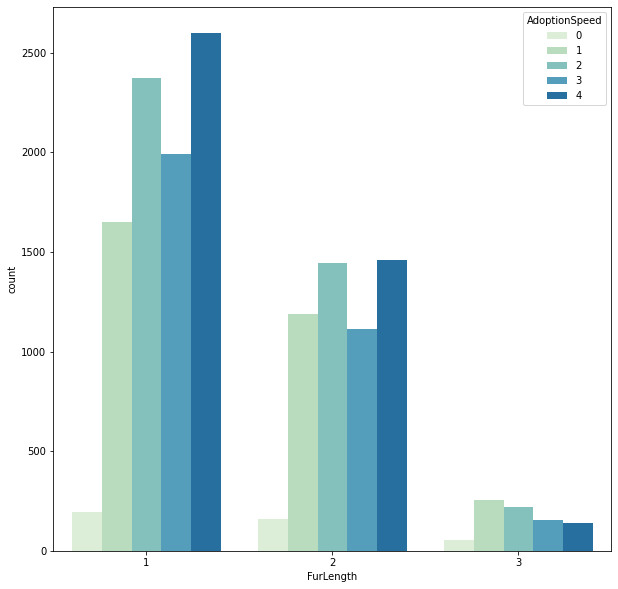

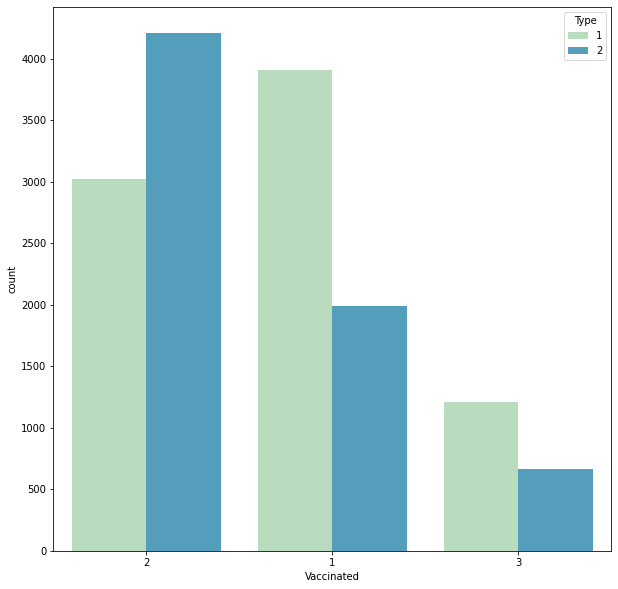

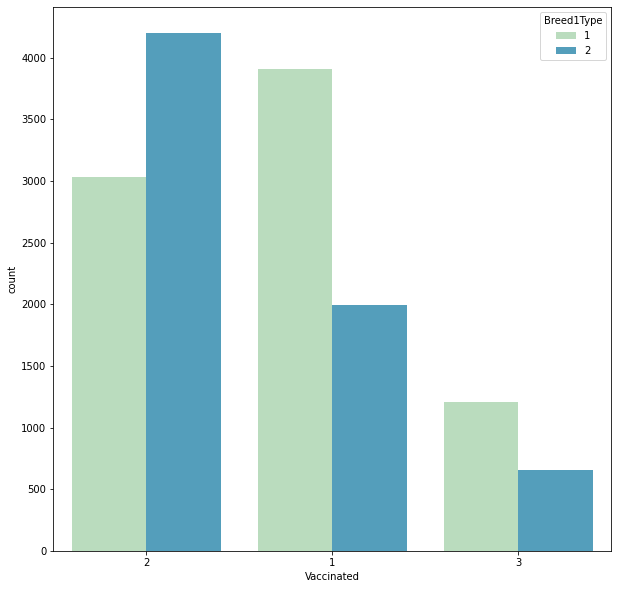

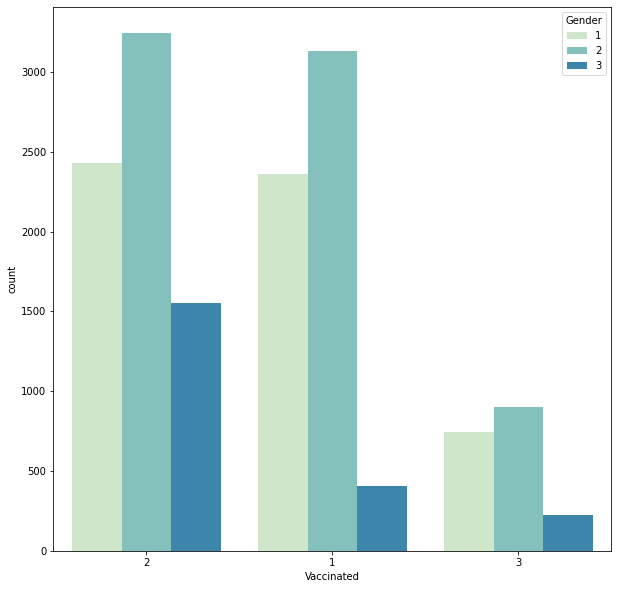

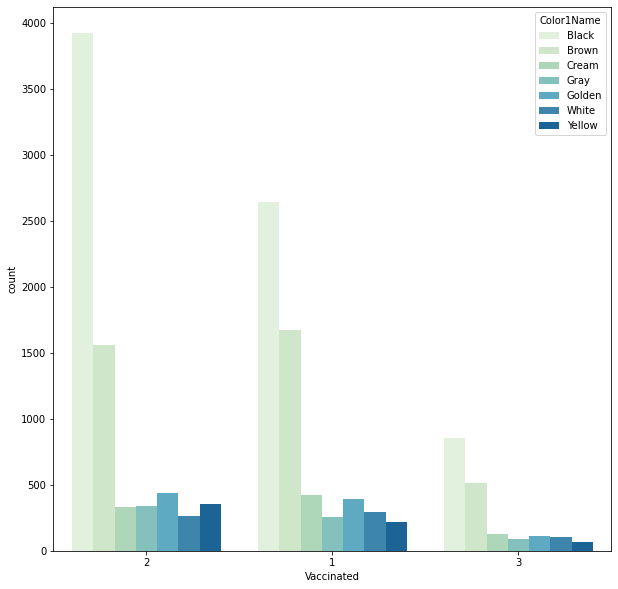

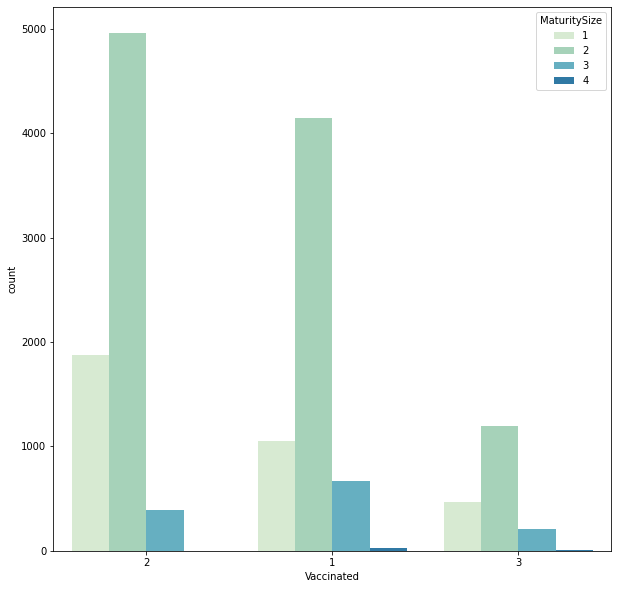

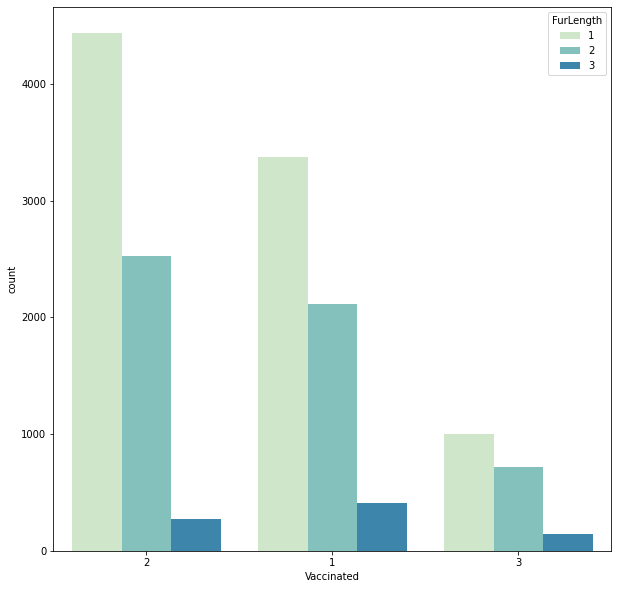

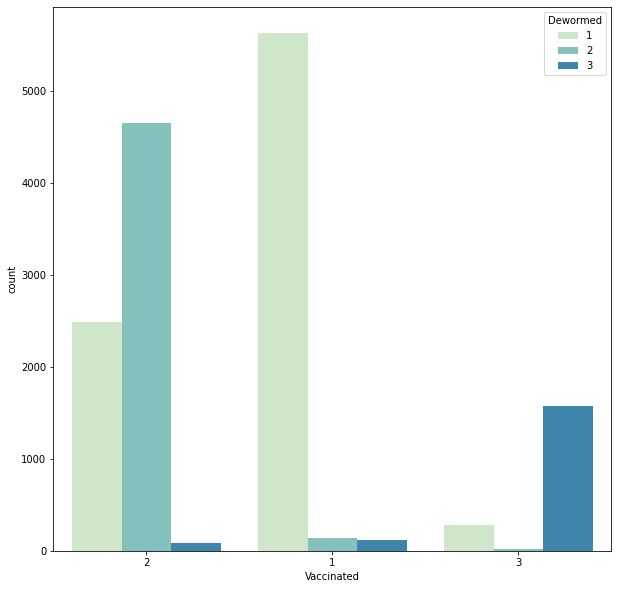

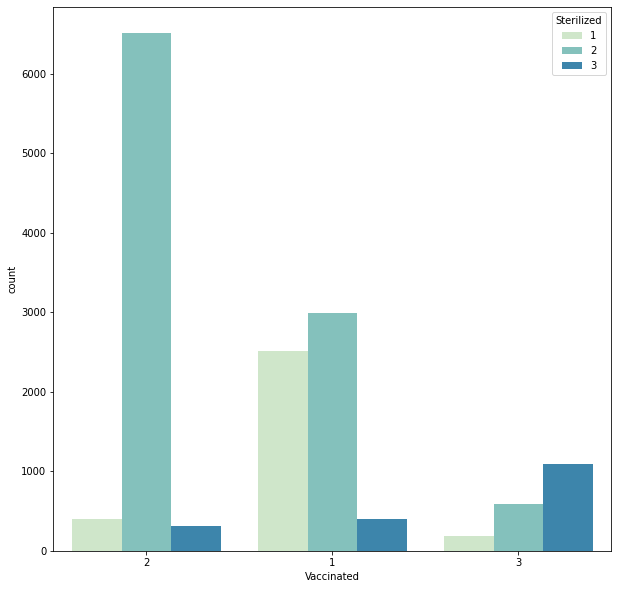

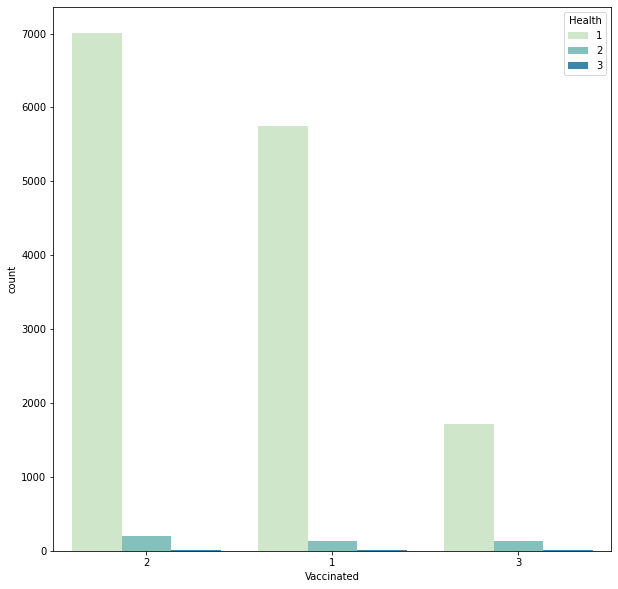

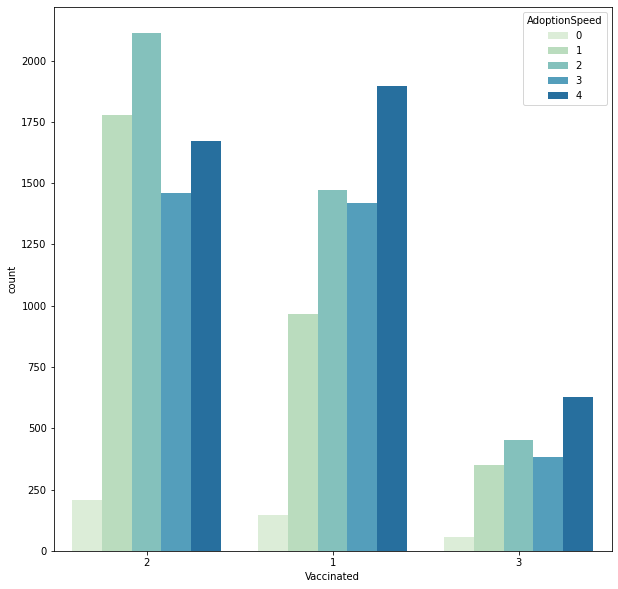

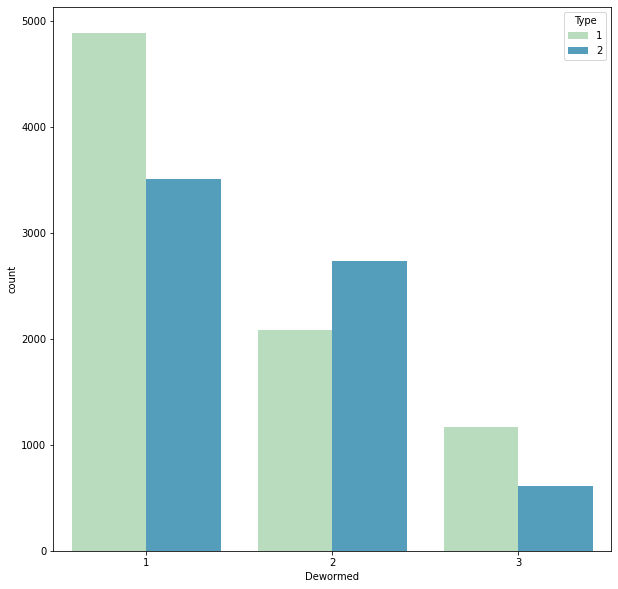

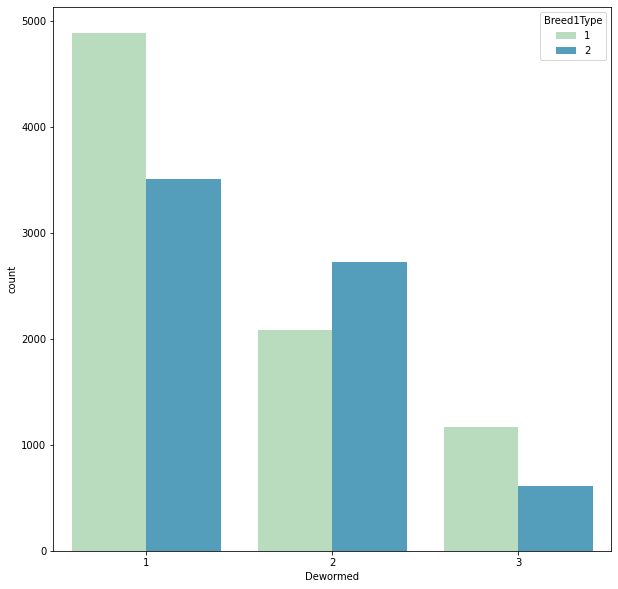

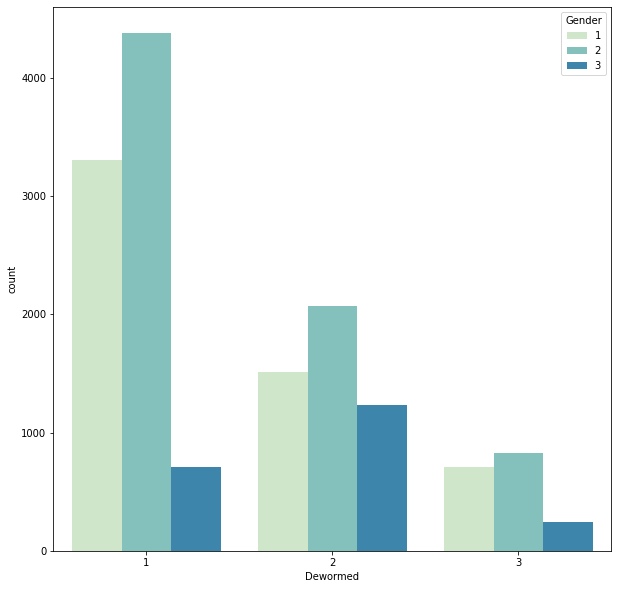

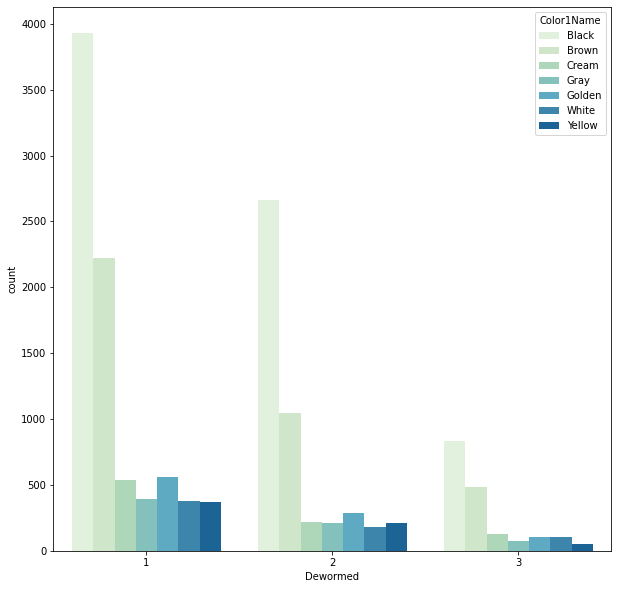

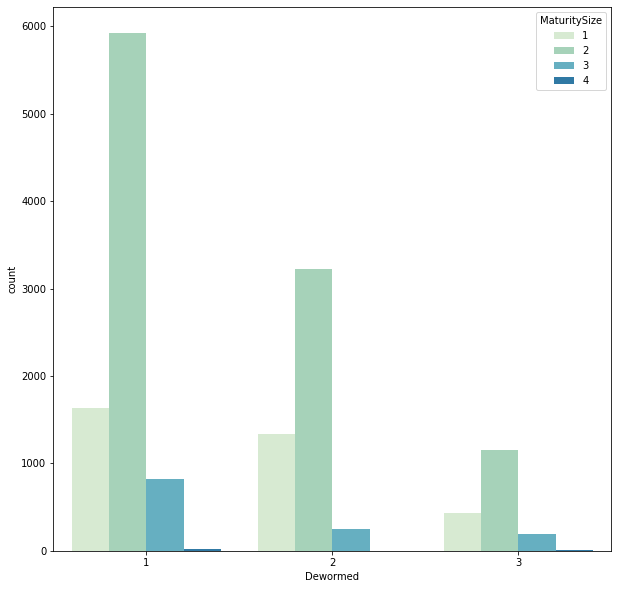

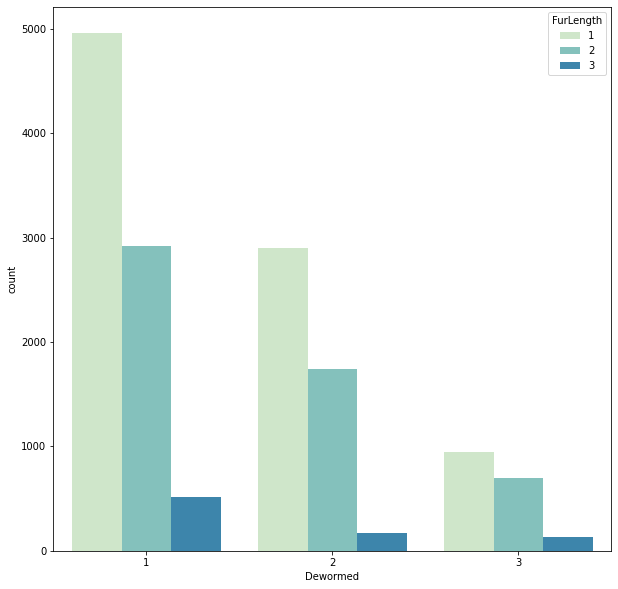

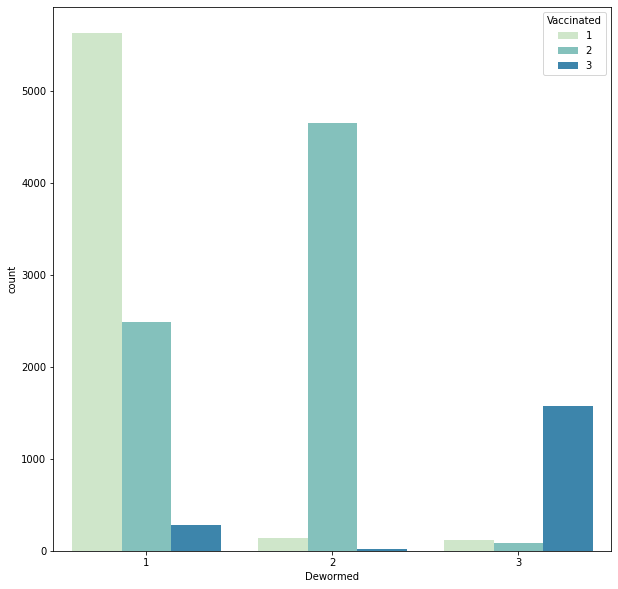

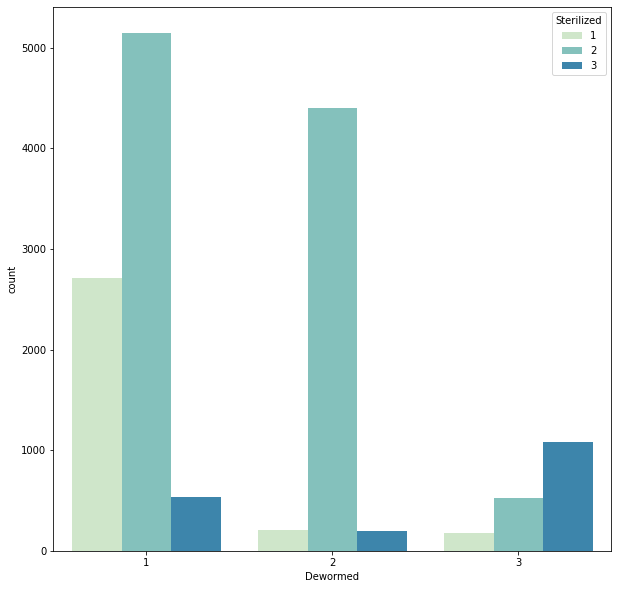

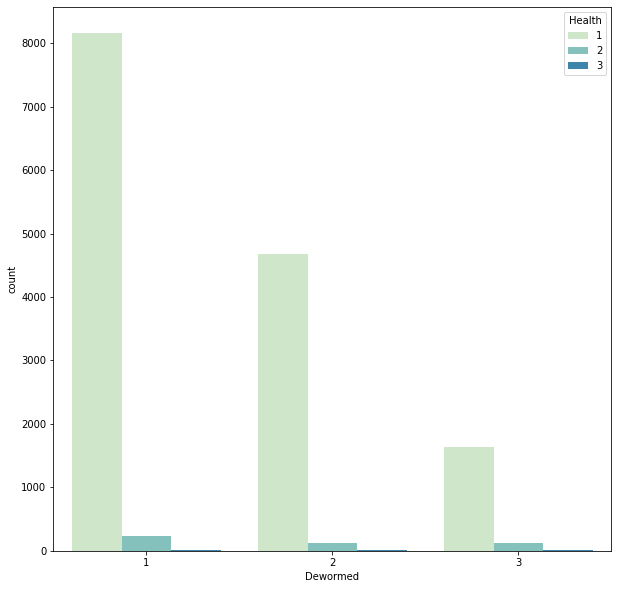

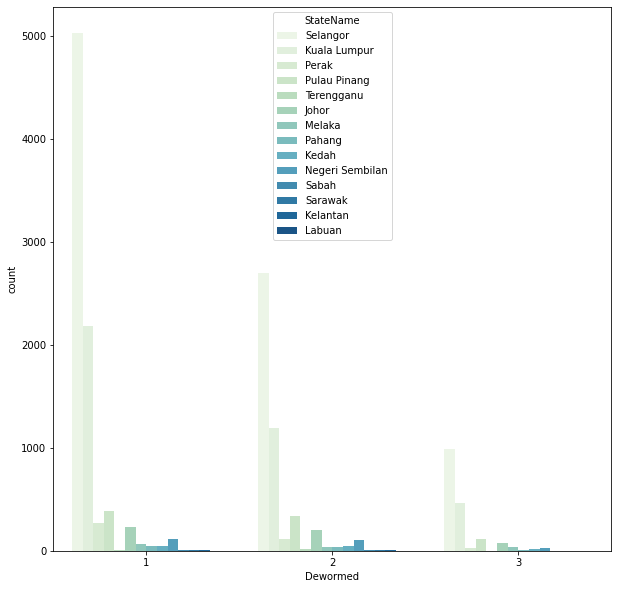

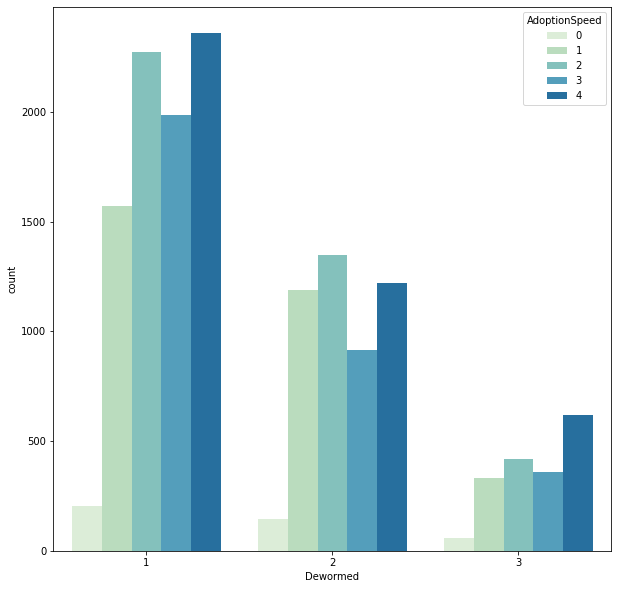

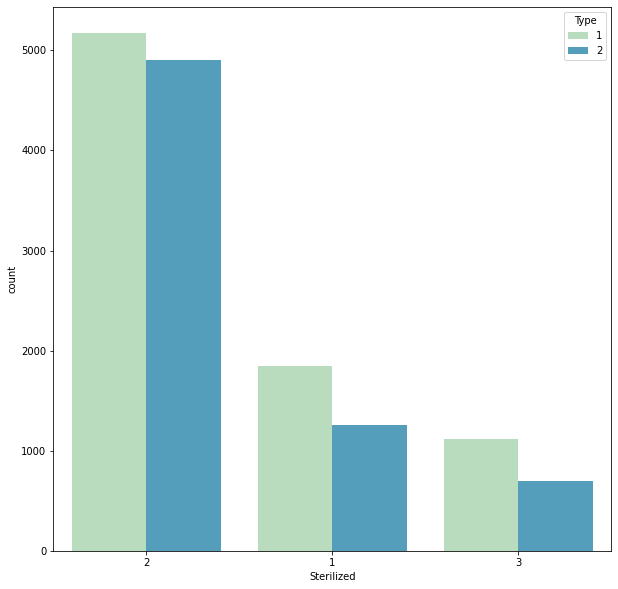

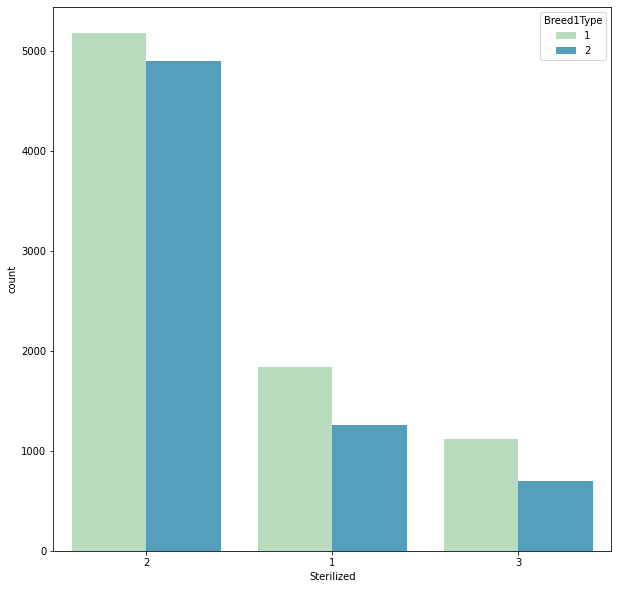

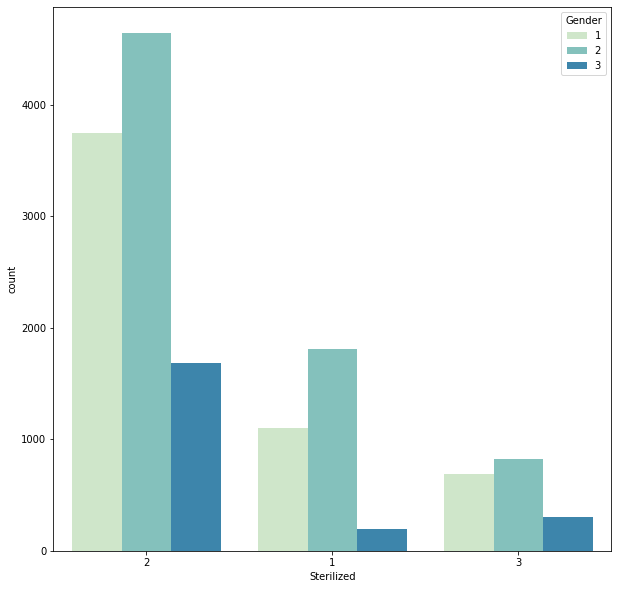

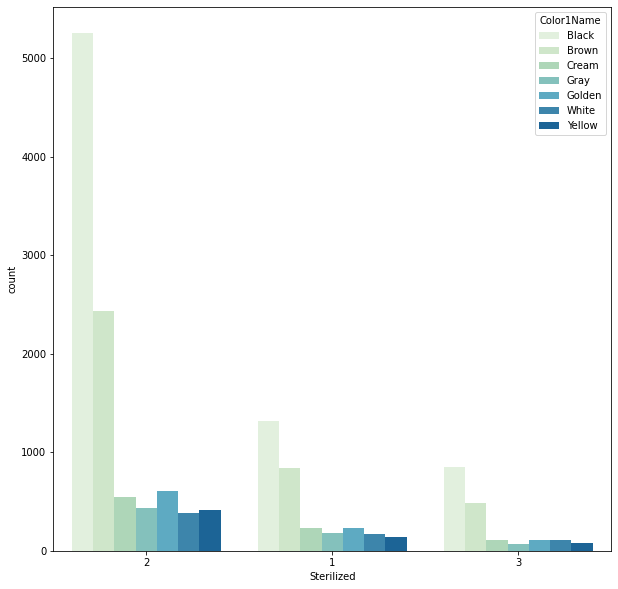

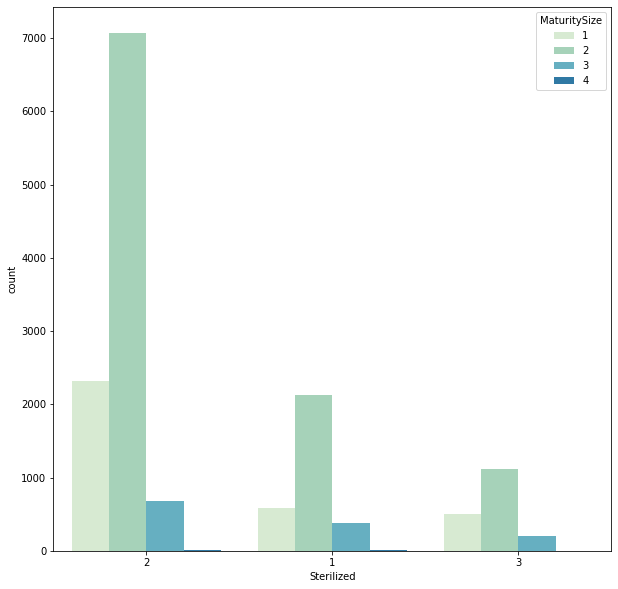

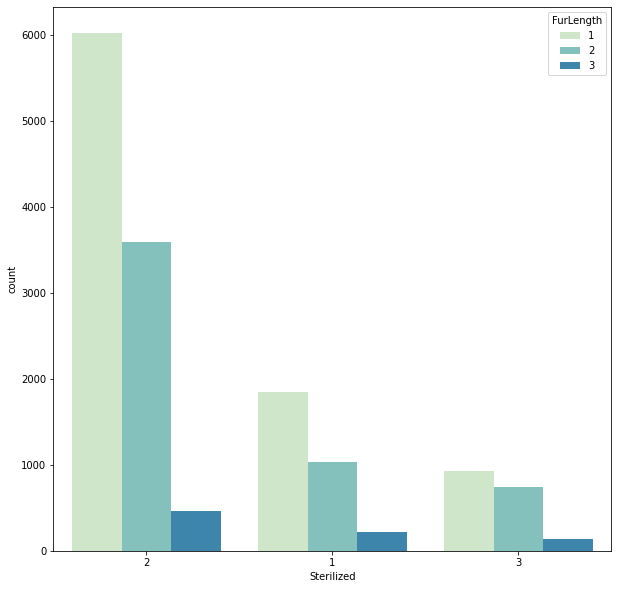

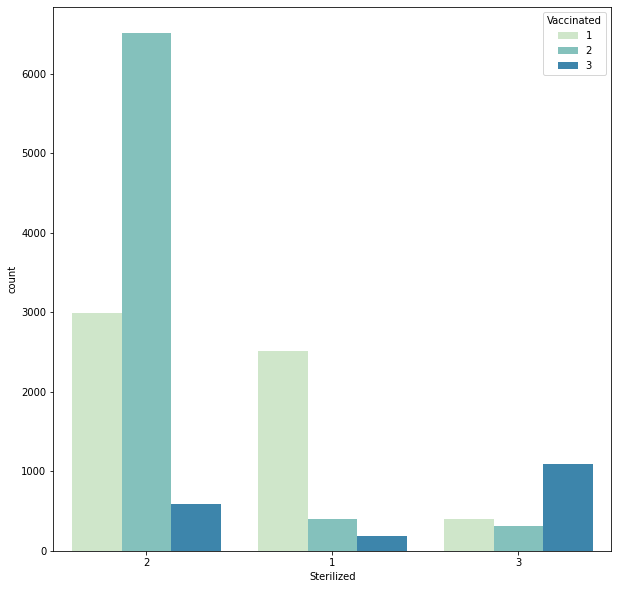

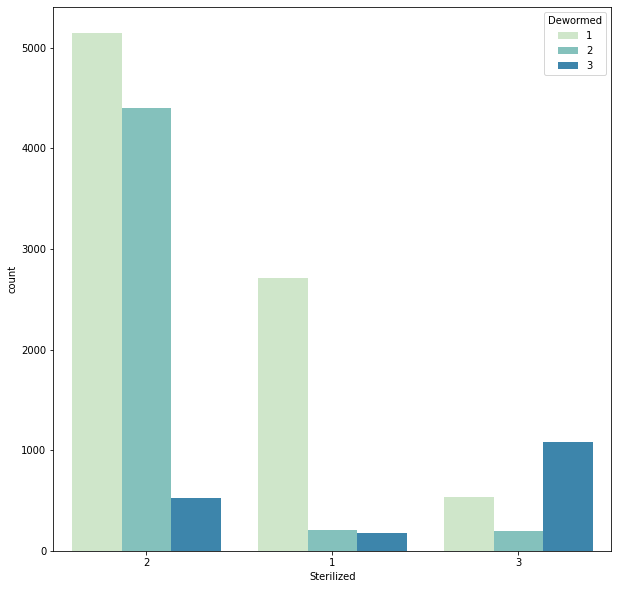

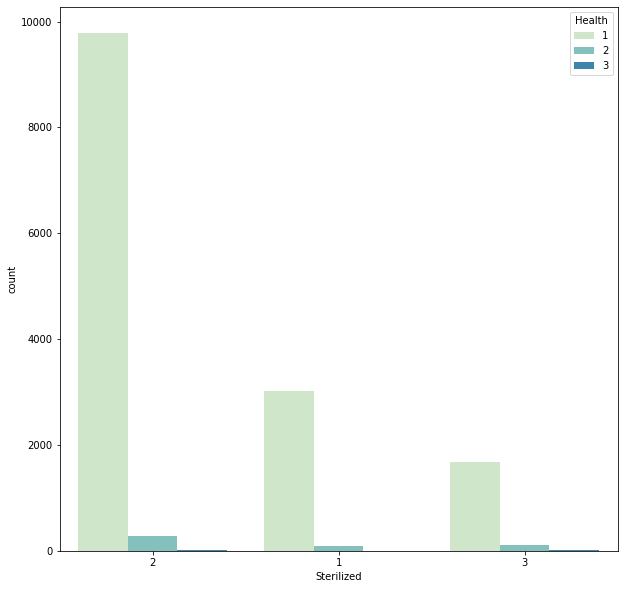

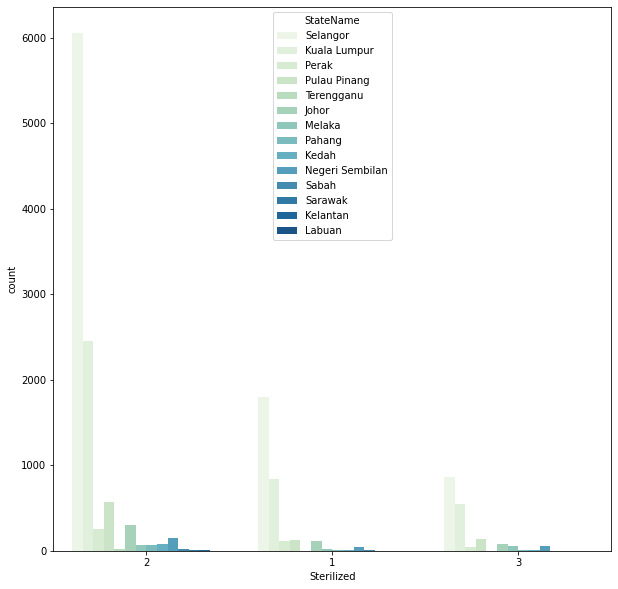

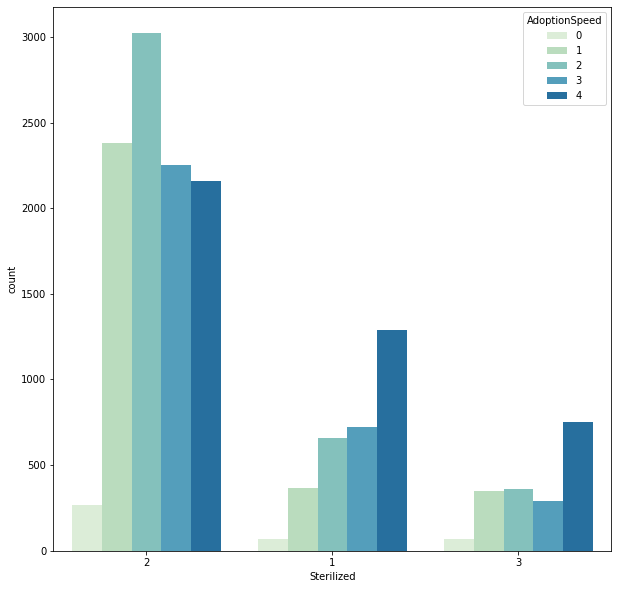

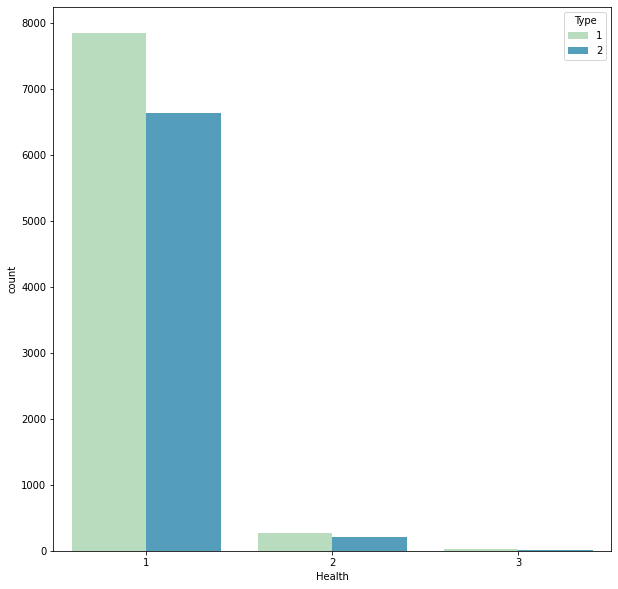

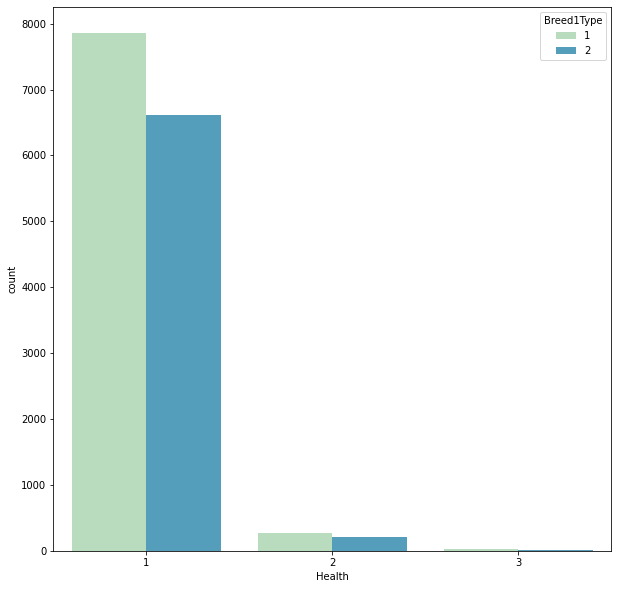

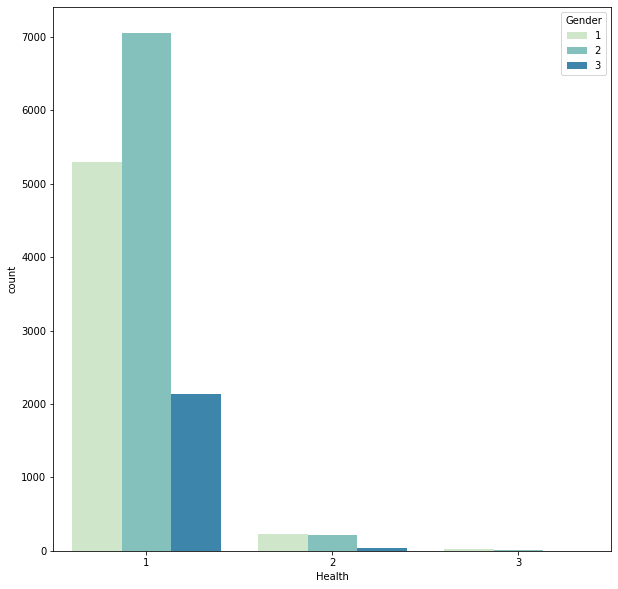

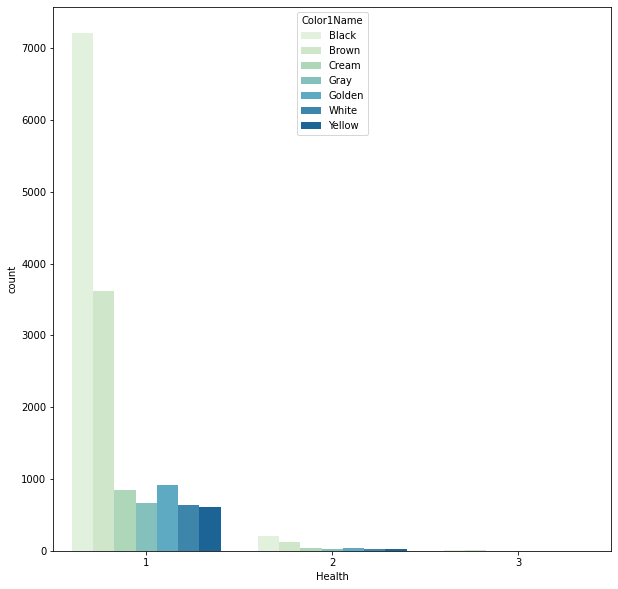

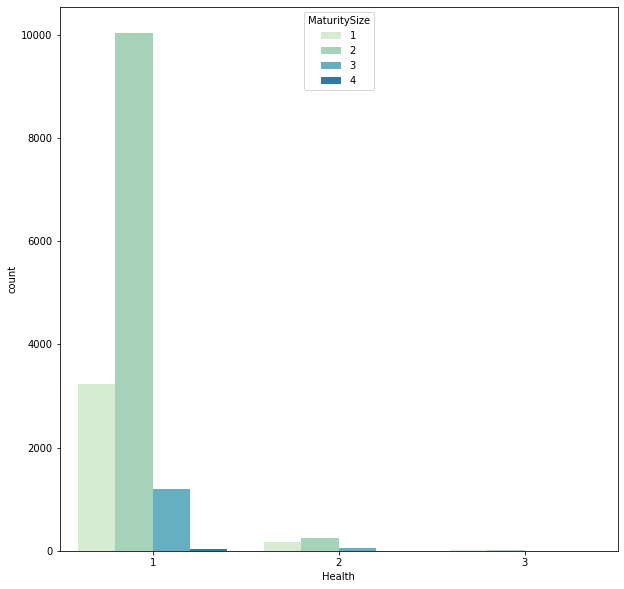

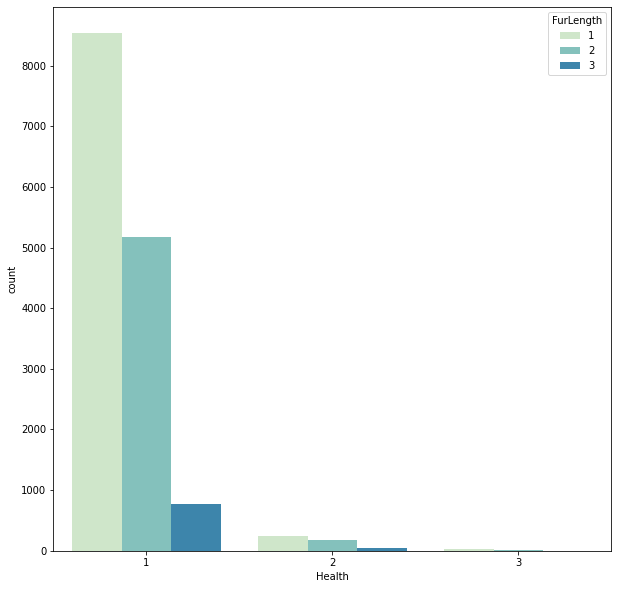

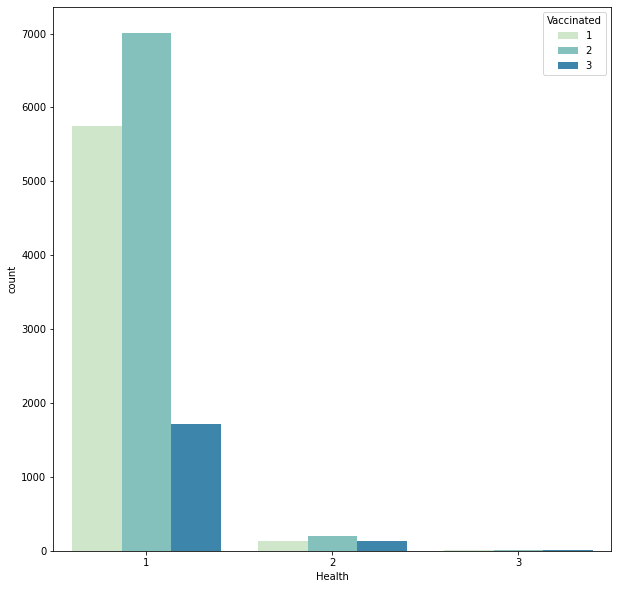

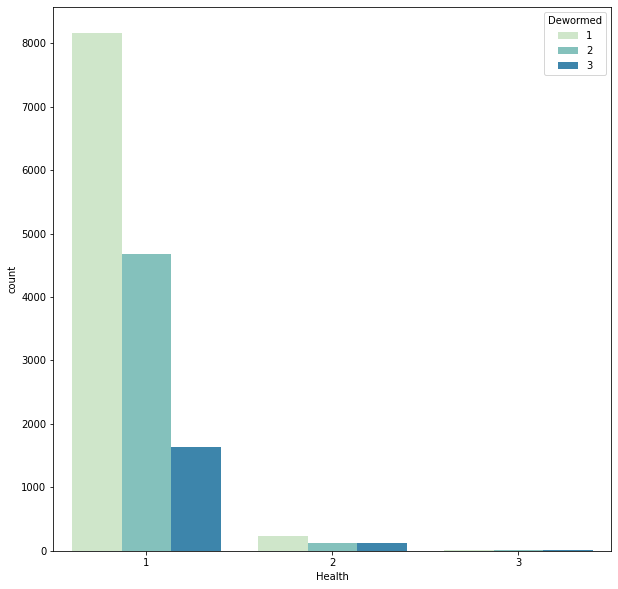

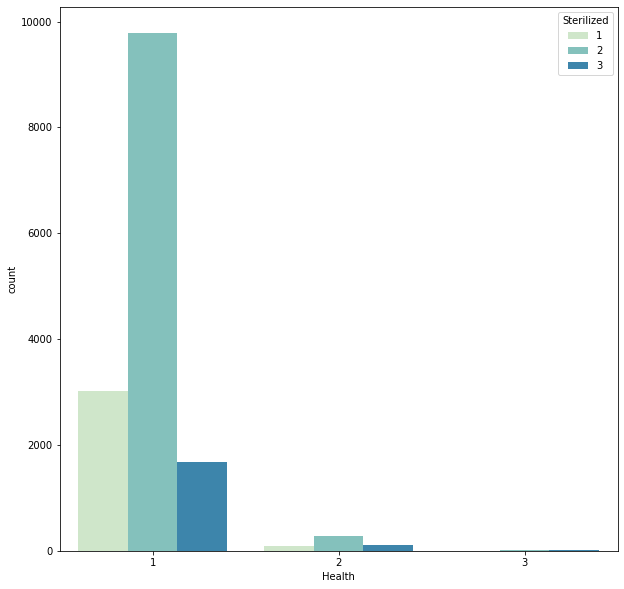

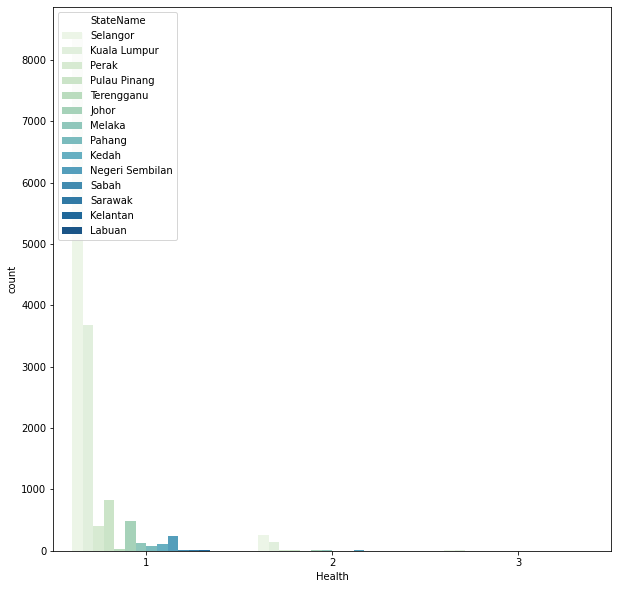

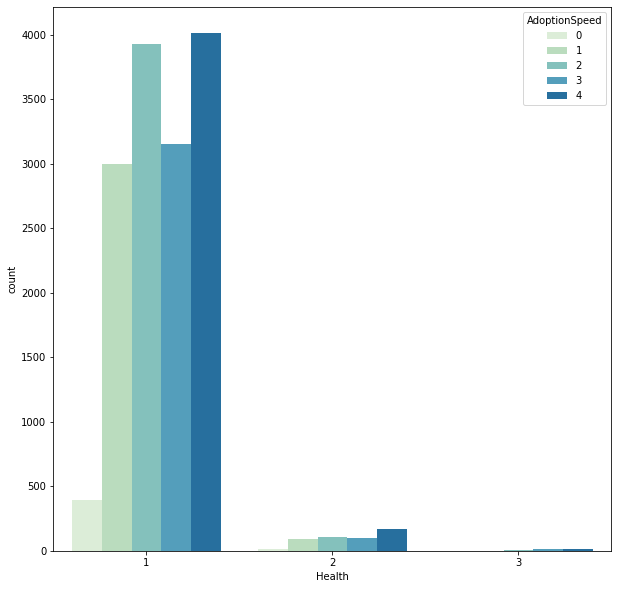

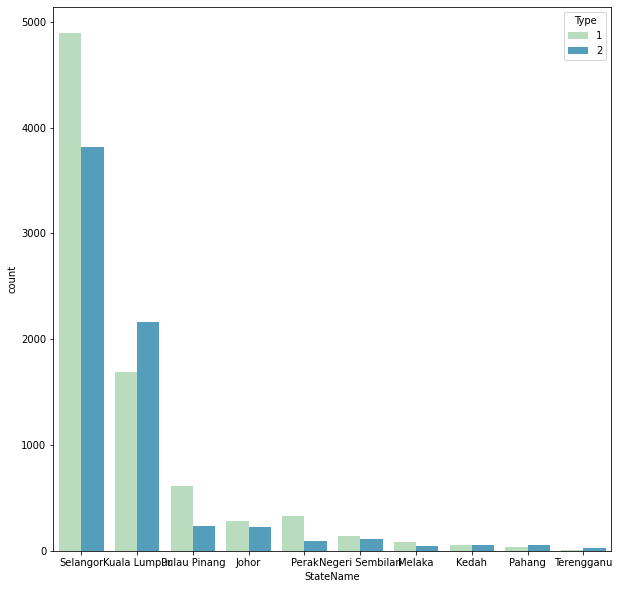

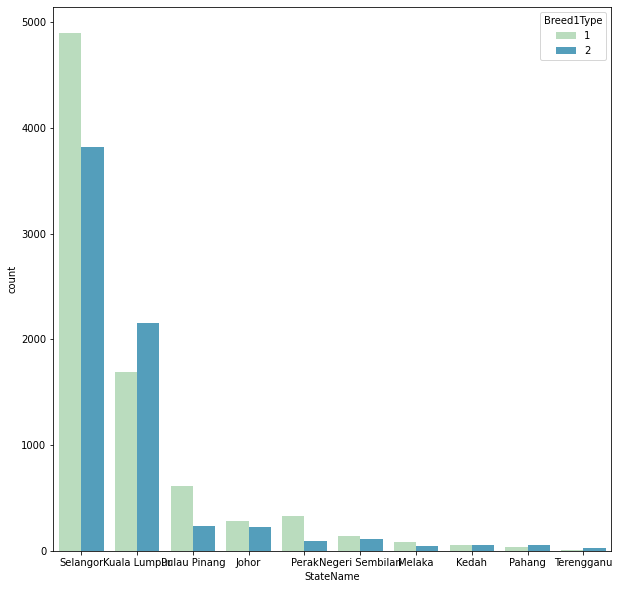

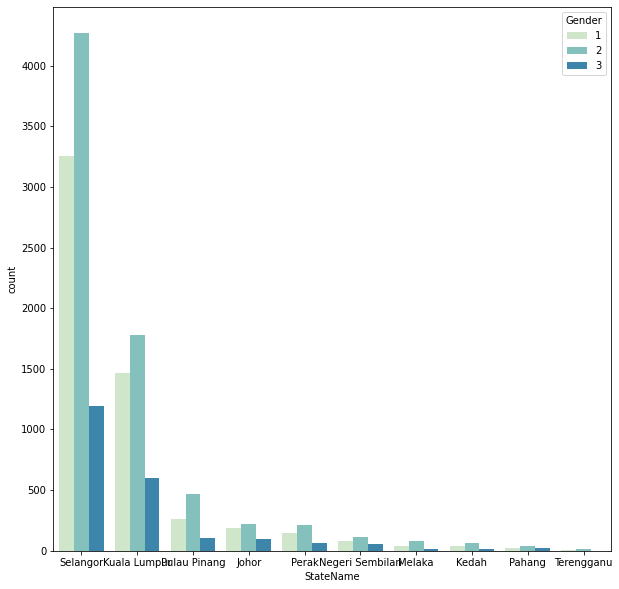

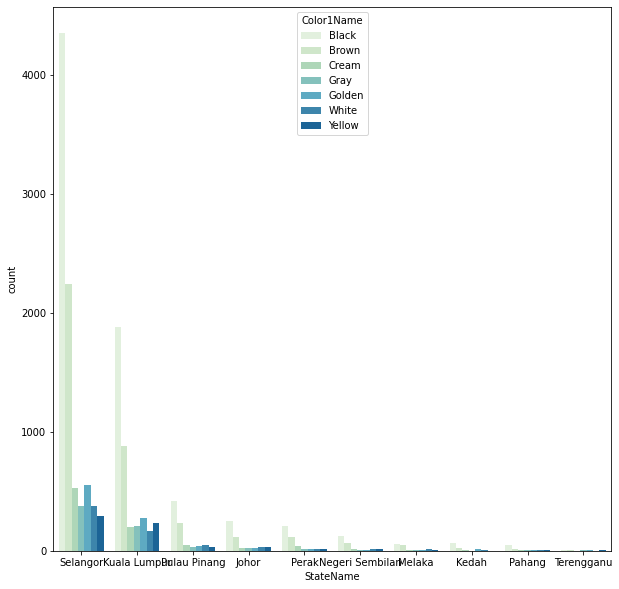

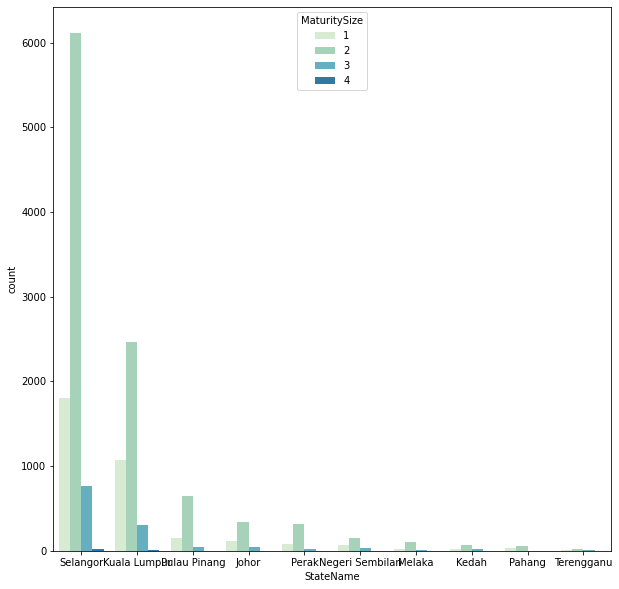

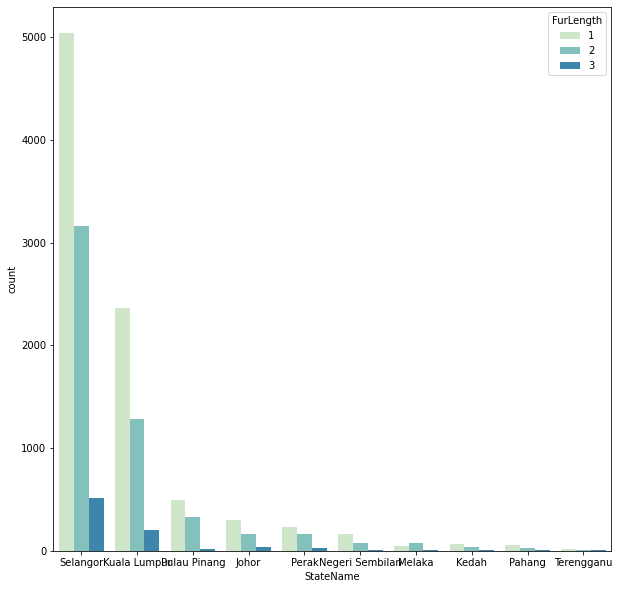

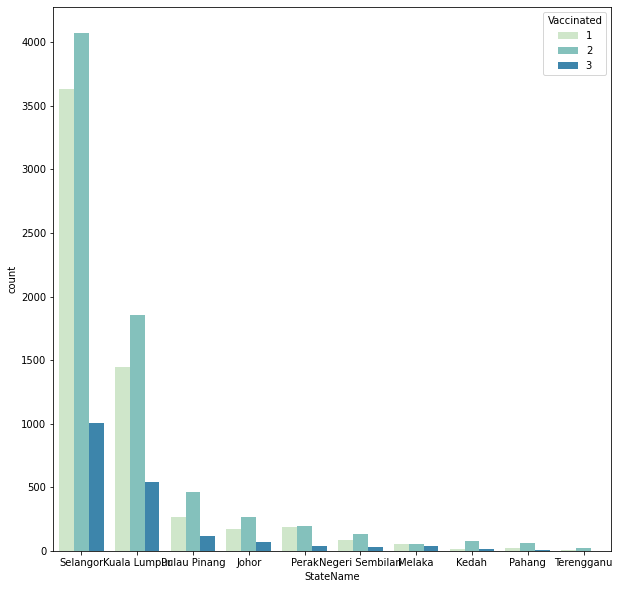

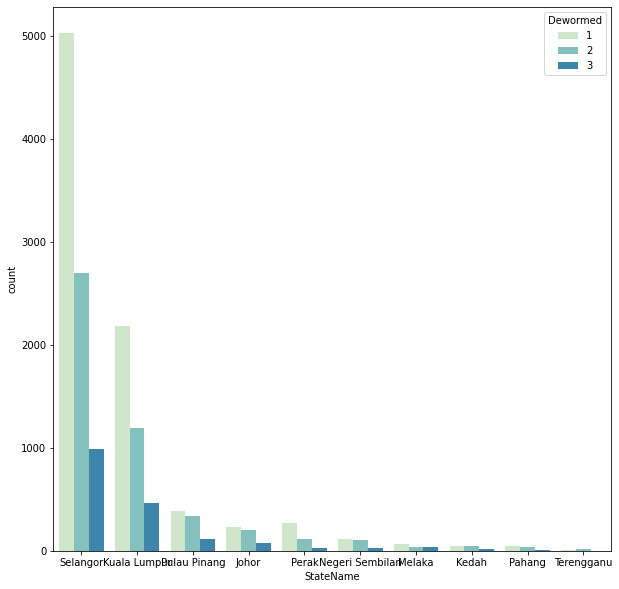

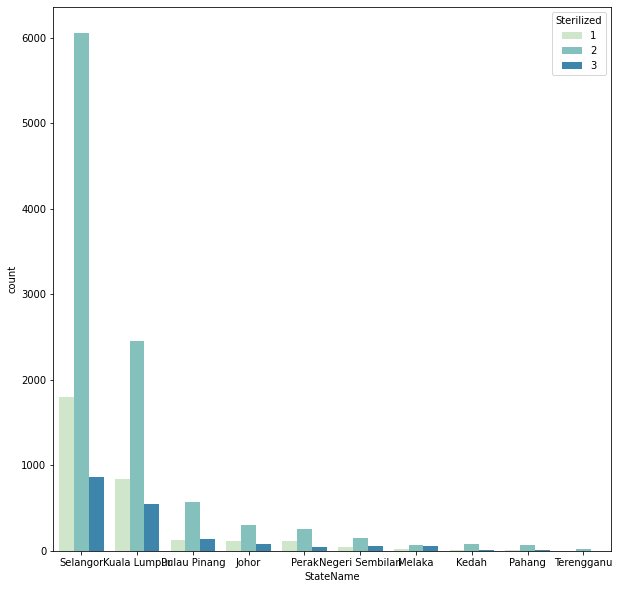

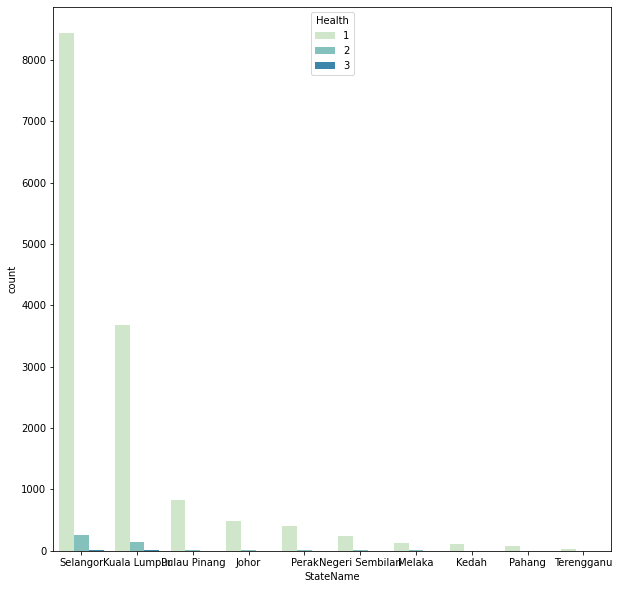

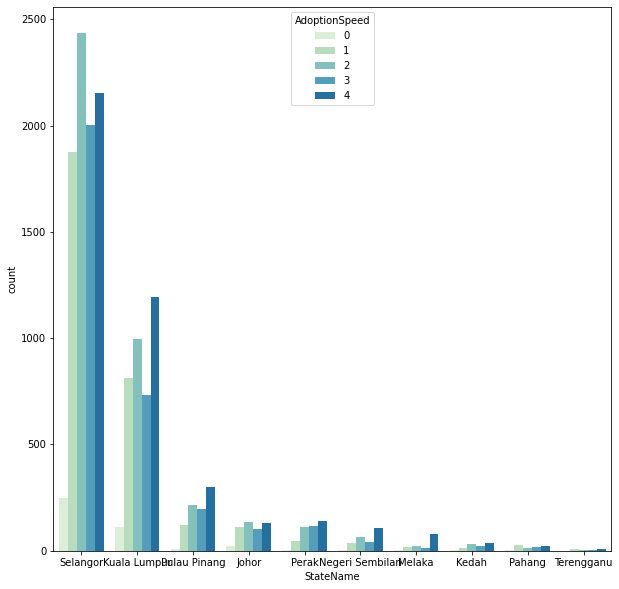

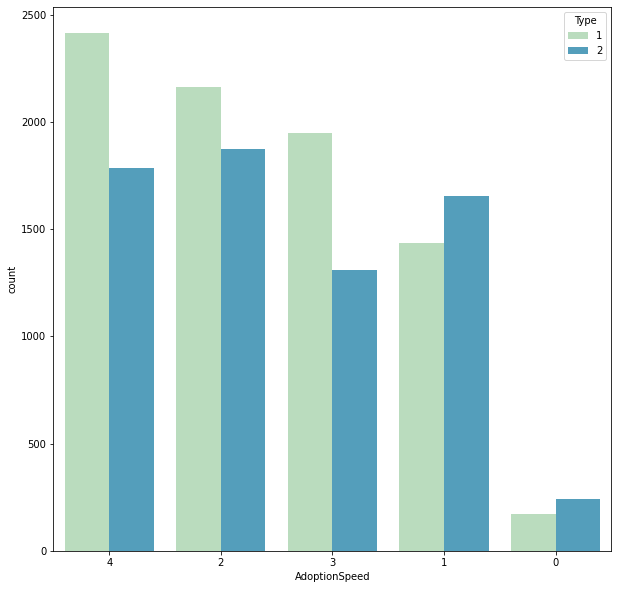

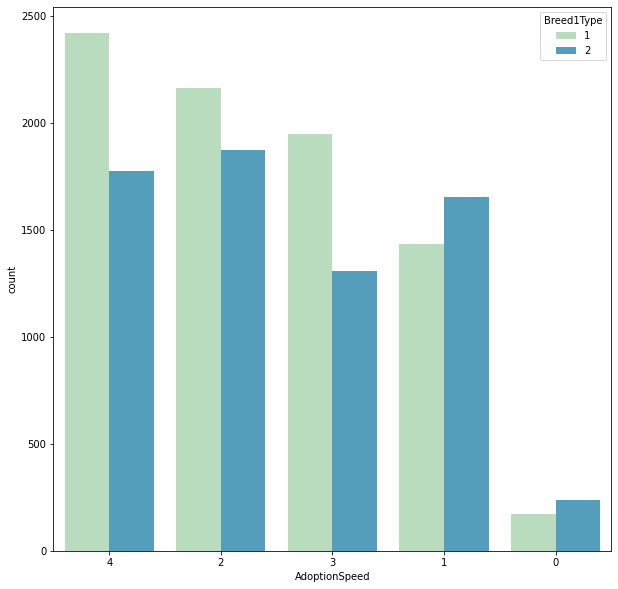

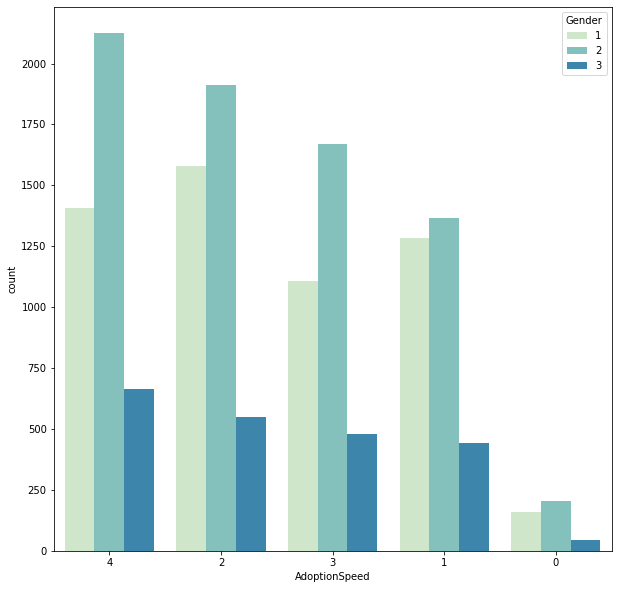

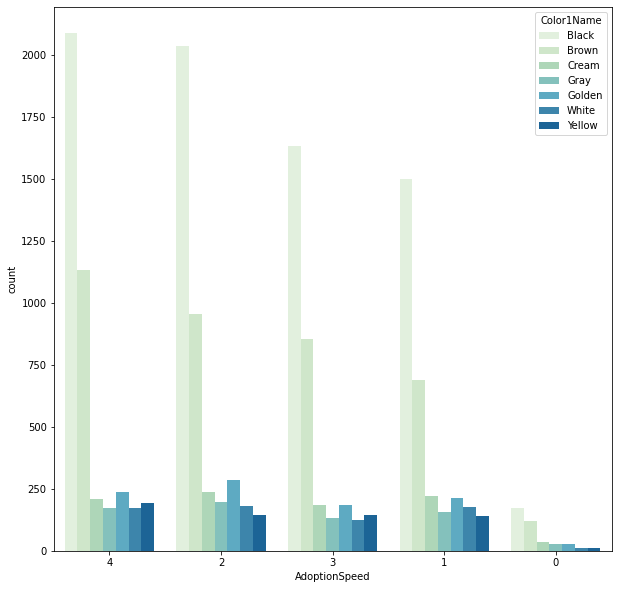

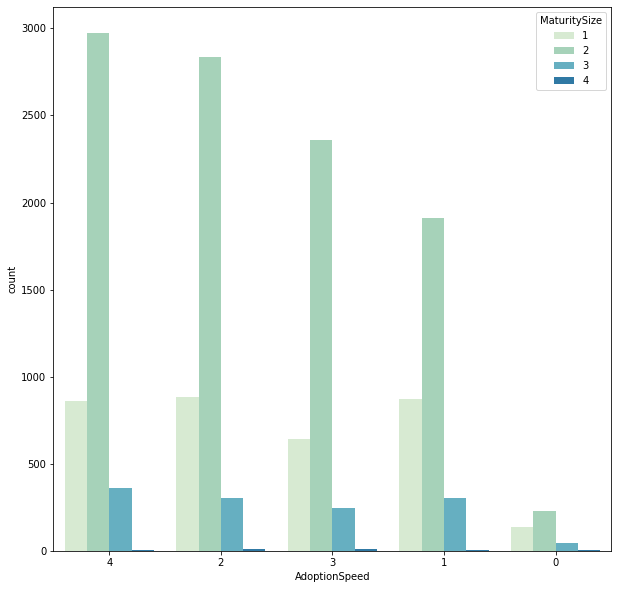

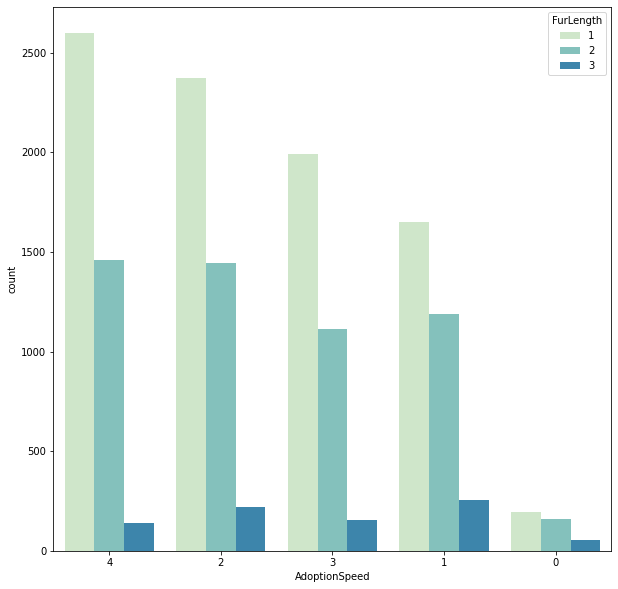

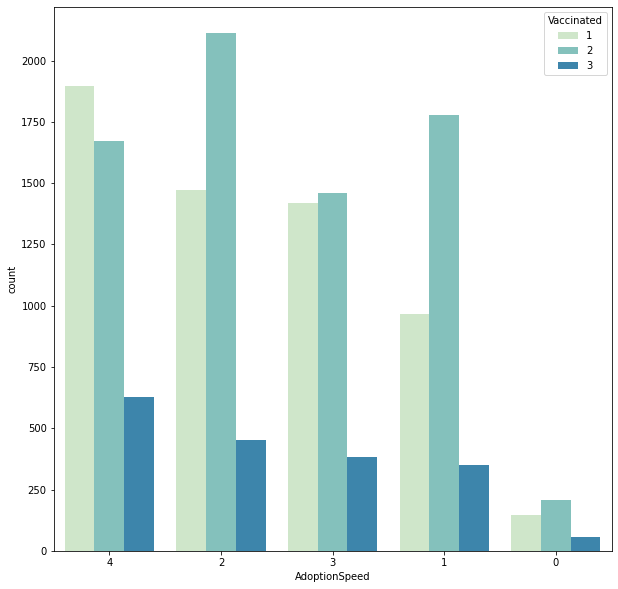

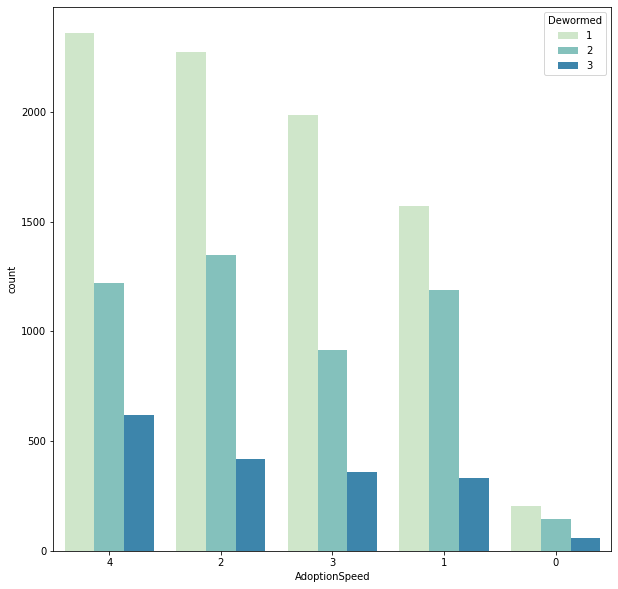

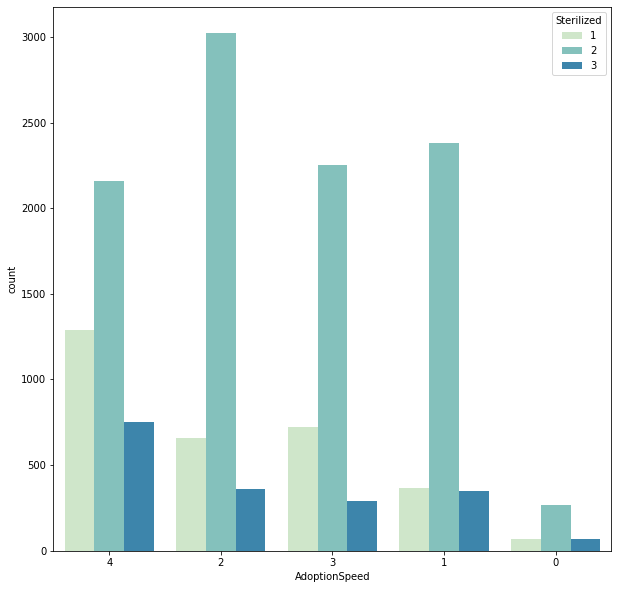

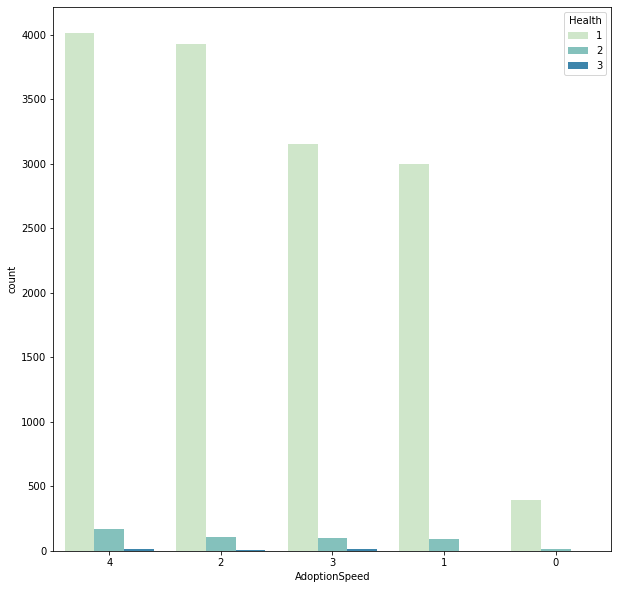

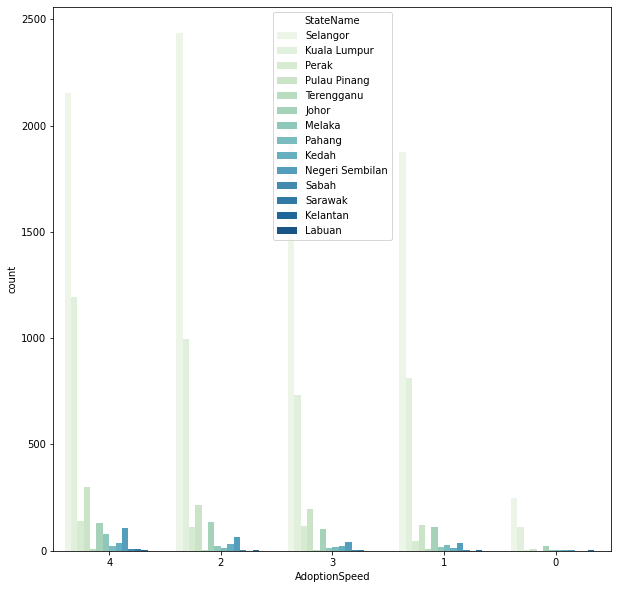

In [ ]:
plt.rcParams.update({'figure.max_open_warning': 0})

for i in range(len(categorical_variables)):
  primary_variable = categorical_variables[i]
  for j in range(len(categorical_variables)):
    secondary_variable = categorical_variables[j]
    if secondary_variable != primary_variable and secondary_variable != 'Breed1Name':
      plt.figure(figsize = (10, 10))
      chart = sns.countplot(
          data = pets_df,
          x = primary_variable,
          hue = secondary_variable,
          palette = 'GnBu',
          order = pets_df[primary_variable].value_counts().iloc[:10].index  # show only top10
      )

# TODO: select only top10 or top5 breeds because it's too many to plot in a chart

### Conclusions and Insights
**How to analyze the plots?**

Within one grouped bar chart, if the frequency distribution always follows the same pattern across different groups, it suggests that there is no dependency between the primary and secondary category. However, if the distribution is different then it indicates that it is likely that there is a dependency between two variables. [put reference here]

Since we have 13 Categorical variables, we generated 12*13 = 156 plots (12 plots for each variable) with combinations of all those variables. We are not going to go through each plot, but we will just summarize the interesting insights overall. 

**Insights:**
*	TYPE
  *	Type and breed1Type match almost 100%. Maybe we should investigate the cases where the type is different from the breedType.
  *	Some colors are more likely to happen in cats than in dogs and vice-versa
  *	Dogs are more vaccinated than cats
*	BREED1TYPE
  *	The same insights from TYPE apply to BREED1TYPE
*	BREED1NAME
  *	As expected, some breeds are more common for dogs and some others for cats. 
  *	Also, as expected, the fur length changes according to the breed.
  *	The plot suggests that the vaccination pattern is different depending on the breed. Some breeds have a more balanced number of vaccinated and non-vaccinated animals, some others have more vaccinated animals and some have more non-vaccinated animals.
  *	The plots suggest that the adoption speed slightly changes according to the breed.
*	GENDER
  *	Regarding gender, all the other variables are very well distributed for both genders. No remarkable observations.
*	COLOR1NAME
  *	Some colors are more likely to happen in cats than in dogs and vice-versa
  *	The Golden color seems to happen more in males than in females
  *	Some colors are more likely to happen in some breeds than in others
*	MATURITYSIZE
  *	The plot suggests that medium size is more common for cats than for dogs.
  *	Males happen to appear slightly more in large sizes than females.
  *	Large animals are more vaccinated than in general.
*	FUR LENGTH
  *	No new considerations
*	VACCINATED
  *	Dogs are more vaccinated than cats
  *	Animals that are vaccinated are more likely to be dewormed, animals not vaccinated are less likely to be dewormed and animals that we don’t know for sure that are vaccinated are more likely to not be surely dewormed.
  *	For STERIALIZED, there are less sterilized animals (than sterilized ones) regardless they’re being vaccinated or not. However, for not vaccinated animals, it is way more common to have the animal not sterilized than for vaccinated ones.
*	DEWORMED
  *	Dogs are more dewormed than cats
  *	Animals that are vaccinated are more likely to be dewormed, animals not vaccinated are less likely to be dewormed and animals that we don’t know for sure that are vaccinated are more likely to not be surely dewormed.
  *	For STERIALIZED, there are less sterilized animals (than sterilized ones) regardless they’re being dewormed or not. However, for not dewormed animals, it is way more common to have the animal not sterilized than for dewormed ones.
*	STERILIZED
  *	Animals not sterilized are more likely to not be vaccinated as well and the other way around.
  *	It’s more common to have not dewormed animals among not sterilized animals.
*	HEALTH
  *	Unhealthy pets are less likely to be adopted right away. 
*	STATE NAME
  *	Cats are more common in Kuala Lumpur than in the rest of the states.
*	ADOPTION SPEED
  *	The plot suggests that cats are adopted faster than dogs.
  *	Vaccinated animals are slightly more likely to not be adopted after 100 days after being listed.


### Categorical vs. Numerical

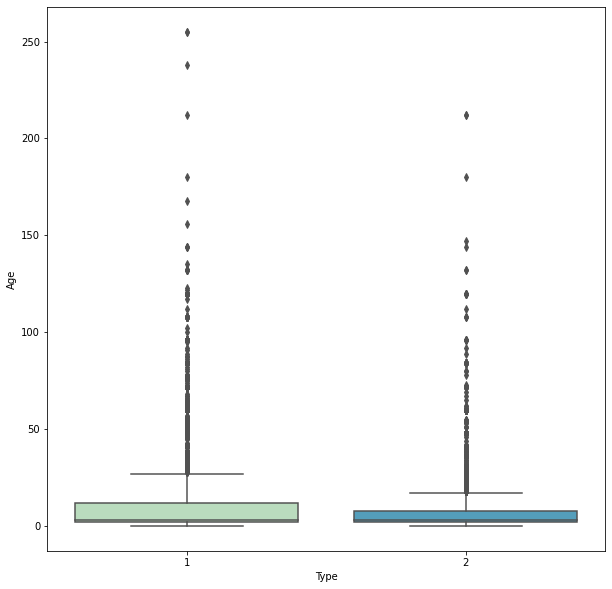

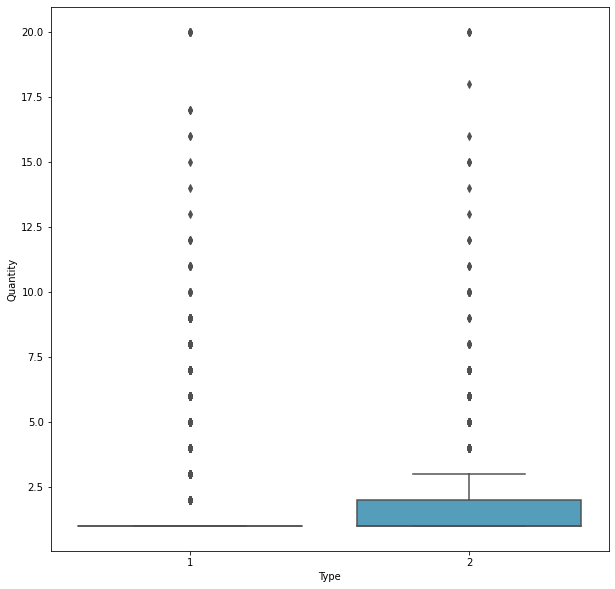

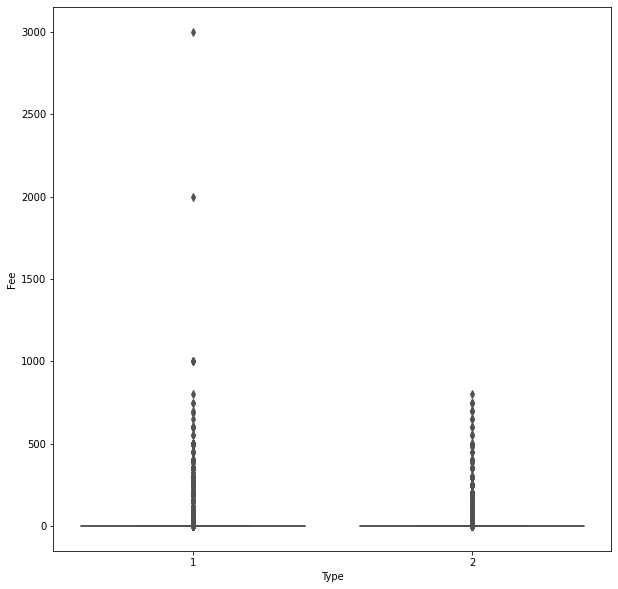

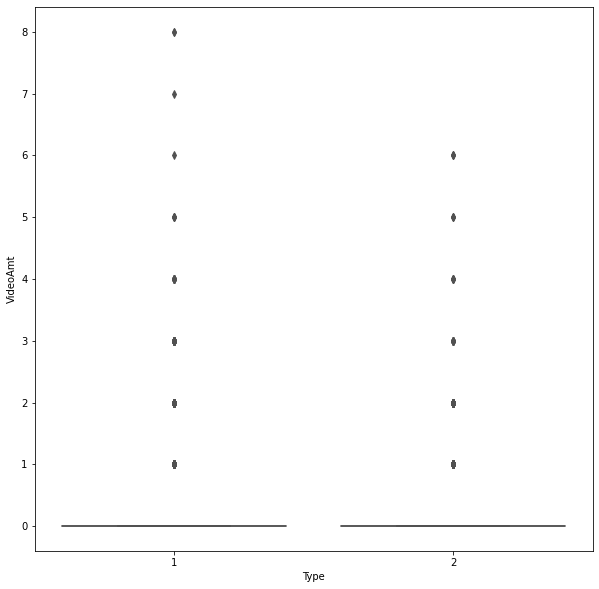

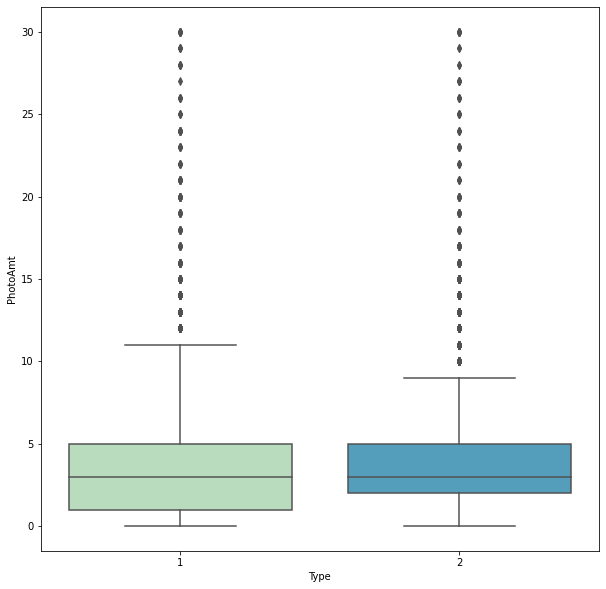

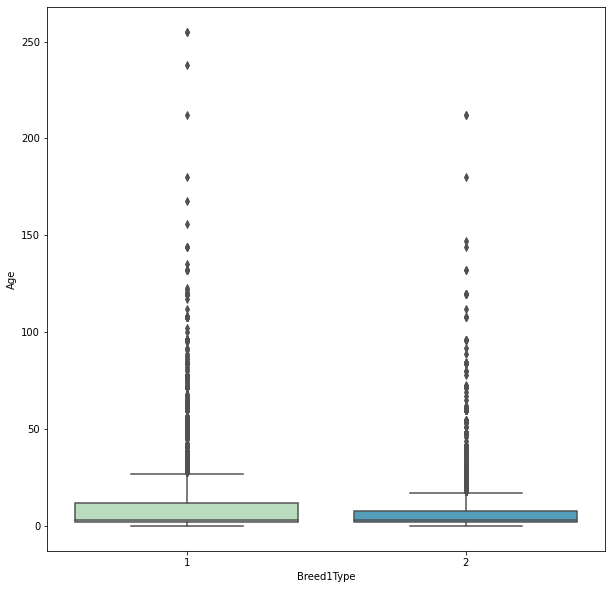

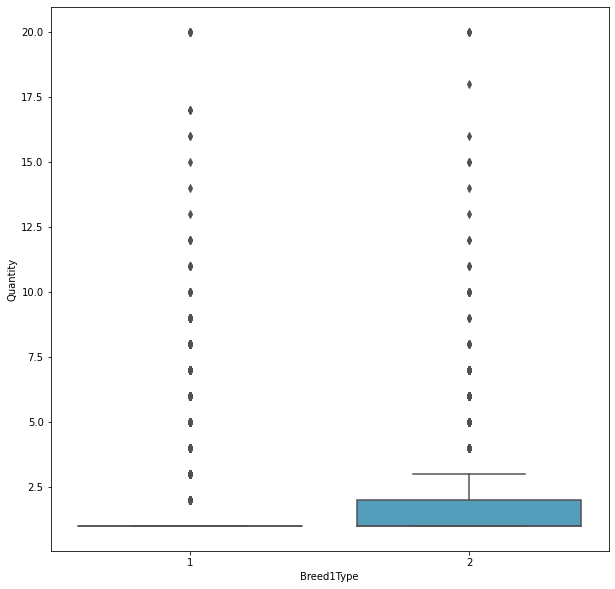

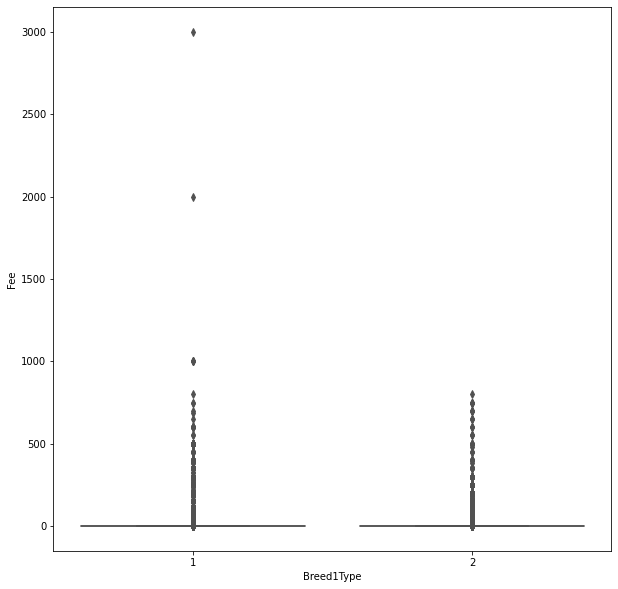

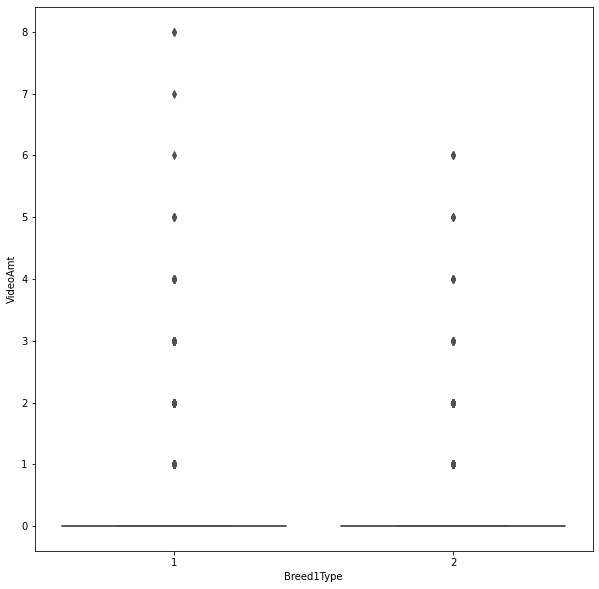

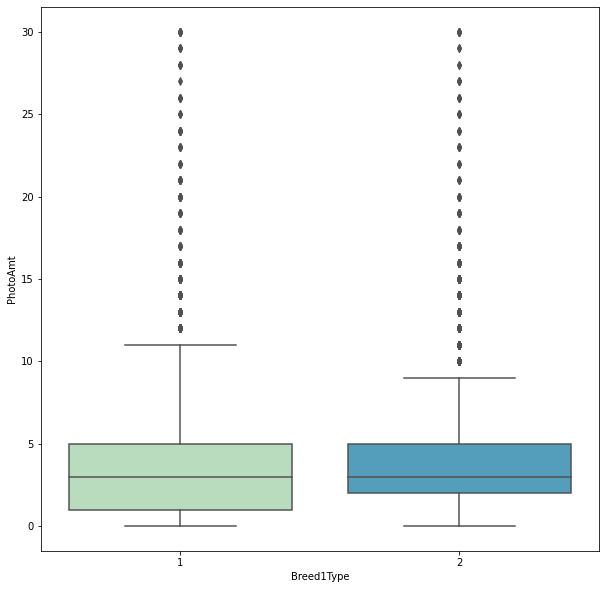

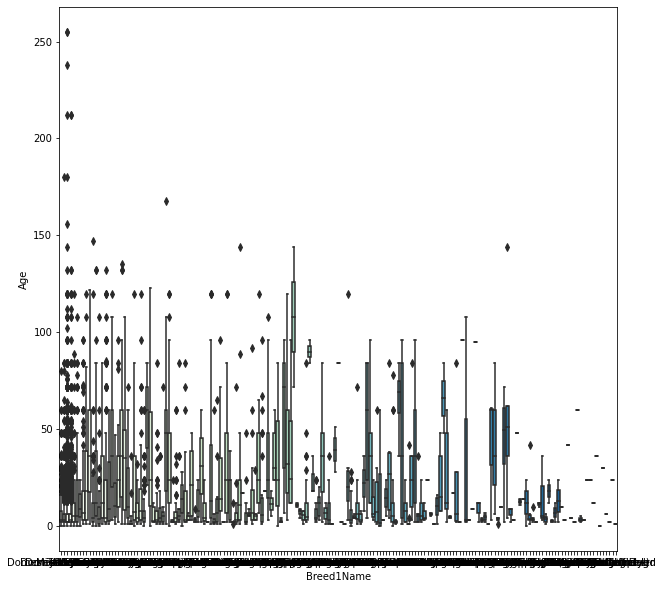

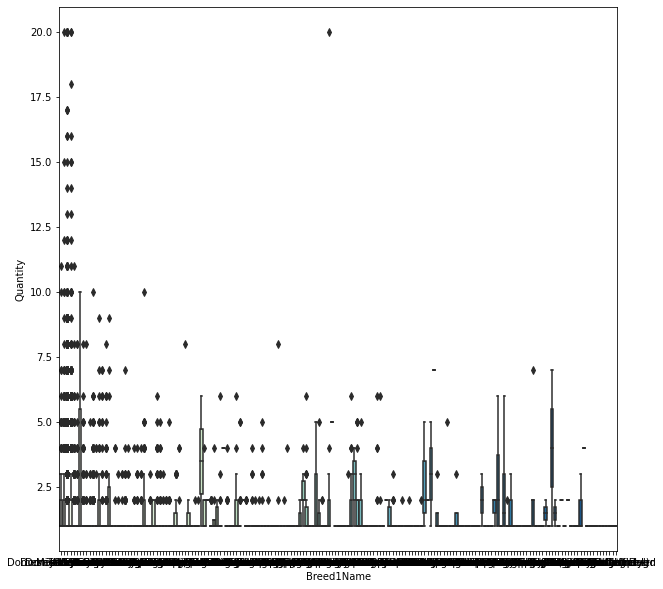

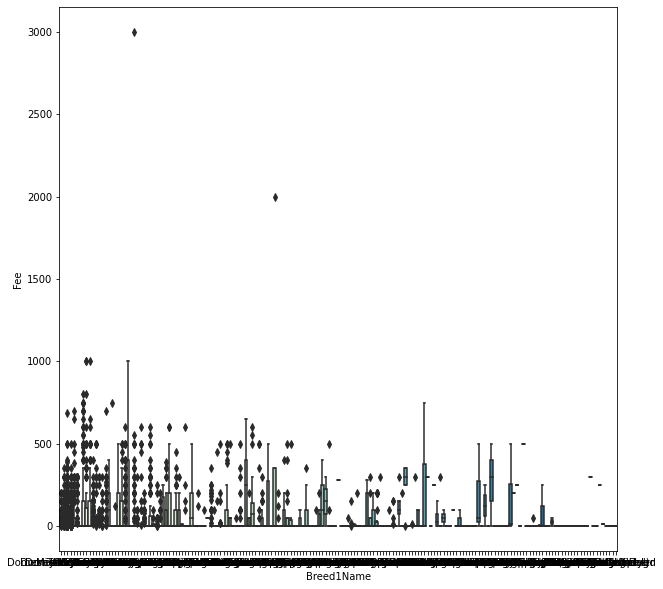

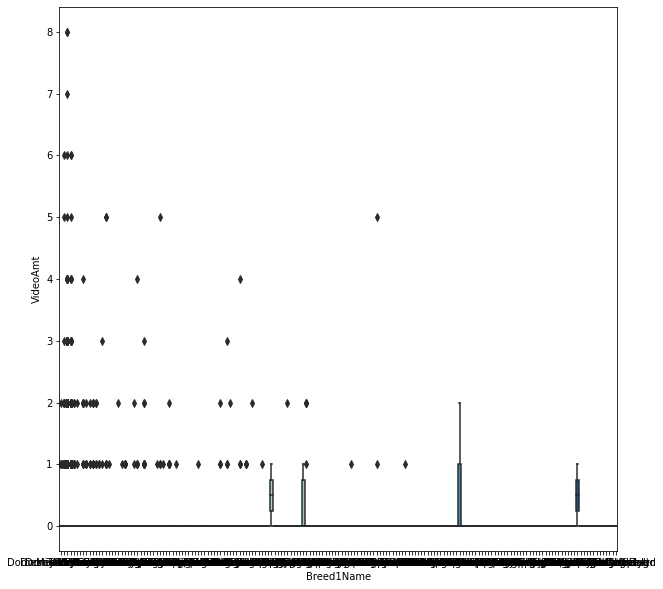

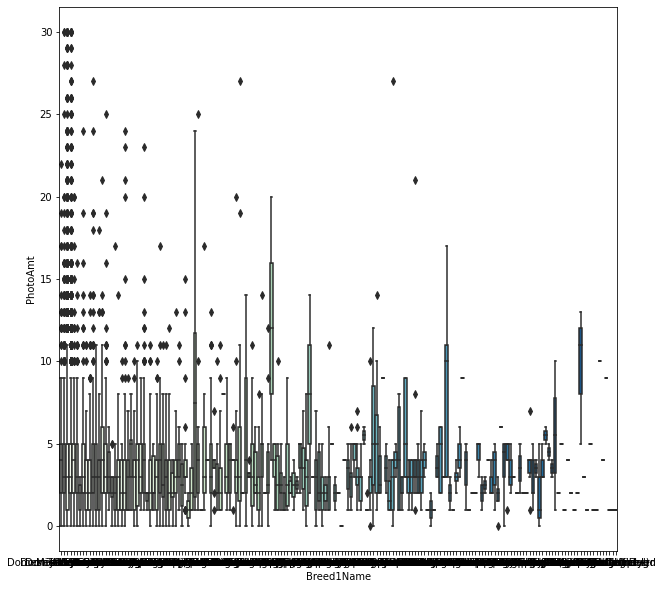

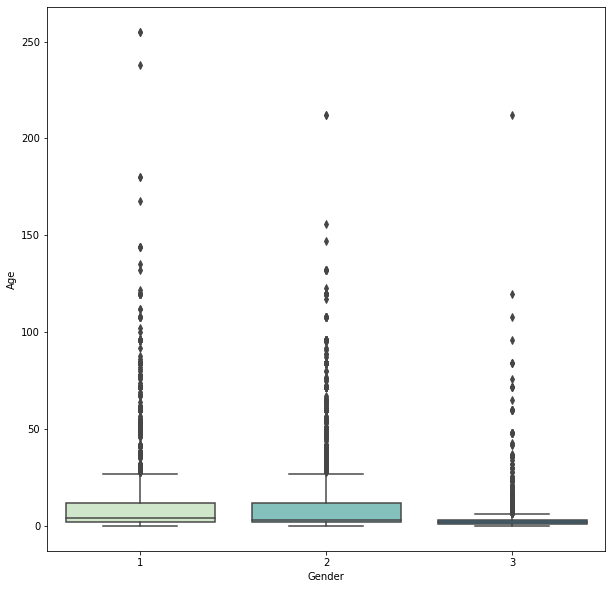

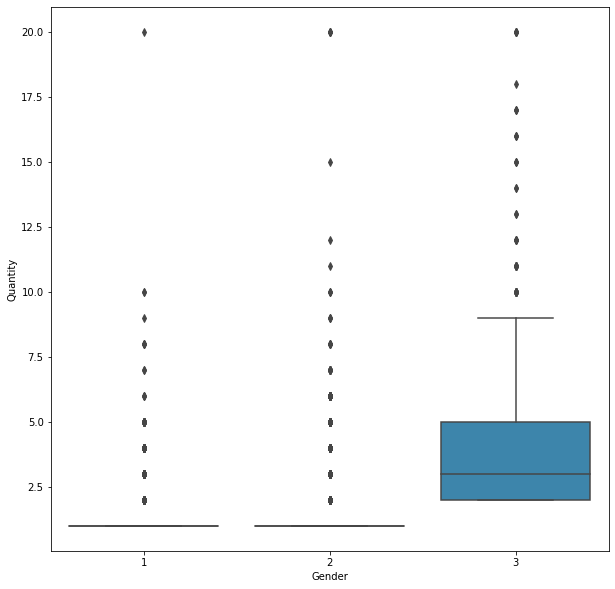

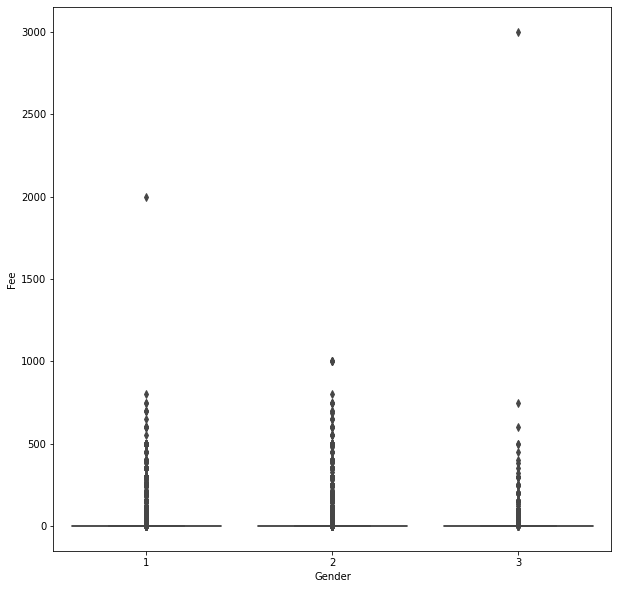

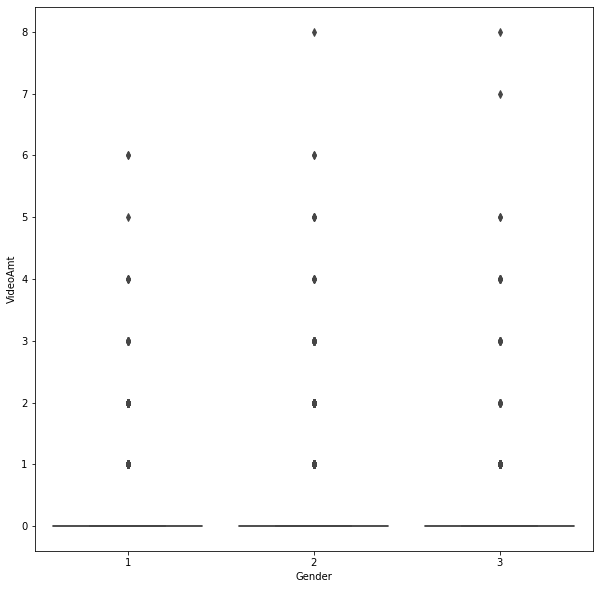

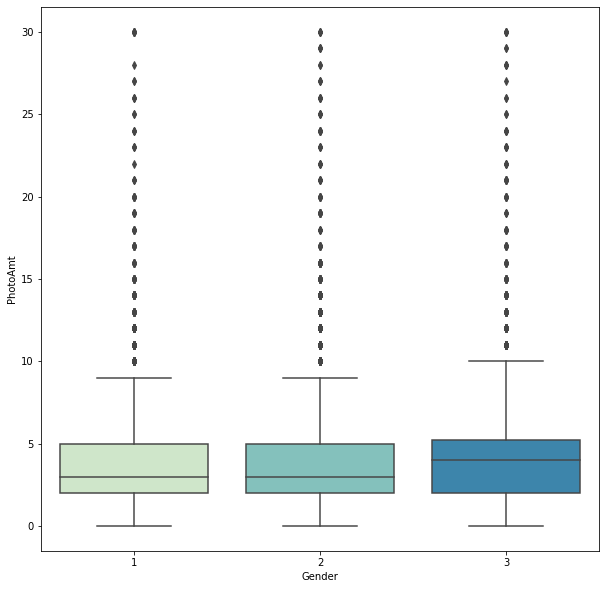

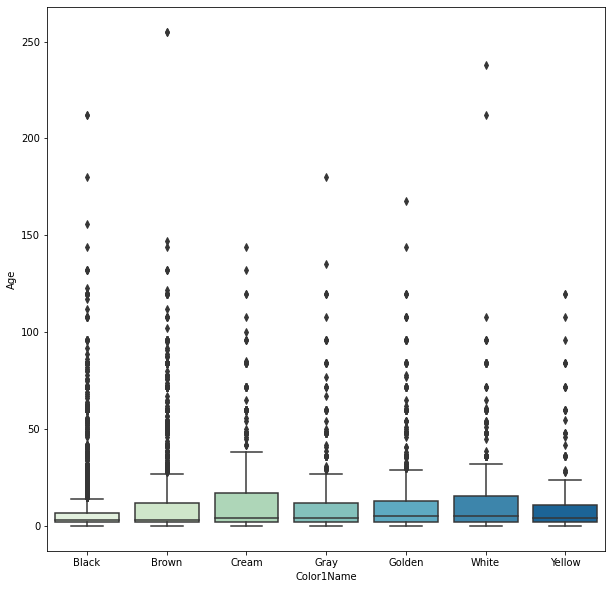

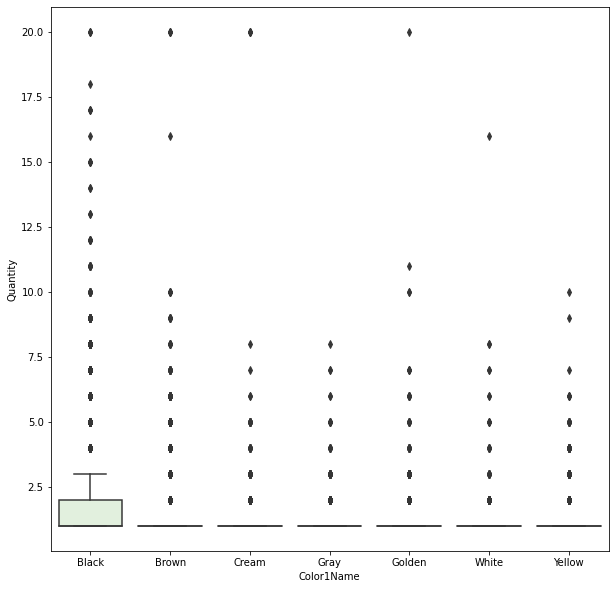

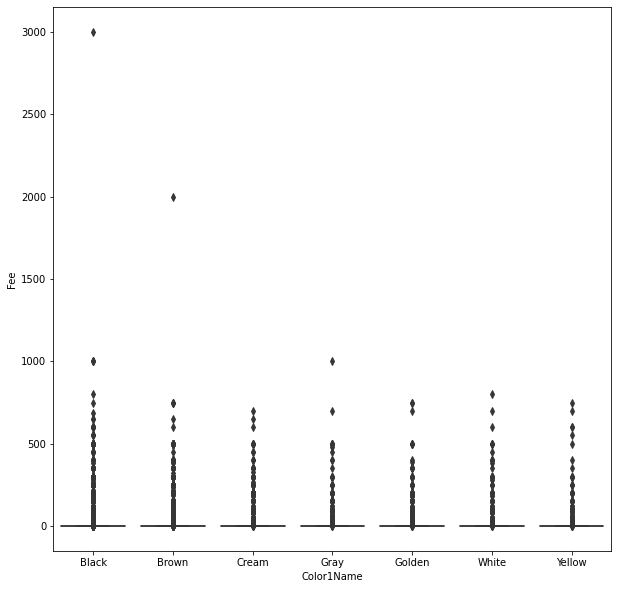

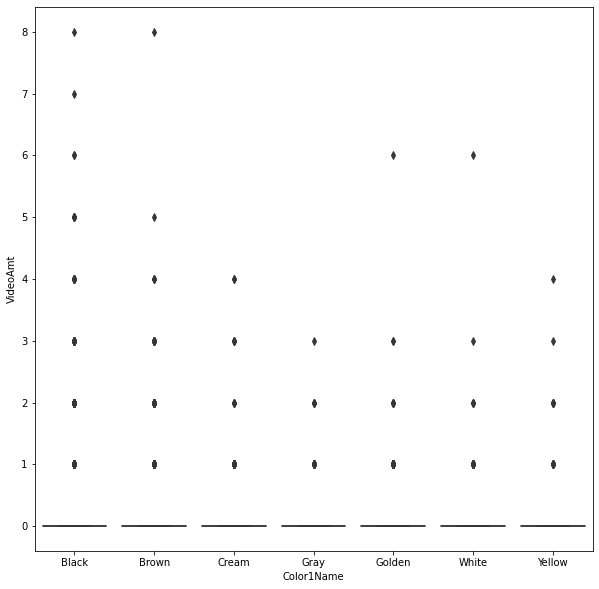

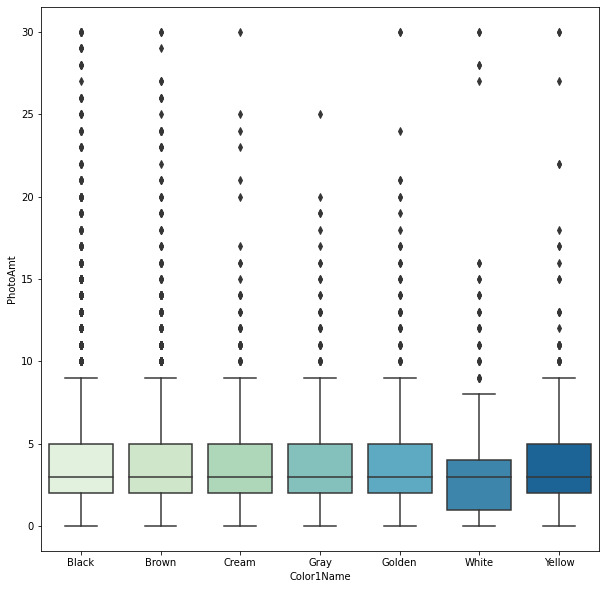

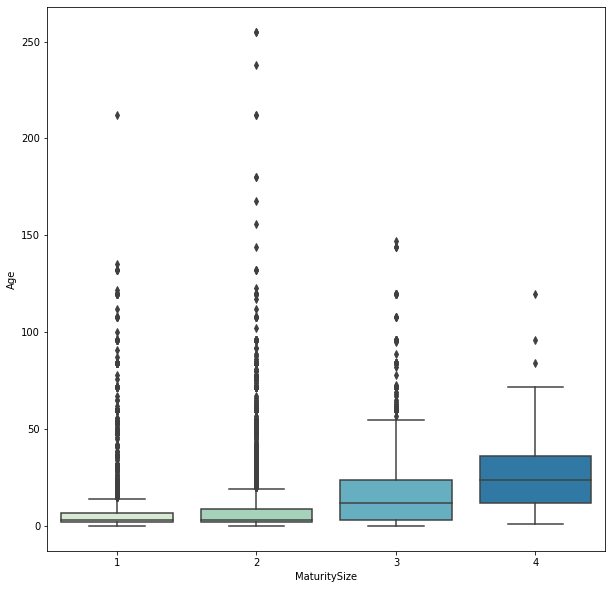

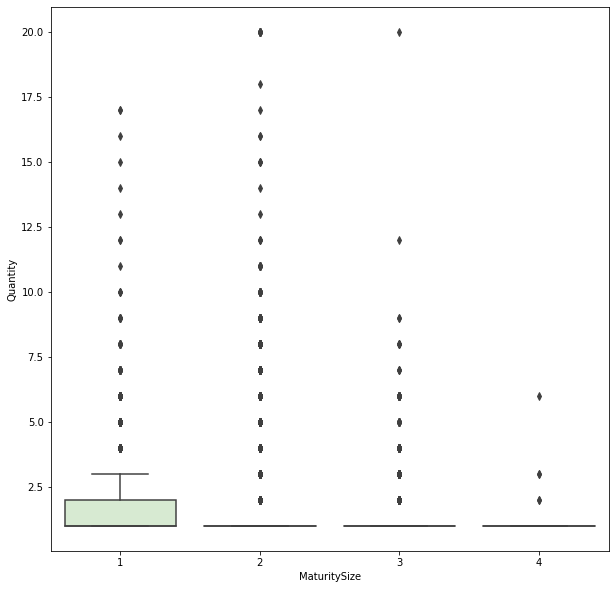

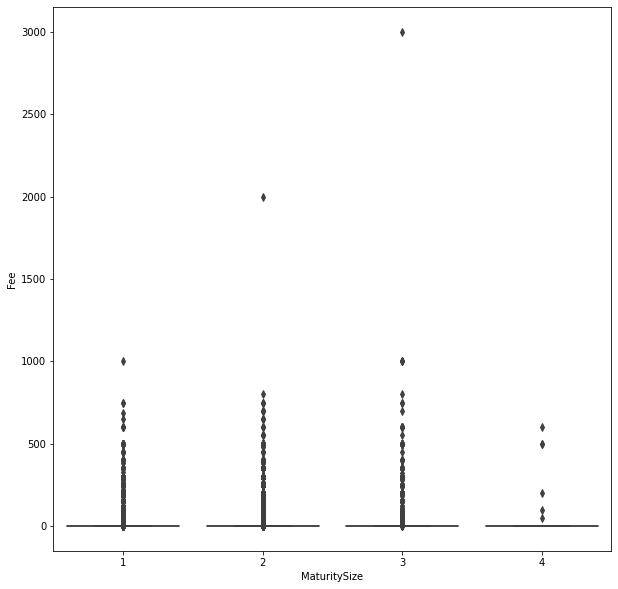

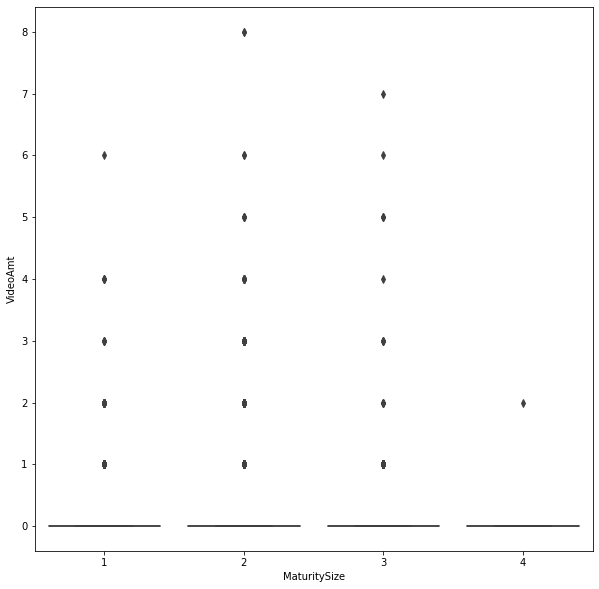

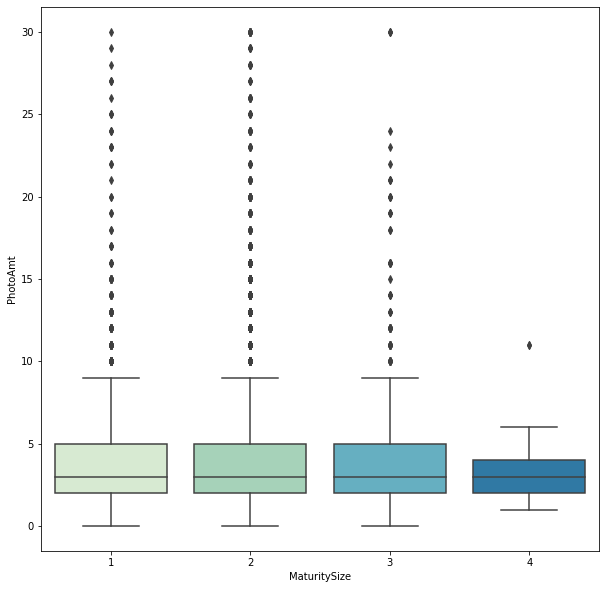

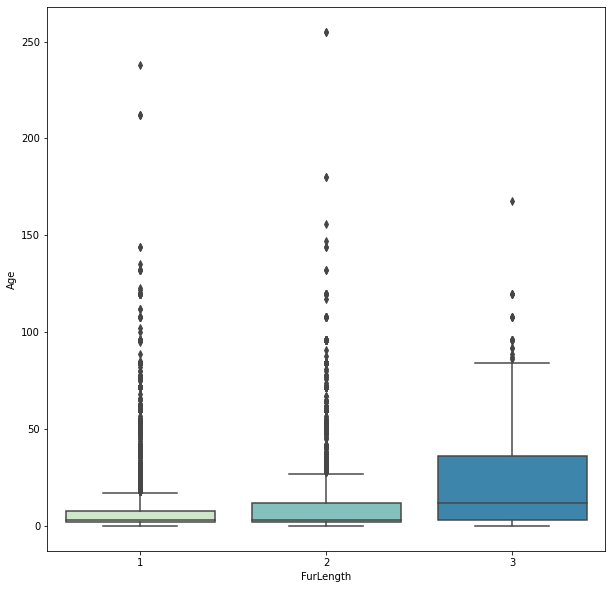

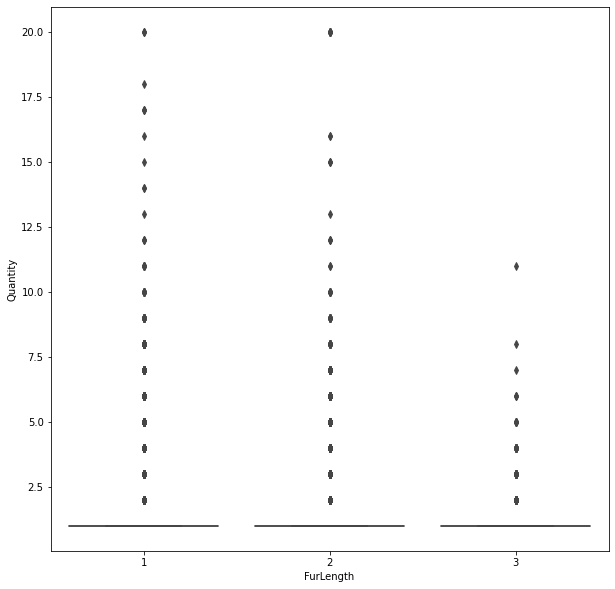

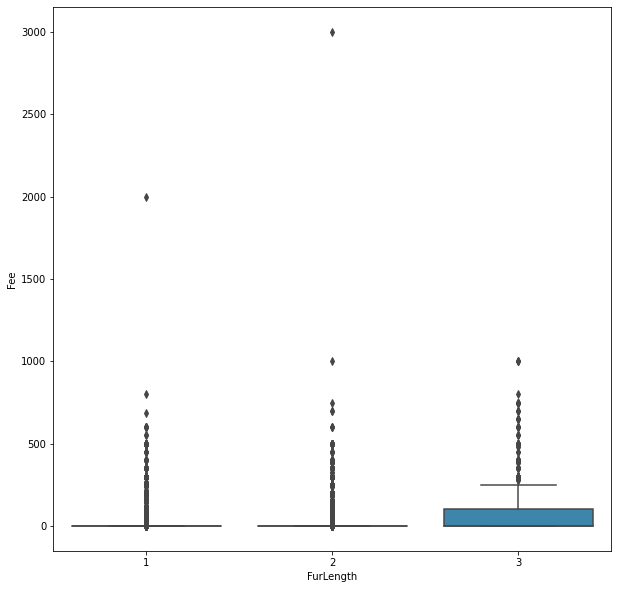

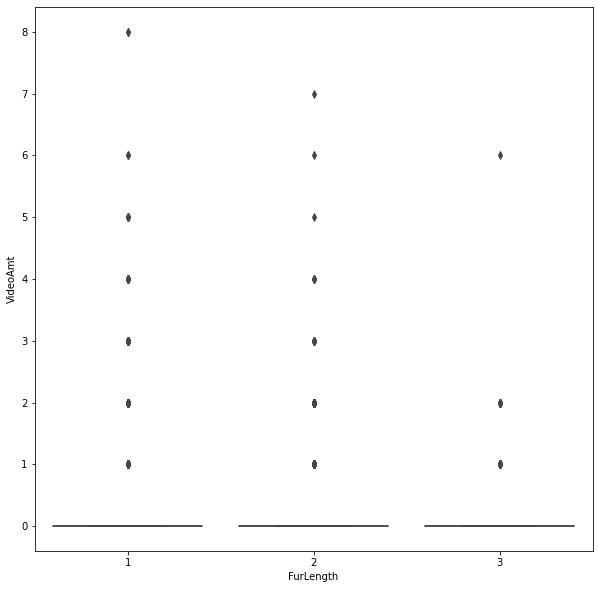

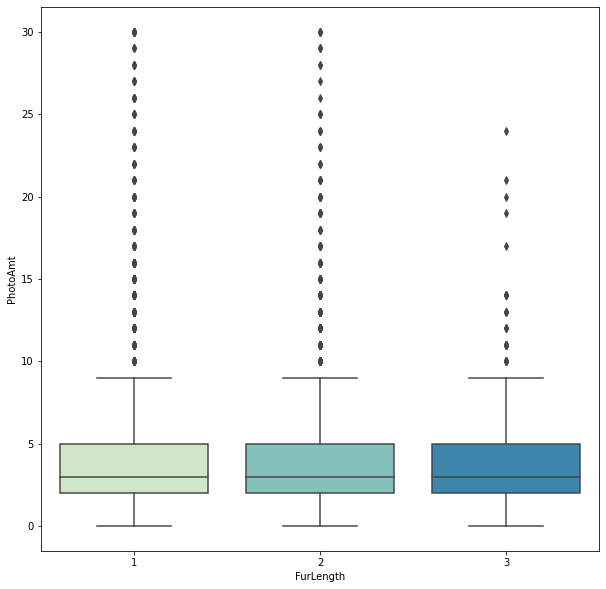

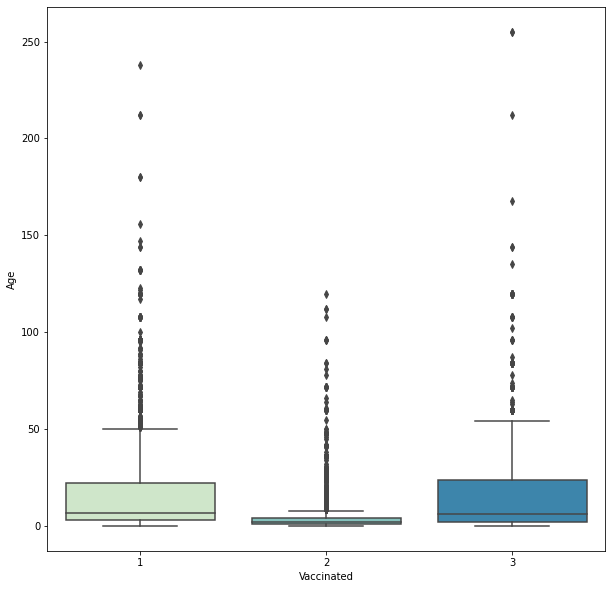

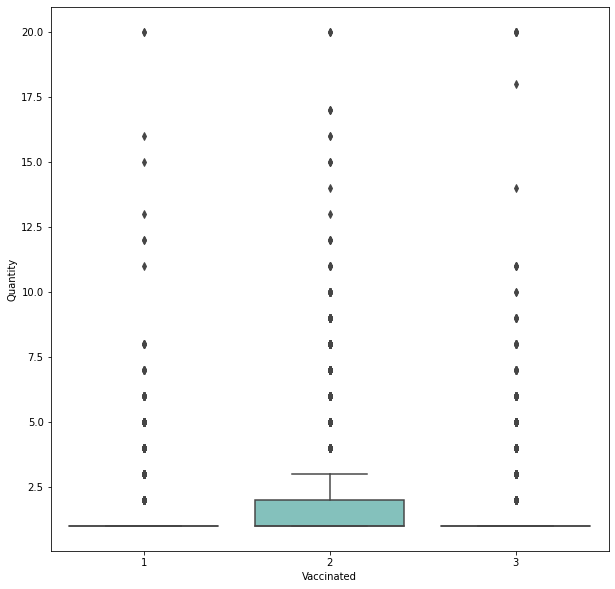

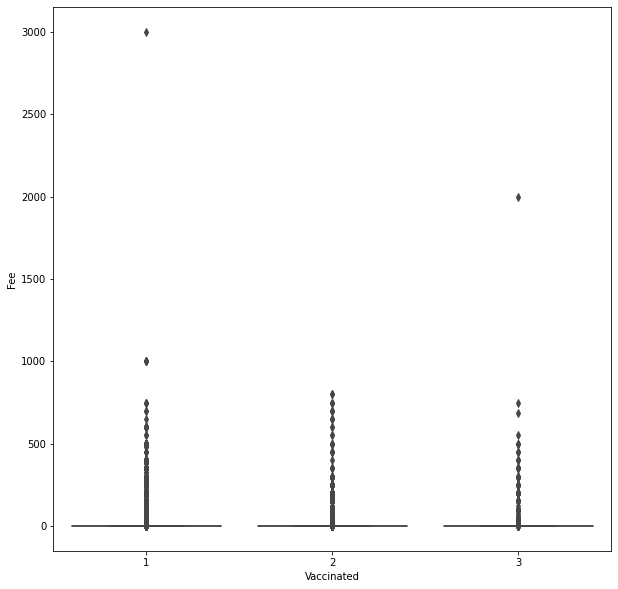

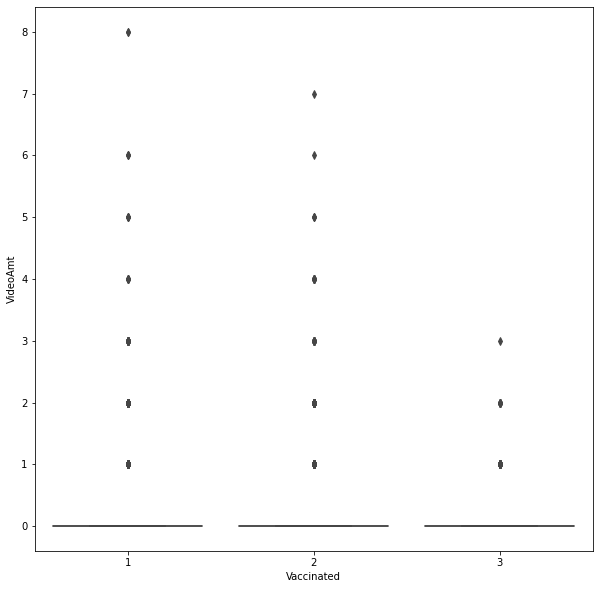

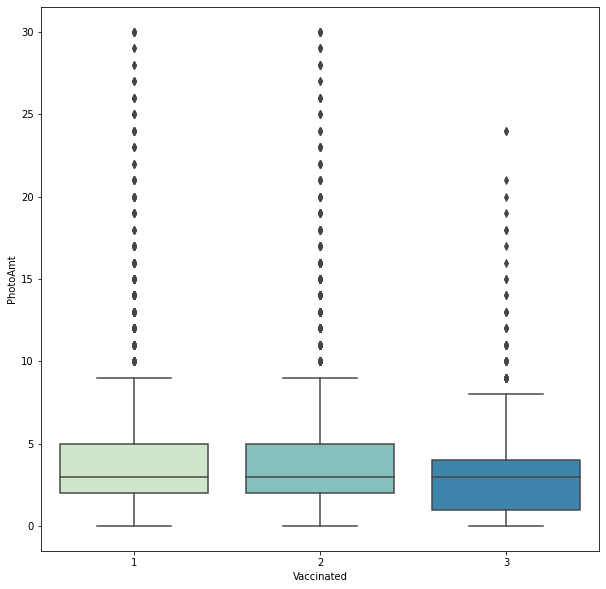

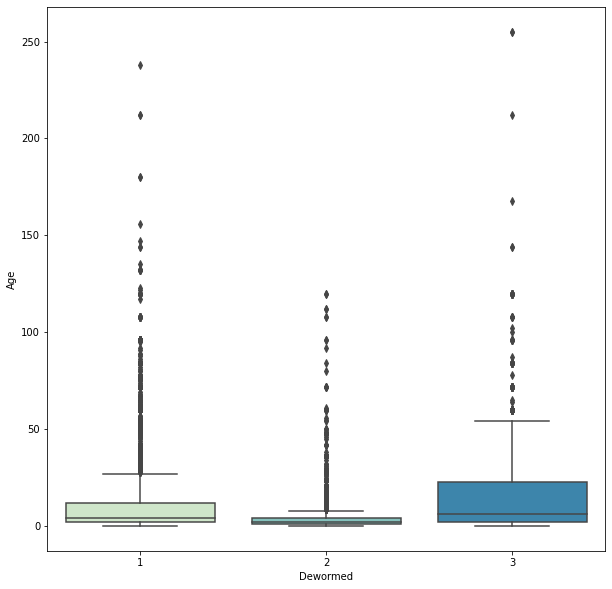

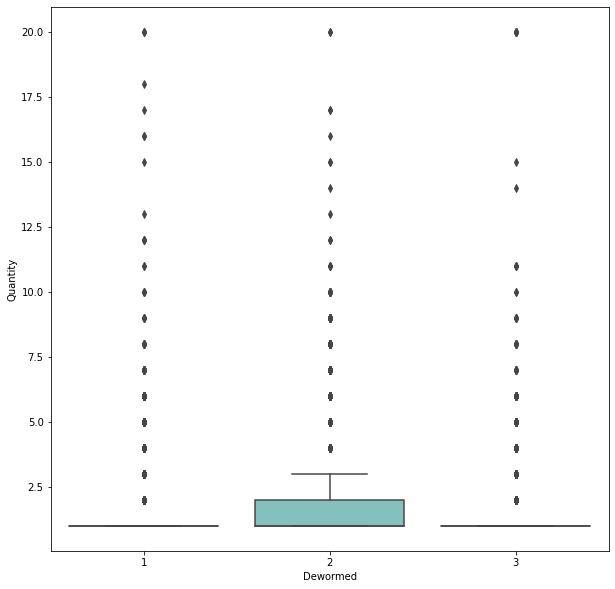

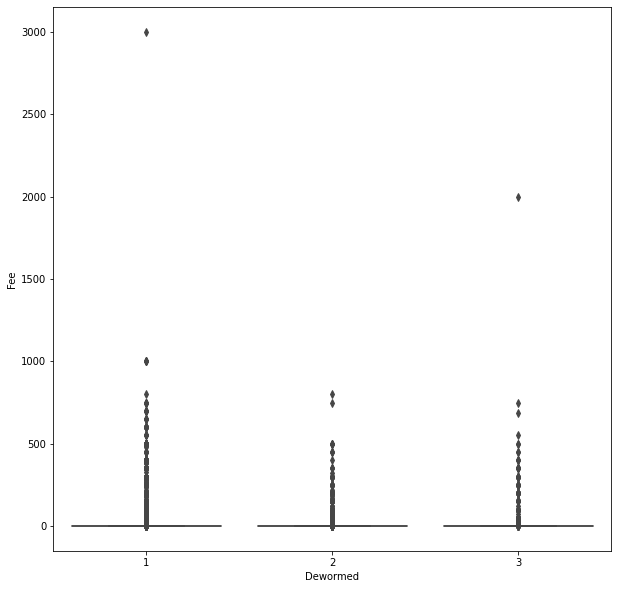

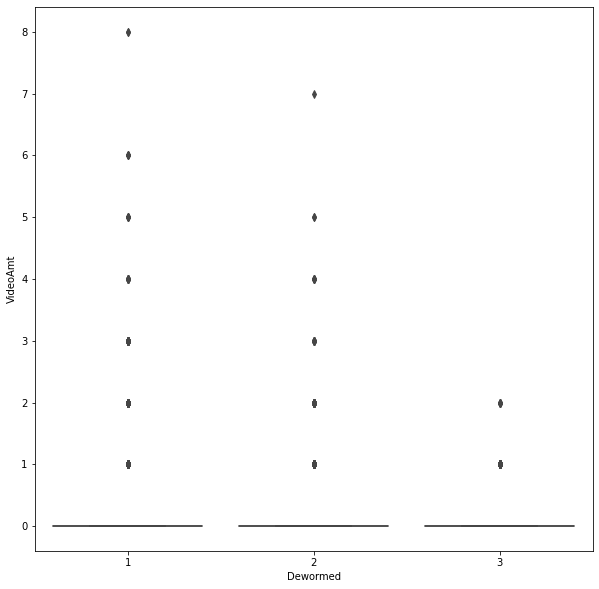

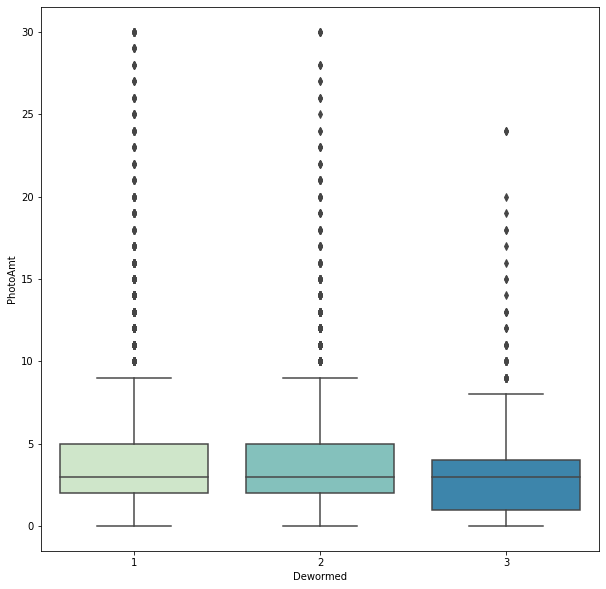

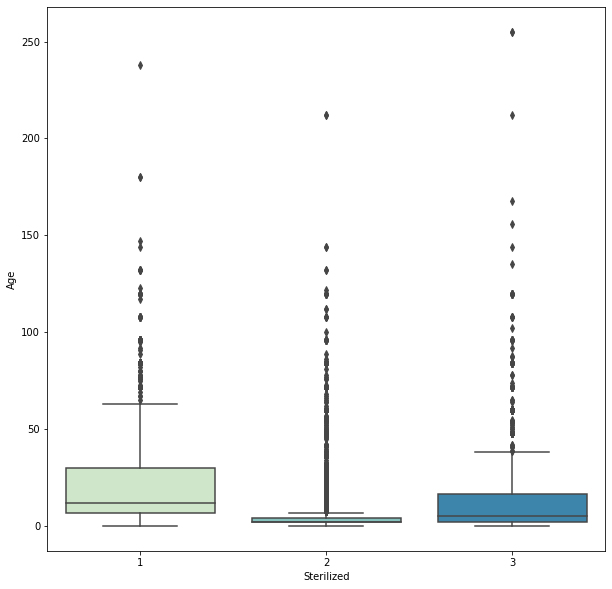

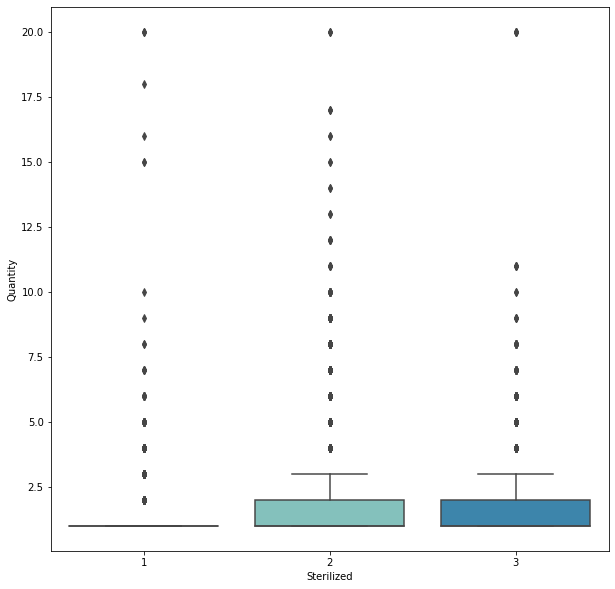

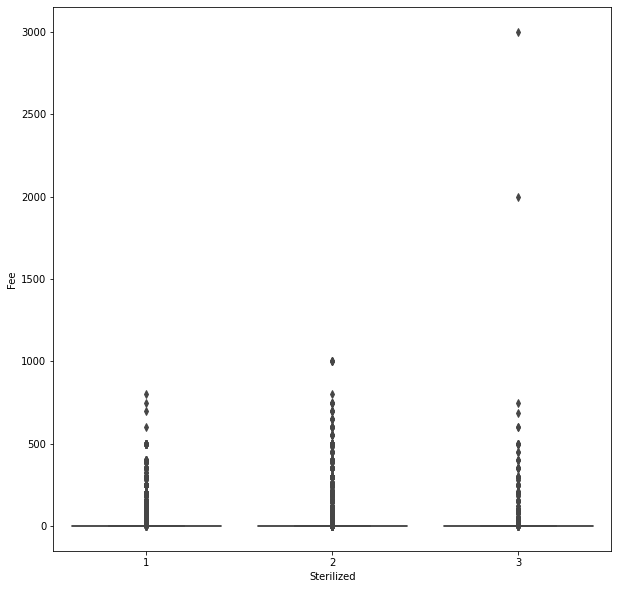

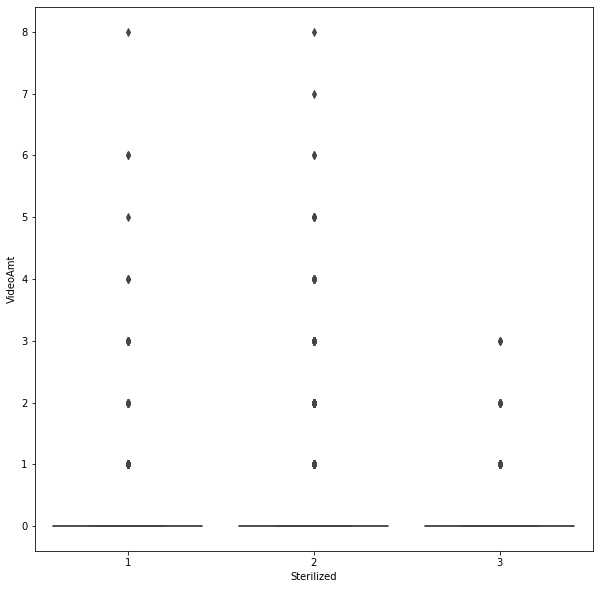

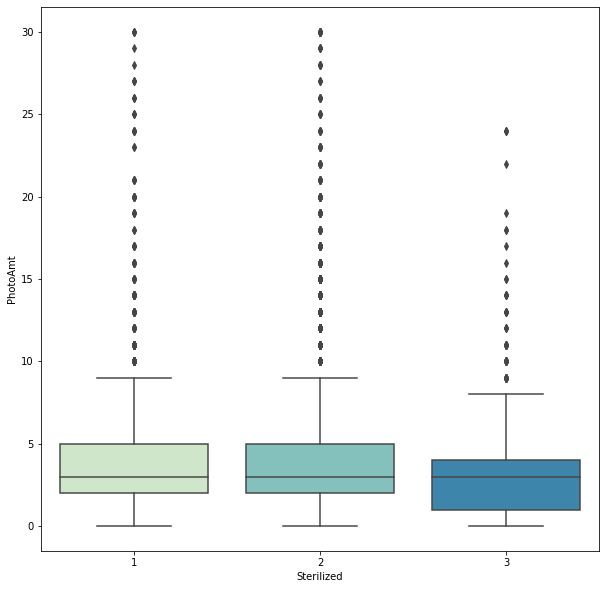

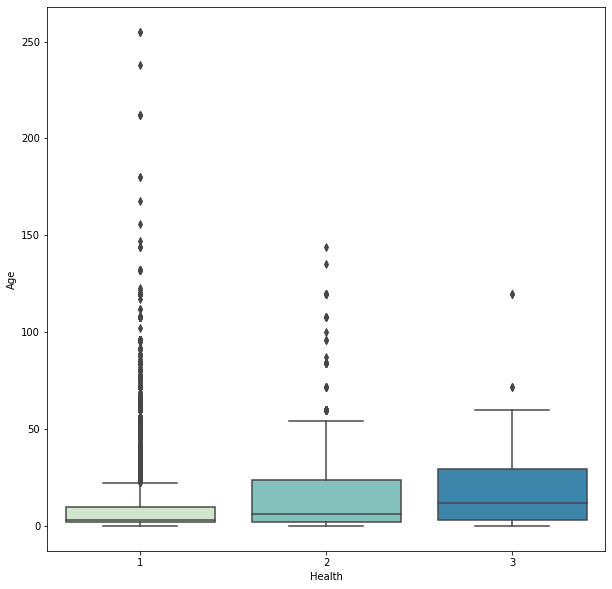

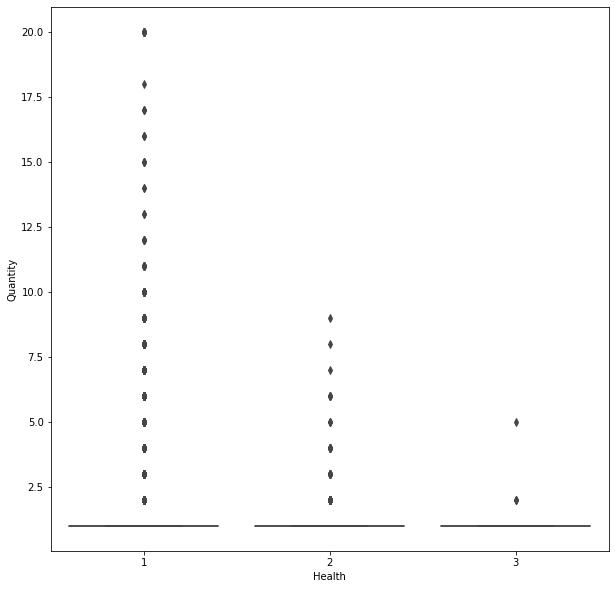

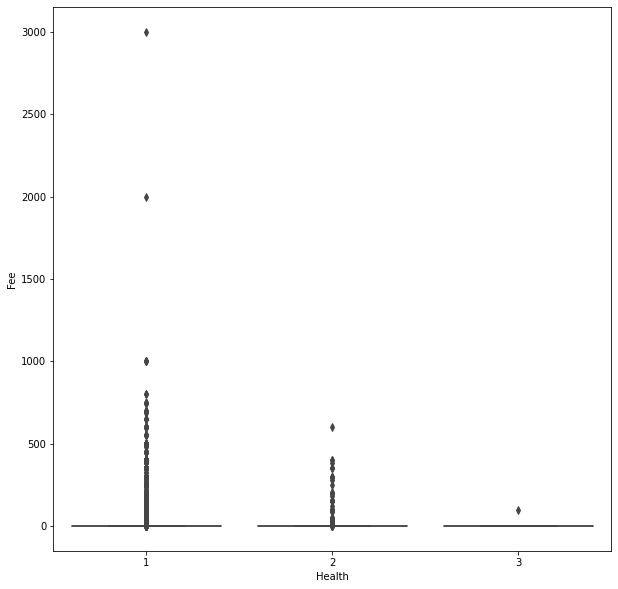

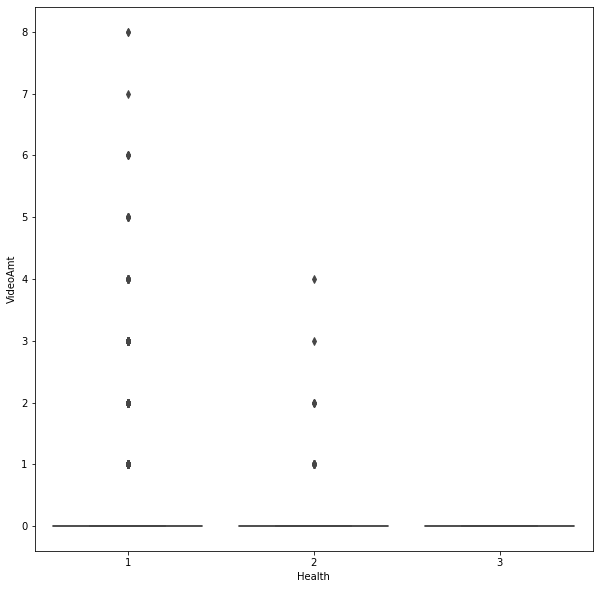

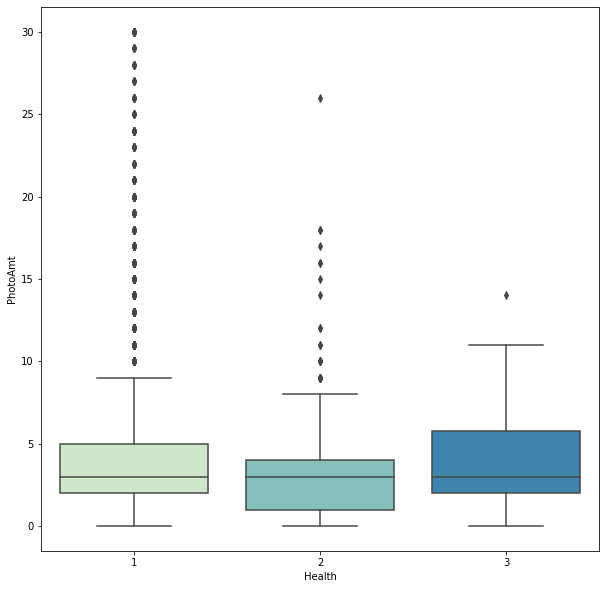

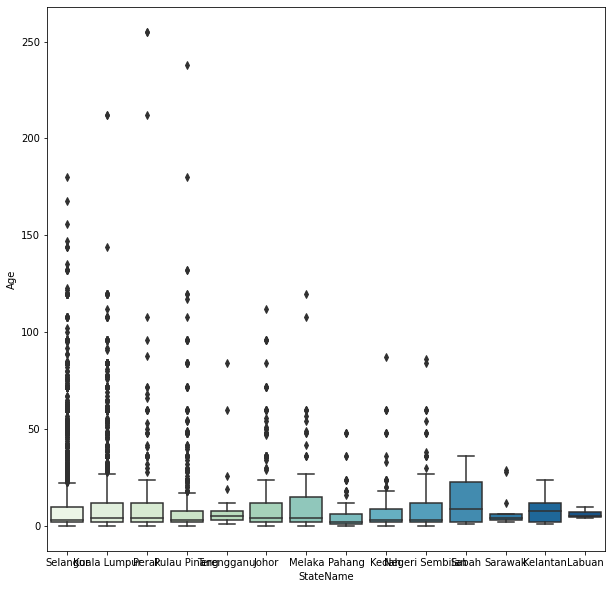

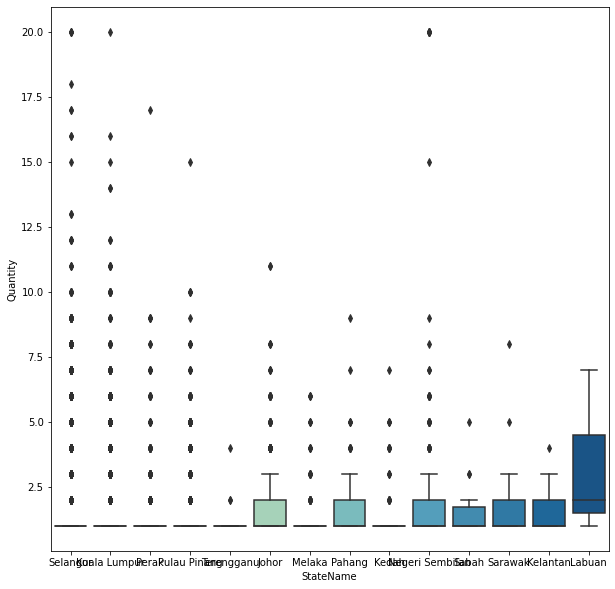

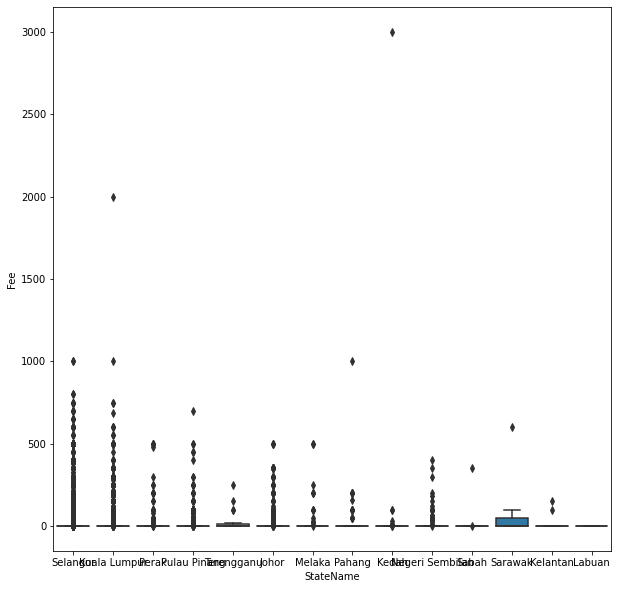

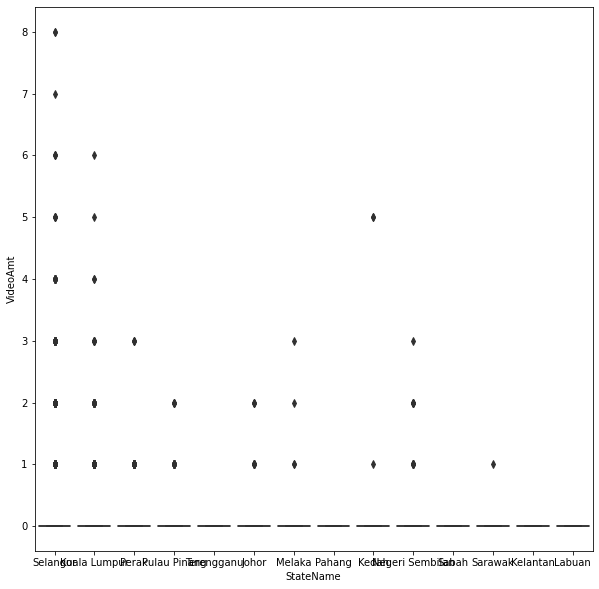

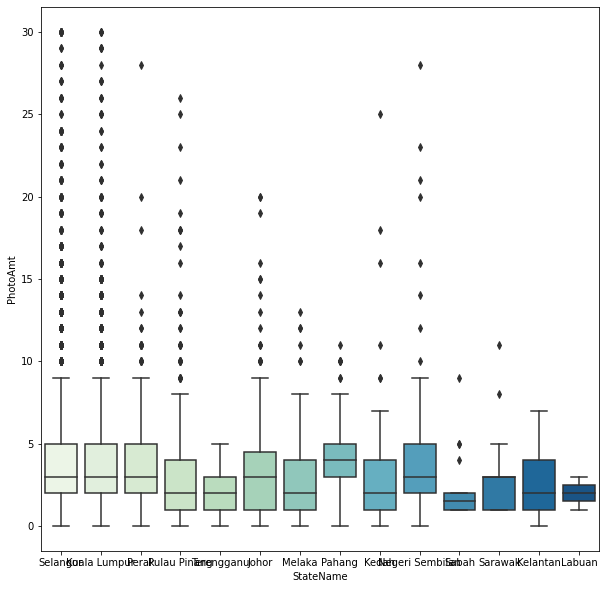

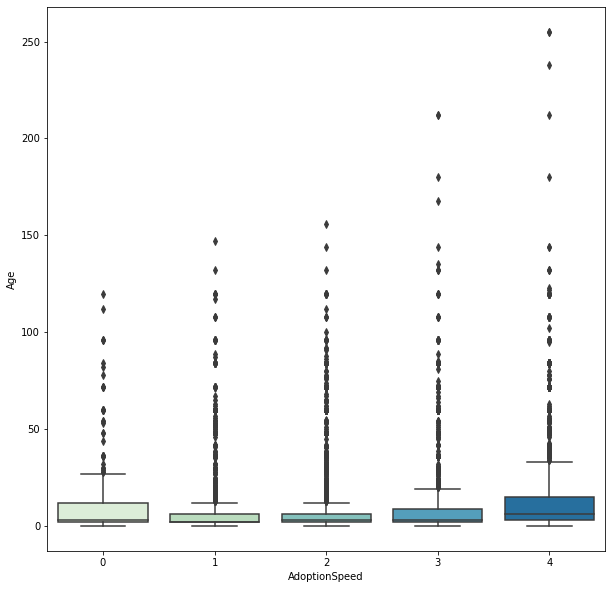

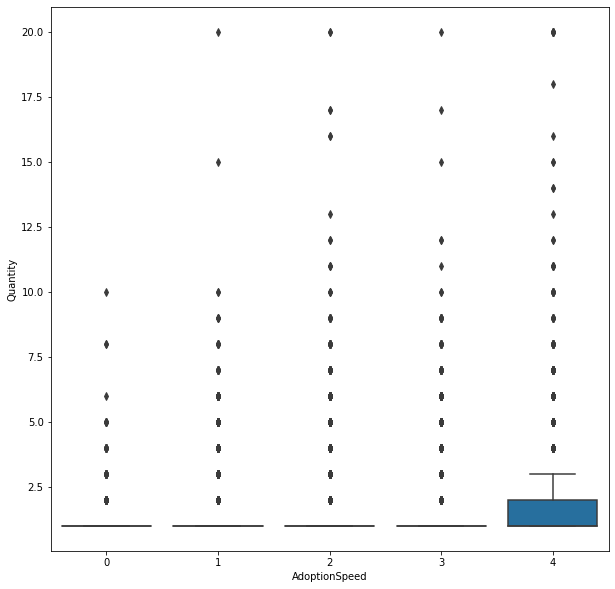

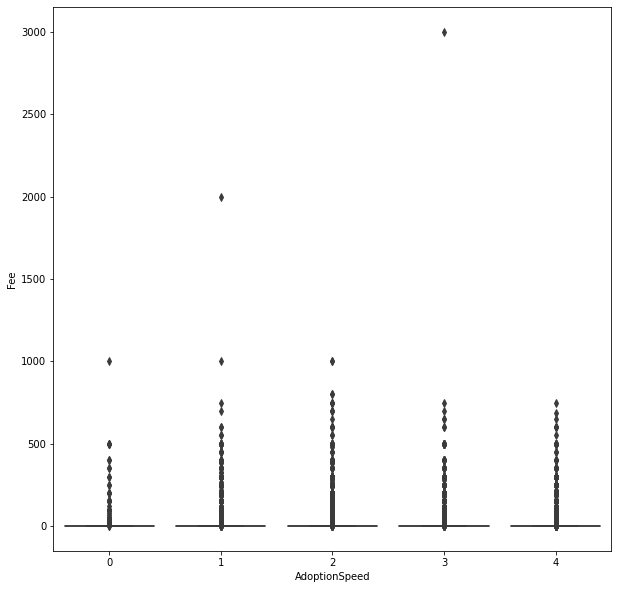

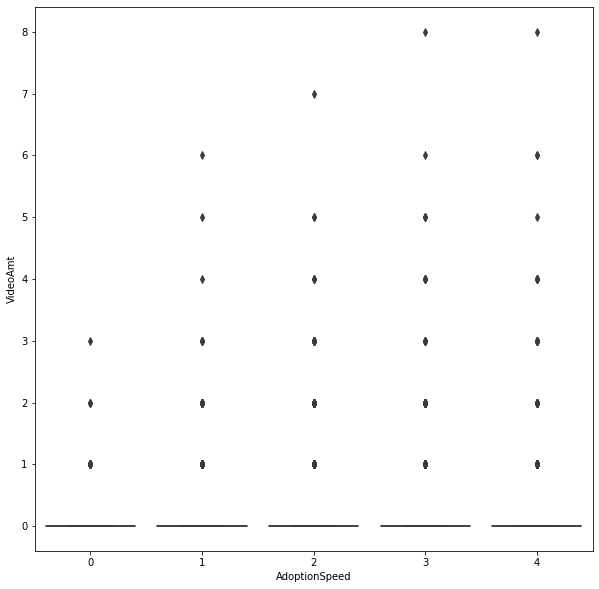

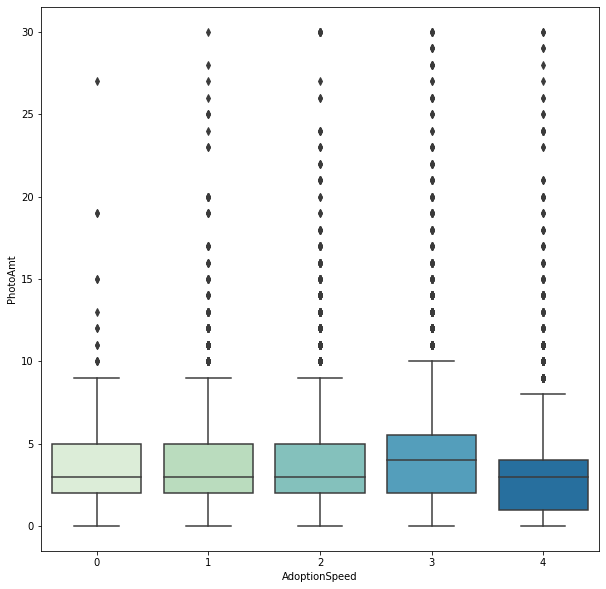

In [ ]:
for i in range(len(categorical_variables)):
  categorical_variable =  categorical_variables[i]
  for j in range(len(numerical_variables)):
    numerical_variable = numerical_variables[j]
    plt.figure(figsize = (10,10))
    sns.boxplot(x=categorical_variable, y=numerical_variable, data=pets_df, palette='GnBu')

### Conclusions and insights

Apparently, there's a dependency between the color=black and the "quantity", this suggests that when the profile represents more than 1 animal, usually people put the color as black. The same for maturitySize=1 and quantity.

The plots suggests a dependency between maturity size and age: the older the pet, the bigger their size. (This is obvious)

There's a slight suggestion that older animals are more likely to have longer fur.
 
When the fur of the animal is long,  it's more likely to have a fee charged for the adoption.

Animals that are not vaccinated are usually yonger than the ones vaccinated or "not sure". The same applies for "dewormed" and sterilized.

When the profile represents more than 1 animal, those pets are more likely not to be vaccinated/dewormed/sterilized.

Animals that are in good health conditions are more likely to be yonger than the ones with injuries.

## Outlier Analysis

From the previous analyses we decided to focus on data that present the following outlier behaviours:
- Profiles where the Breed Type is different from the pet type
- Profiles where the adoption fee is higher than 1000

Since the target variable is already categorized we can't evaluate outliers on Adoption Speed, because they are all combined in value 4.

### Breed Type

In [ ]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
pets_df[(pets_df['Breed1Type']!=pets_df['Type'])][['Breed1Type', 'Breed2Type', 'Type','Name','Gender','Quantity','Description','Breed1Name','Breed2Name']]

Breed1Type  Breed2Type  Type                               Name  \
22              1         NaN     2  Kenit, Kenot, Techit, Keyad, Owen   
1603            1         NaN     2                              Shuka   
1638            1         1.0     2                           Mi Cai 2   
3783            1         NaN     2                                NaN   
4233            1         1.0     2                             Mo-Joe   
6650            1         NaN     2                             Munchi   
7300            1         1.0     2                            Mao Mao   
8852            1         NaN     2         Bobby The Smiling Shih Tzu   
10911           1         NaN     2               Kittens Encik Faisal   
13686           1         NaN     2                              Tabby   
14058           1         NaN     2                             Mizamo   
14470           1         NaN     2                          Mr.Mishoo   

       Gender  Quantity                                        Description  \
22          3        10  My cats name is Kenit, Kenot,Owen, Keyad, Manj...   
1603        2         1                                   so cute and kind   
1638        1         5  New born baby cats 2 weeks time..at my house a...   
3783        3         2  THERE ARE FOUR KITTENS GINGER, BLACKIE, SILVER...   
4233        1         1  Mo-joe is adopted and is in good hand with sof...   
6650        1         1                      He's very naughty and cute ..   
7300        2         1  i rescued mao mao last two weeks or 3 weeks ag...   
8852        1         1  How he was found: Bobby was abandoned and was ...   
10911       3         3  Ada 3 ekor kitten d kedai nasi ayam faisal di ...   
13686       2         1  I just rescue this kitty at pm near my apartme...   
14058       2         1          very cut very lovely very nice for people   
14470       1         1  Hello ,My name is Mishoo, I 'm a one month bla...   

                       Breed1Name      Breed2Name  
22                      Greyhound             NaN  
1603   Belgian Shepherd Laekenois             NaN  
1638               Bearded Collie  Bearded Collie  
3783   Belgian Shepherd Laekenois             NaN  
4233                      Terrier         Terrier  
6650            Australian Kelpie             NaN  
7300                       Collie           Akita  
8852                     Shih Tzu             NaN  
10911                 Mixed Breed             NaN  
13686                 Mixed Breed             NaN  
14058                 Mixed Breed             NaN  
14470                 Mixed Breed             NaN

In [ ]:
pets_df[(pets_df['Breed1Type']!=pets_df['Type'])].shape

(12, 32)

Rows 22, 1638, 3783, 4233, 10911, 13686, 14470 correspond to cats, so the Breed Type sould be 2. The Breed Names correspond to dog breeds as well, so the breed names are also wrong.

Regarding rows 1603, 6650, 7300, 14058 the breed type and name correspond to a dog breed, but we cannot be certain if the profile is of a dog or cat. We could check for the pet photos if we want to be certain.

Row 8852 corresponds to a dog, so the Type column is wrong.

Since there are only 12 cases, we will opt for dropping such rows.



In [ ]:
pets_df = pets_df[(pets_df['Breed1Type']==pets_df['Type'])]

In [ ]:
pets_df.shape

(14981, 32)

### Adoption Fee

In [ ]:
pd.set_option('max_colwidth', -1)
pets_df.sort_values(by='Fee', ascending=False)[:10][['Type','Age','Breed1Name','Breed2Name','FurLength','Quantity','Fee','Description','Vaccinated', 'Dewormed', 'Sterilized', 'Health']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Type  Age           Breed1Name          Breed2Name  FurLength  \
8722   1     4    German Shepherd Dog  NaN                 2           
10477  1     24   English Bulldog      NaN                 1           
8834   1     24   Shih Tzu             NaN                 3           
2078   1     8    Rottweiler           NaN                 3           
8879   1     8    Rottweiler           NaN                 3           
4844   1     7    Siberian Husky       NaN                 2           
9782   2     1    Persian              NaN                 3           
9745   1     24   Rottweiler           NaN                 1           
1459   2     2    Persian              Domestic Long Hair  3           
5289   1     36   Siberian Husky       NaN                 2           

       Quantity   Fee  \
8722   2         3000   
10477  1         2000   
8834   1         1000   
2078   1         1000   
8879   1         1000   
4844   1         1000   
9782   1         800    
9745   1         800    
1459   1         750    
5289   1         750    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
8722   Both pups are family home trained. They love their walks on lead and off lead. Both male and female are from different lineage and both have MKA Reg Certs. They are 4mths and at perfect age for training. The 2pups know some commands like "sit" "outside" "leave" "crate" and more. They are family friendly and can stay/sleep indoors and out. They've just learnt to swim and belly rubs. Great dogs for families that wants a pet and a watchdog too. All vaccines complete, dewormed, microchipped and spayed.                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
pd.set_option('max_colwidth', -1)
pets_df[pets_df['Quantity']==1].sort_values(by='Fee', ascending=False)[:10][['Type','Age','Breed1Name','Breed2Name','FurLength','Quantity','Fee','Description','Vaccinated', 'Dewormed', 'Sterilized', 'Health']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Type  Age       Breed1Name          Breed2Name  FurLength  Quantity  \
10477  1     24   English Bulldog  NaN                 1          1          
4844   1     7    Siberian Husky   NaN                 2          1          
8879   1     8    Rottweiler       NaN                 3          1          
2078   1     8    Rottweiler       NaN                 3          1          
8834   1     24   Shih Tzu         NaN                 3          1          
9782   2     1    Persian          NaN                 3          1          
9745   1     24   Rottweiler       NaN                 1          1          
81     1     3    Silky Terrier    NaN                 3          1          
1459   2     2    Persian          Domestic Long Hair  3          1          
5289   1     36   Siberian Husky   NaN                 2          1          

        Fee  \
10477  2000   
4844   1000   
8879   1000   
2078   1000   
8834   1000   
9782   800    
9745   800    
81     750    
1459   750    
5289   750    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Description  \
10477  Found this bull dog near my neighbourhood for a month now. I have 3 dogs myself at home. Cannot take care of it. Hopefully if there is someone who is loving who can take care of it. It is very cute and friendly but the saliva keep on drooling. overall there is nothing. forgot to mention, please keep him indoor. He likes to sleep on mattress or sofa, if can please prepare a mattress for him. PLEASE SMS , DONT CALL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

When analysing the most expensive fees, they either correspond to pure breds or to more than one pet, so the values seem reasonable and not mistakes.

## Writing results to a CSV file

In [ ]:
pets_df.to_csv(path_to_dir + 'pets_outliers_removed.csv', index=False)